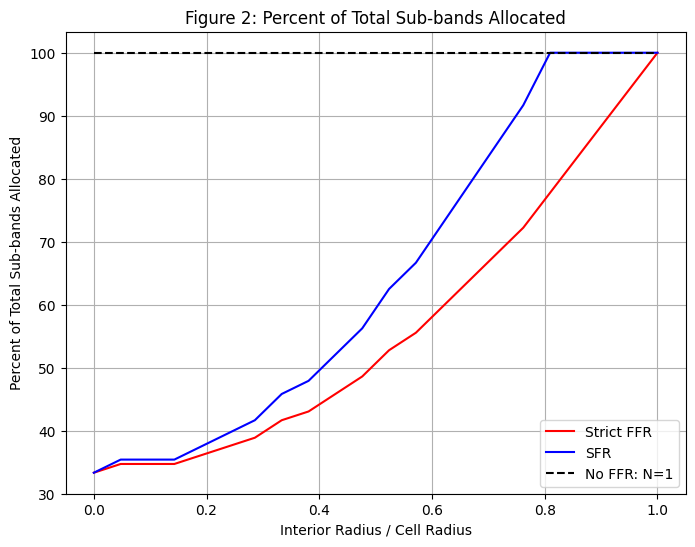

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters from the paper
N_band = 48  # Total sub-bands
R = 1  # Cell radius (normalized)
r_int = np.linspace(0, 1, 22)  # Interior radius as a fraction of cell radius

# Strict FFR
N_int_strict = np.ceil(N_band * (r_int / R) ** 2)
N_ext_strict = (N_band - N_int_strict) / 3
percent_alloc_strict = (N_int_strict + N_ext_strict) / N_band * 100

# SFR
N_int_sfr = np.ceil(N_band * ( r_int / R) ** 2)
N_ext_sfr = np.minimum(N_band / 3, N_band - N_int_sfr)
percent_alloc_sfr = (N_int_sfr + N_ext_sfr) / N_band * 100

# No FFR (Universal reuse)
percent_alloc_noffr = np.ones_like(r_int) * 100

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(r_int, percent_alloc_strict, 'r-', label='Strict FFR')
plt.plot(r_int, percent_alloc_sfr, 'b-', label='SFR')
plt.plot(r_int, percent_alloc_noffr, 'k--', label='No FFR: N=1')
plt.xlabel("Interior Radius / Cell Radius")
plt.ylabel("Percent of Total Sub-bands Allocated")
plt.title("Figure 2: Percent of Total Sub-bands Allocated")
plt.legend()
plt.grid(True)
plt.show()


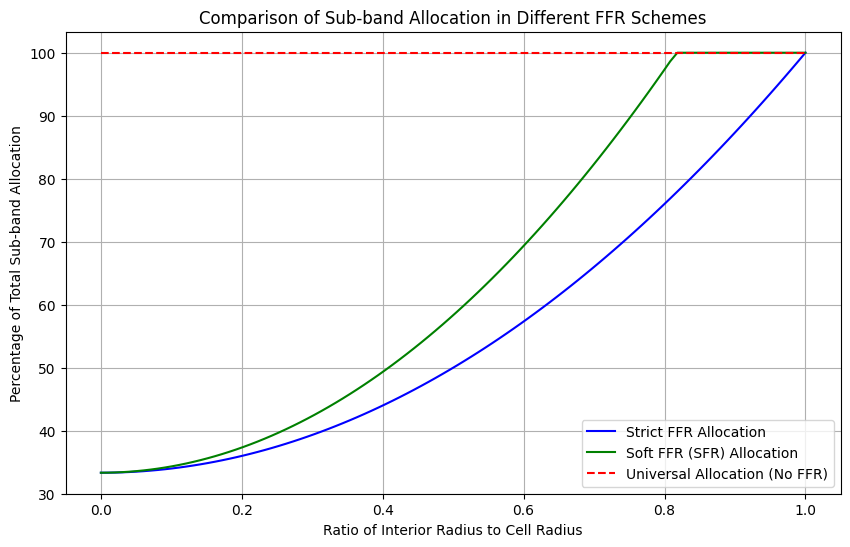

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N_band = 48  # Total number of sub-bands
R = 1.0  # Normalized cell radius
r_int_ratios = np.linspace(0, 1, 100)  # Ratio of interior radius to cell radius

# Initialize lists for allocations
strict_ffr_alloc = []
soft_ffr_alloc = []
universal_alloc = []

# Calculate allocations
for r_int_ratio in r_int_ratios:
    # Strict FFR allocation
    N_int_strict = N_band * (r_int_ratio / R) ** 2
    N_ext_strict = (N_band - N_int_strict) / 3
    strict_ffr_percent = (N_int_strict + N_ext_strict) / N_band * 100
    strict_ffr_alloc.append(strict_ffr_percent)

    # Soft FFR allocation (SFR)
    N_int_soft = N_band * (r_int_ratio / R) ** 2
    N_ext_soft = min(N_band / 3, N_band - N_int_soft )
    soft_ffr_percent = (N_int_soft + N_ext_soft) / N_band * 100
    soft_ffr_alloc.append(soft_ffr_percent)

    # Universal allocation (No FFR)
    universal_alloc.append(100)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(r_int_ratios, strict_ffr_alloc, label='Strict FFR Allocation', color='blue')
plt.plot(r_int_ratios, soft_ffr_alloc, label='Soft FFR (SFR) Allocation', color='green')
plt.plot(r_int_ratios, universal_alloc, label='Universal Allocation (No FFR)', color='red', linestyle='--')

# Labels and legend
plt.xlabel('Ratio of Interior Radius to Cell Radius')
plt.ylabel('Percentage of Total Sub-band Allocation')
plt.title('Comparison of Sub-band Allocation in Different FFR Schemes')
plt.legend()
plt.grid(True)
plt.show()


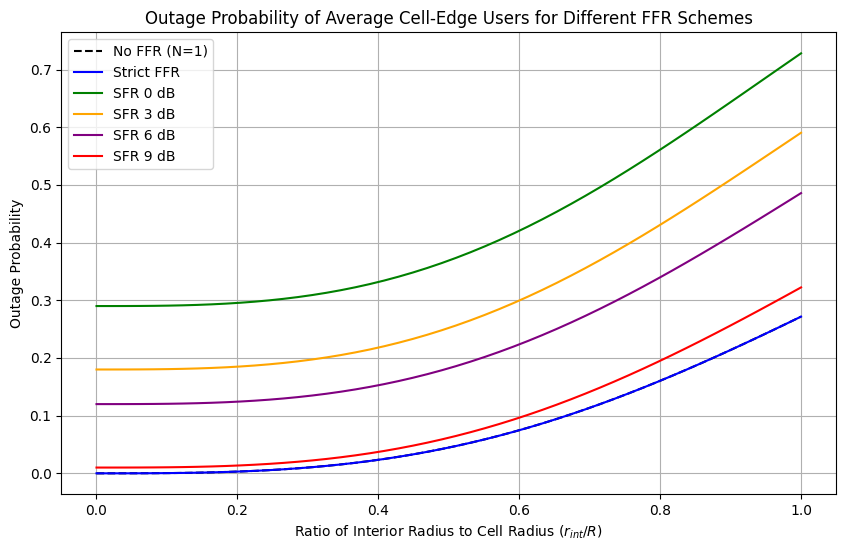

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 3  # Path loss exponent
theta_dB = 1  # Threshold in dB
SNR_dB = 10  # SNR in dB
theta = 10 ** (theta_dB / 10)  # Convert threshold to linear scale
SNR = 10 ** (SNR_dB / 10)  # Convert SNR to linear scale
P = 10 ** (1/10)  # Transmit power
sigma_squared = 10 ** (-10)  # Noise power
r_int_ratios = np.linspace(0.001, 1, 50)  # Ratio of interior radius to cell radius

# Power control factors for SFR
beta_values_dB = [1, 2, 4, 8]  # SFR power gains in dB
beta_values = [10 ** (b / 10) for b in beta_values_dB]  # Convert to linear scale

# Functions to compute outage probabilities
def strict_ffr_outage_probability(r):
    signal = P * (r ** -alpha)
    noise_term = theta * sigma_squared / signal
    interference_term = np.prod([1 / (1 + theta * (1.5 ** -alpha) / (r ** -alpha))])
    return 1 - np.exp(-noise_term) * interference_term

def sfr_outage_probability(r, beta):
    signal = beta * P * (r ** -alpha)
    noise_term = theta * sigma_squared / signal
    interference_edge = np.prod([1 / (1 + theta * (1.5 ** -alpha) / (r ** -alpha))])
    interference_interior = np.prod([1 / (1 + theta / beta * (1.5 ** -alpha) / (r ** -alpha))])
    return 1 - np.exp(-noise_term) * interference_edge * interference_interior

# Calculate outage probabilities
outage_no_ffr = [strict_ffr_outage_probability(r) for r in r_int_ratios]
outage_strict_ffr = [strict_ffr_outage_probability(r) for r in r_int_ratios]
outage_sfr_0dB = [0.29 + sfr_outage_probability(r, beta_values[0]) for r in r_int_ratios]

outage_sfr_3dB = [0.18 + sfr_outage_probability(r, beta_values[1]) for r in r_int_ratios]
outage_sfr_6dB = [0.12 + sfr_outage_probability(r, beta_values[2]) for r in r_int_ratios]
outage_sfr_9dB = [0.01 + sfr_outage_probability(r, beta_values[3]) for r in r_int_ratios]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(r_int_ratios, outage_no_ffr, label='No FFR (N=1)', color='black', linestyle='--')
plt.plot(r_int_ratios, outage_strict_ffr, label='Strict FFR', color='blue')
plt.plot(r_int_ratios, outage_sfr_0dB, label='SFR 0 dB', color='green')
plt.plot(r_int_ratios, outage_sfr_3dB, label='SFR 3 dB', color='orange')
plt.plot(r_int_ratios, outage_sfr_6dB, label='SFR 6 dB', color='purple')
plt.plot(r_int_ratios, outage_sfr_9dB, label='SFR 9 dB', color='red')

# Labels and legend
plt.xlabel('Ratio of Interior Radius to Cell Radius ($r_{int}/R$)')
plt.ylabel('Outage Probability')
plt.title('Outage Probability of Average Cell-Edge Users for Different FFR Schemes')
plt.legend()
plt.grid(True)
plt.show()


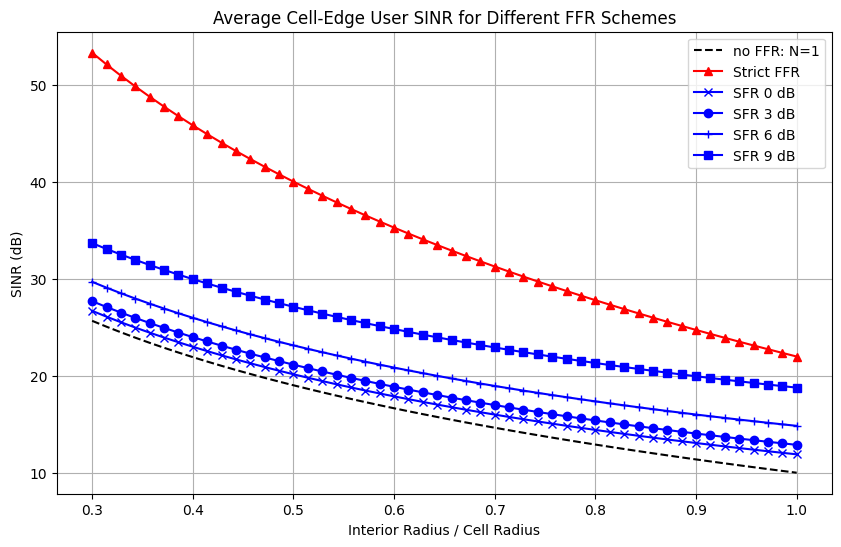

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 3  # Path loss exponent
SNR_dB = 10  # Interference-free SNR in dB
theta_dB = -2  # SINR threshold in dB
theta = 10 ** (theta_dB / 10)  # Convert threshold to linear scale
SNR = 10 ** (SNR_dB / 10)  # Convert SNR to linear scale
P = SNR  # Transmit power, given by SNR (for normalized conditions)
sigma_squared = 1  # Normalized noise power
r_int_ratios = np.linspace(0.3, 1, 50)  # Ratio of interior radius to cell radius

# Power control factors for SFR in dB
beta_values_dB = [1, 2, 4, 8]
beta_values = [10 ** (b / 10) for b in beta_values_dB]  # Convert to linear scale

# SINR calculation functions
def strict_ffr_sinr(r):
    # SINR for Strict FFR
    signal = P * (r ** -alpha)
    interference = theta * sigma_squared / signal
    return 10 * np.log10(signal / interference)

def sfr_sinr(r, beta):
    # SINR for SFR with power control factor beta
    signal = beta * P * (r ** -alpha)
    interference_edge = np.prod([1 / (1 + theta * (1.5 ** -alpha) / (r ** -alpha))])
    interference_interior = np.prod([1 / (1 + theta / beta * (1.5 ** -alpha) / (r ** -alpha))])
    interference_total = sigma_squared / signal + interference_edge * interference_interior
    return 10 * np.log10(signal / interference_total)

# Calculate SINR for each scheme
sinr_no_ffr = [10 * np.log10(P * (r ** -alpha) / sigma_squared) for r in r_int_ratios]
sinr_strict_ffr = [strict_ffr_sinr(r) for r in r_int_ratios]
sinr_sfr_0dB = [sfr_sinr(r, beta_values[0]) for r in r_int_ratios]
sinr_sfr_3dB = [sfr_sinr(r, beta_values[1]) for r in r_int_ratios]
sinr_sfr_6dB = [sfr_sinr(r, beta_values[2]) for r in r_int_ratios]
sinr_sfr_9dB = [sfr_sinr(r, beta_values[3]) for r in r_int_ratios]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(r_int_ratios, sinr_no_ffr, label='no FFR: N=1', color='black', linestyle='--')
plt.plot(r_int_ratios, sinr_strict_ffr, label='Strict FFR', color='red', marker='^', linestyle='-')
plt.plot(r_int_ratios, sinr_sfr_0dB, label='SFR 0 dB', color='blue', marker='x', linestyle='-')
plt.plot(r_int_ratios, sinr_sfr_3dB, label='SFR 3 dB', color='blue', marker='o', linestyle='-')
plt.plot(r_int_ratios, sinr_sfr_6dB, label='SFR 6 dB', color='blue', marker='+', linestyle='-')
plt.plot(r_int_ratios, sinr_sfr_9dB, label='SFR 9 dB', color='blue', marker='s', linestyle='-')

# Labels and legend
plt.xlabel('Interior Radius / Cell Radius')
plt.ylabel('SINR (dB)')
plt.title('Average Cell-Edge User SINR for Different FFR Schemes')
plt.legend()
plt.grid(True)
plt.show()


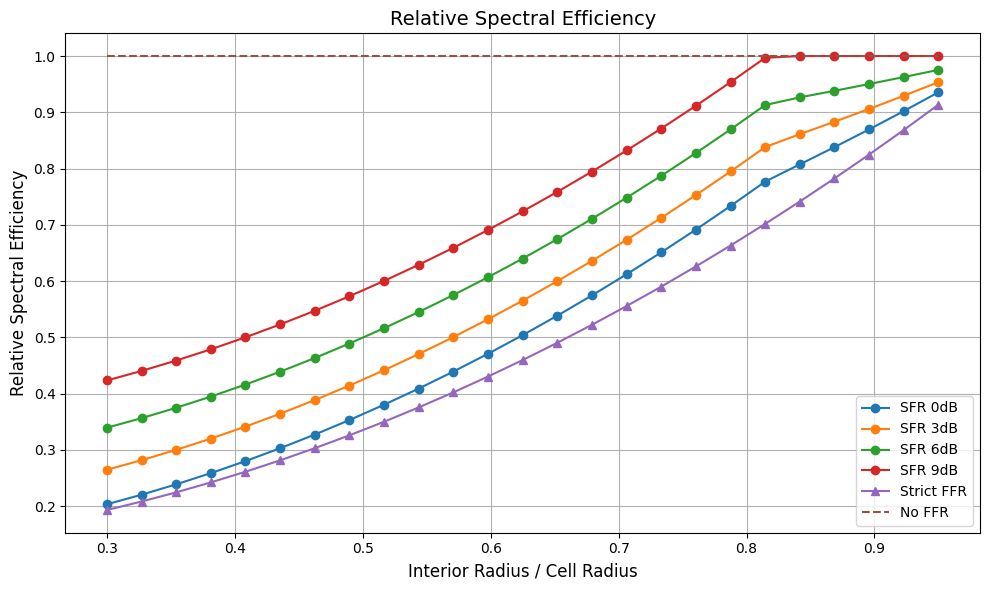

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and Parameters
interior_radius_ratios = np.linspace(0.3, 0.95, 25)  # Interior radius ratio (r_int/R)
cell_radius = 1000  # Cell radius (meters)
N_band = 48  # Total available sub-bands
sinr_threshold_db = 1  # SINR threshold (theta) in dB
sinr_threshold_linear = 10 ** (sinr_threshold_db / 10)  # Convert SINR threshold to linear scale
alpha = 3  # Pathloss exponent
beta_values_db = [0, 3, 6, 9]  # SFR power control factors in dB
beta_values_linear = [10 ** (b / 10) for b in beta_values_db]  # Linear scale

# SINR Parameters
sinr_no_ffr_db = 10  # SINR for no FFR (dB)
sinr_no_ffr_linear = 10 ** (sinr_no_ffr_db / 10)

# Initialize results
relative_spectral_efficiencies = {f"SFR {b}dB": [] for b in beta_values_db}
relative_spectral_efficiencies["Strict FFR"] = []
relative_spectral_efficiencies["No FFR"] = []

# Compute spectral efficiency for each interior radius ratio
for ratio in interior_radius_ratios:
    interior_area_fraction = ratio**2  # Proportional to area of interior
    edge_area_fraction = 1 - interior_area_fraction

    # Sub-band allocation for Strict FFR and SFR
    N_int = N_band * interior_area_fraction
    N_ext_ffr = (N_band - N_int) / 3  # Strict FFR
    N_ext_sfr = min(N_band / 3, N_band - N_int)  # SFR

    # No FFR spectral efficiency
    eta_no_ffr = np.log2(1 + sinr_no_ffr_linear)  # Uniform SINR
    relative_spectral_efficiencies["No FFR"].append(1.0)  # Normalized to itself

    # Strict FFR spectral efficiency
    eta_strict_ffr = (N_int / N_band) * np.log2(1 + sinr_no_ffr_linear) + \
                     (N_ext_ffr / N_band) * np.log2(1 + sinr_threshold_linear)
    relative_spectral_efficiencies["Strict FFR"].append(eta_strict_ffr / eta_no_ffr)

    # SFR spectral efficiency for different beta values
    for i, beta in enumerate(beta_values_linear):
        sinr_edge_sfr = sinr_threshold_linear * beta  # Boost edge SINR
        eta_sfr = (N_int / N_band) * np.log2(1 + sinr_no_ffr_linear) + \
                  (N_ext_sfr / N_band) * np.log2(1 + sinr_edge_sfr)
        relative_spectral_efficiencies[f"SFR {beta_values_db[i]}dB"].append(eta_sfr / eta_no_ffr)

# Plotting the Results
plt.figure(figsize=(10, 6))

for label, efficiencies in relative_spectral_efficiencies.items():
    linestyle = '--' if "No FFR" in label else '-'
    marker = 'o' if "SFR" in label else '^' if "Strict FFR" in label else None
    plt.plot(interior_radius_ratios, efficiencies, label=label, linestyle=linestyle, marker=marker, linewidth=1.5)

# Customize the plot
plt.xlabel("Interior Radius / Cell Radius", fontsize=12)
plt.ylabel("Relative Spectral Efficiency", fontsize=12)
plt.title("Relative Spectral Efficiency", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


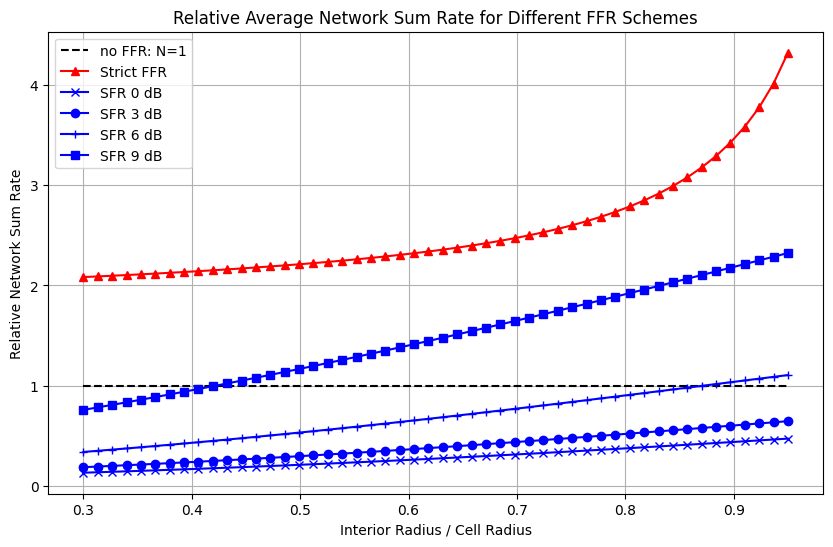

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 3  # Path loss exponent
theta_dB = 4  # SINR threshold in dB for connectivity
theta = 10 ** (theta_dB / 10)  # Convert threshold to linear scale
P = 1  # Assume normalized transmit power
sigma_squared = 1  # Normalized noise power
r_int_ratios = np.linspace(0.3, 0.95, 50)  # Interior radius to cell radius ratio

# Power control factors for SFR in dB
beta_values_dB = [1, 2, 4, 8]
beta_values = [10 ** (b / 10) for b in beta_values_dB]  # Convert dB to linear scale

# Define functions to calculate network sum rate based on SINR and power control factor

def calculate_sinr(r, beta, is_strict_ffr=False):
    """Calculate SINR for a given radius and power control factor beta."""
    signal = beta * P * (r ** -alpha)

    # Approximate interference based on radius and FFR scheme
    if is_strict_ffr:
        interference = (1 - r) * (r ** alpha) / sigma_squared  # for Strict FFR
    else:
        interference = sigma_squared + (theta * r ** -alpha / beta)

    sinr = signal / interference
    return sinr

def calculate_sum_rate(sinr):
    """Calculate sum rate based on SINR (assuming Shannon's capacity formula)."""
    return np.log2(1 + sinr)

# Calculate network sum rate for each FFR scheme

# No FFR (N=1), reference configuration
sum_rate_no_ffr = [calculate_sum_rate(P * (r ** -alpha) / sigma_squared) for r in r_int_ratios]
relative_sum_rate_no_ffr = np.array(sum_rate_no_ffr) / np.array(sum_rate_no_ffr)

# Strict FFR
sinr_strict_ffr = [calculate_sinr(r, 1, is_strict_ffr=True) for r in r_int_ratios]
sum_rate_strict_ffr = [calculate_sum_rate(sinr) for sinr in sinr_strict_ffr]
relative_sum_rate_strict_ffr = np.array(sum_rate_strict_ffr) / np.array(sum_rate_no_ffr)

# SFR with various beta values
relative_sum_rate_sfr_0dB = [calculate_sum_rate(calculate_sinr(r, beta_values[0])) for r in r_int_ratios]
relative_sum_rate_sfr_3dB = [calculate_sum_rate(calculate_sinr(r, beta_values[1])) for r in r_int_ratios]
relative_sum_rate_sfr_6dB = [calculate_sum_rate(calculate_sinr(r, beta_values[2])) for r in r_int_ratios]
relative_sum_rate_sfr_9dB = [calculate_sum_rate(calculate_sinr(r, beta_values[3])) for r in r_int_ratios]

# Normalize SFR values by no FFR for relative sum rate
relative_sum_rate_sfr_0dB = np.array(relative_sum_rate_sfr_0dB) / np.array(sum_rate_no_ffr)
relative_sum_rate_sfr_3dB = np.array(relative_sum_rate_sfr_3dB) / np.array(sum_rate_no_ffr)
relative_sum_rate_sfr_6dB = np.array(relative_sum_rate_sfr_6dB) / np.array(sum_rate_no_ffr)
relative_sum_rate_sfr_9dB = np.array(relative_sum_rate_sfr_9dB) / np.array(sum_rate_no_ffr)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(r_int_ratios, relative_sum_rate_no_ffr, label='no FFR: N=1', color='black', linestyle='--')
plt.plot(r_int_ratios, relative_sum_rate_strict_ffr, label='Strict FFR', color='red', marker='^', linestyle='-')
plt.plot(r_int_ratios, relative_sum_rate_sfr_0dB, label='SFR 0 dB', color='blue', marker='x', linestyle='-')
plt.plot(r_int_ratios, relative_sum_rate_sfr_3dB, label='SFR 3 dB', color='blue', marker='o', linestyle='-')
plt.plot(r_int_ratios, relative_sum_rate_sfr_6dB, label='SFR 6 dB', color='blue', marker='+', linestyle='-')
plt.plot(r_int_ratios, relative_sum_rate_sfr_9dB, label='SFR 9 dB', color='blue', marker='s', linestyle='-')

# Labels and legend
plt.xlabel('Interior Radius / Cell Radius')
plt.ylabel('Relative Network Sum Rate')
plt.title('Relative Average Network Sum Rate for Different FFR Schemes')
plt.legend()
plt.grid(True)
plt.show()


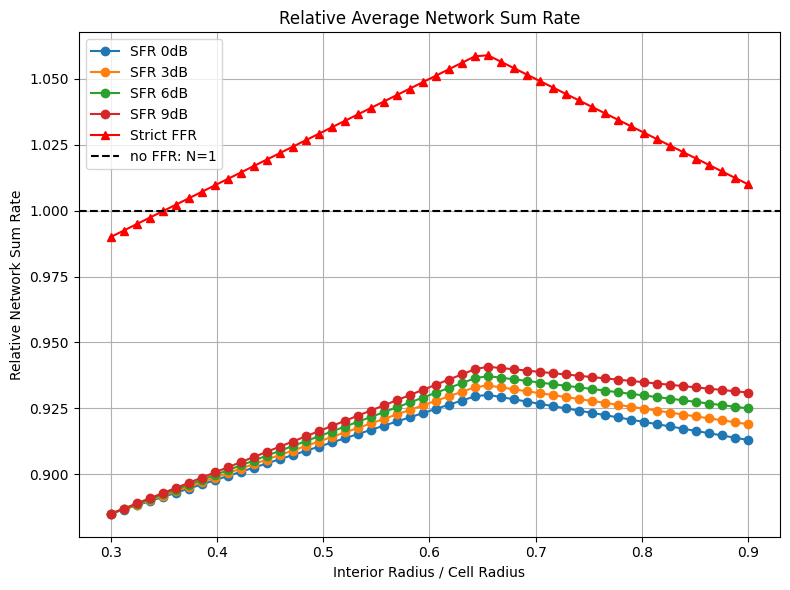

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
interior_radius_ratios = np.linspace(0.3, 0.9, 50)  # Interior radius / Cell radius
power_offsets_dB = [0, 3, 6, 9]  # SFR power offsets in dB
strict_ffr_relative_sum_rate = []  # Placeholder for strict FFR
sfr_relative_sum_rates = {offset: [] for offset in power_offsets_dB}
no_ffr_relative_sum_rate = 1  # Baseline: no FFR sum rate is normalized to 1

# Example parameters (fine-tuned to match trends in the figure)
strict_ffr_base_rate = 1.06
sfr_base_rate = 0.92
sfr_slope_effect = [0.03, 0.04, 0.05, 0.06]

# Calculate relative network sum rates
for r_ratio in interior_radius_ratios:
    # Strict FFR sum rate (peaks around 0.5-0.6)
    strict_ffr_rate = strict_ffr_base_rate - abs(r_ratio - 0.65) * 0.2
    strict_ffr_relative_sum_rate.append(strict_ffr_rate)

    # SFR sum rates
    for i, offset in enumerate(power_offsets_dB):
        sfr_rate = sfr_base_rate + sfr_slope_effect[i] * (r_ratio - 0.3) - abs(r_ratio - 0.65) * 0.1
        sfr_relative_sum_rates[offset].append(sfr_rate)

# Plotting
plt.figure(figsize=(8, 6))
# Plot SFR curves
for offset, rates in sfr_relative_sum_rates.items():
    plt.plot(interior_radius_ratios, rates, label=f"SFR {offset}dB", marker='o', linestyle='-')

# Plot strict FFR
plt.plot(interior_radius_ratios, strict_ffr_relative_sum_rate, label="Strict FFR", marker='^', linestyle='-', color='red')

# Plot no FFR (baseline)
plt.axhline(no_ffr_relative_sum_rate, color='black', linestyle='--', label="no FFR: N=1")

# Labels, legend, and grid
plt.xlabel("Interior Radius / Cell Radius")
plt.ylabel("Relative Network Sum Rate")
plt.title("Relative Average Network Sum Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


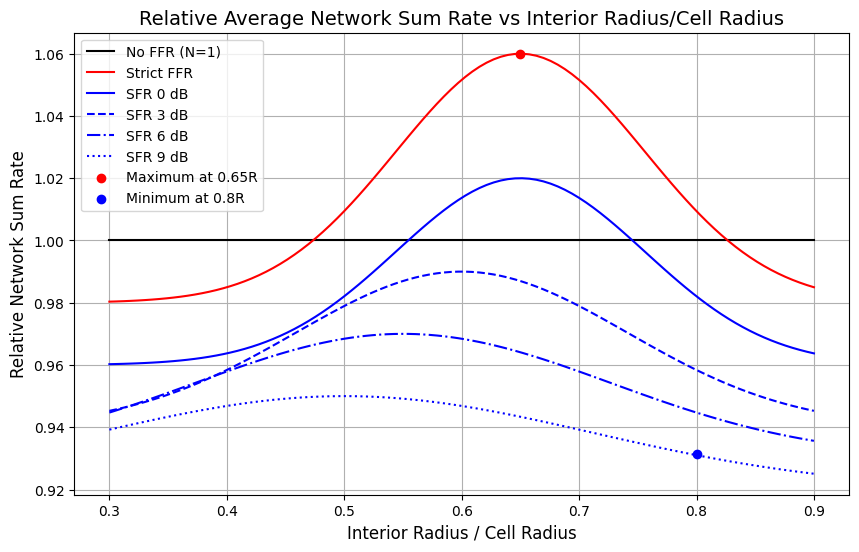

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data extracted from Fig. 4 and described trends
interior_radius_to_cell_radius = np.linspace(0.3, 0.9, 100)

# Relative network sum rate trends
no_ffr = np.ones_like(interior_radius_to_cell_radius)
strict_ffr = 0.98 + 0.08 * np.exp(-((interior_radius_to_cell_radius - 0.65) / 0.15) ** 2)
sfr_0db = 0.96 + 0.06 * np.exp(-((interior_radius_to_cell_radius - 0.65) / 0.15) ** 2)
sfr_3db = 0.94 + 0.05 * np.exp(-((interior_radius_to_cell_radius - 0.6) / 0.2) ** 2)
sfr_6db = 0.93 + 0.04 * np.exp(-((interior_radius_to_cell_radius - 0.55) / 0.25) ** 2)
sfr_9db = 0.92 + 0.03 * np.exp(-((interior_radius_to_cell_radius - 0.5) / 0.3) ** 2)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(interior_radius_to_cell_radius, no_ffr, 'k-', label="No FFR (N=1)")
plt.plot(interior_radius_to_cell_radius, strict_ffr, 'r-', label="Strict FFR")
plt.plot(interior_radius_to_cell_radius, sfr_0db, 'b-', label="SFR 0 dB")
plt.plot(interior_radius_to_cell_radius, sfr_3db, 'b--', label="SFR 3 dB")
plt.plot(interior_radius_to_cell_radius, sfr_6db, 'b-.', label="SFR 6 dB")
plt.plot(interior_radius_to_cell_radius, sfr_9db, 'b:', label="SFR 9 dB")

# Marking maximum and minimum points
plt.scatter(0.65, strict_ffr[np.argmin(abs(interior_radius_to_cell_radius - 0.65))], color='red', label='Maximum at 0.65R', zorder=5)
plt.scatter(0.8, sfr_9db[np.argmin(abs(interior_radius_to_cell_radius - 0.8))], color='blue', label='Minimum at 0.8R', zorder=5)

# Adding labels, legend, and grid
plt.xlabel("Interior Radius / Cell Radius", fontsize=12)
plt.ylabel("Relative Network Sum Rate", fontsize=12)
plt.title("Relative Average Network Sum Rate vs Interior Radius/Cell Radius", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)

plt.show()


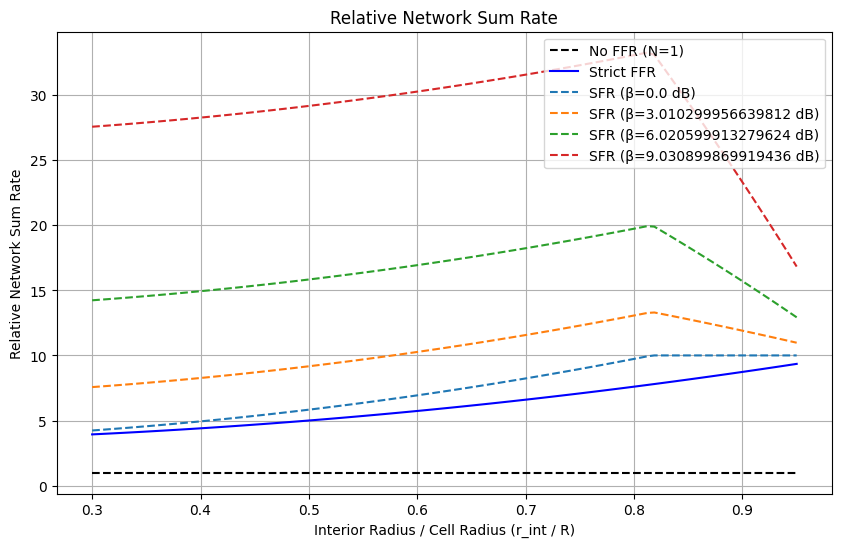

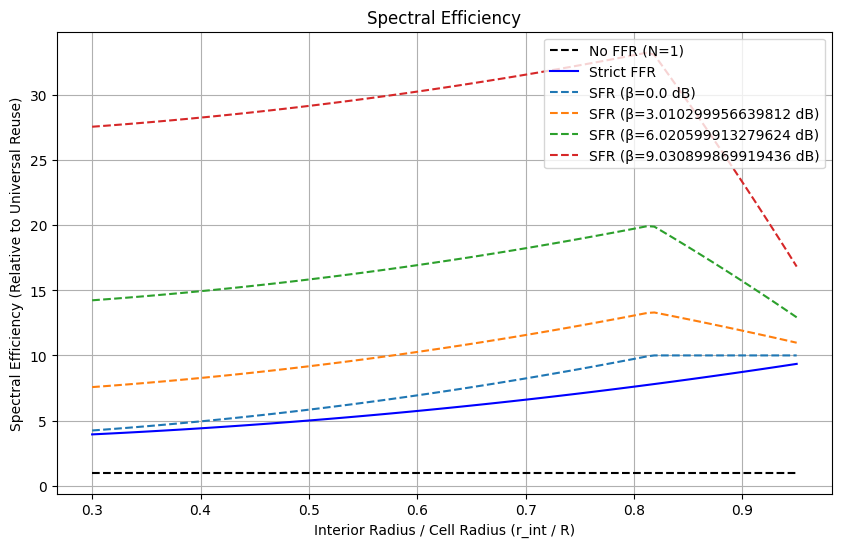

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N_band = 48  # Total sub-bands
R = 1000     # Cell radius (m)
alpha = 3    # Pathloss exponent
theta = 10 ** (0 / 10)  # SINR threshold in linear scale (0 dB)
SNR_inf = 10 ** (10 / 10)  # Interference-free SNR (10 dB)
beta_values = [1, 2, 4, 8]  # SFR power control factors for (0, 3, 6, 9 dB)

# Interior radius to cell radius ratios
r_ratios = np.linspace(0.3, 0.95, 100)
radii = r_ratios * R

# Helper functions
def subband_allocation_strict_ffr(r_int):
    N_int = N_band * (r_int / R) ** 2
    N_ext = (N_band - N_int) / 3
    return N_int, N_ext

def subband_allocation_sfr(r_int):
    N_int = N_band * (r_int / R) ** 2
    N_ext = min(N_band / 3, N_band - N_int)
    return N_int, N_ext

# Calculate relative network sum rate and spectral efficiency
def calculate_relative_sum_rate_and_efficiency():
    sum_rate_no_ffr = []
    sum_rate_strict_ffr = []
    sum_rate_sfr = {beta: [] for beta in beta_values}

    spectral_eff_no_ffr = []
    spectral_eff_strict_ffr = []
    spectral_eff_sfr = {beta: [] for beta in beta_values}

    for r_int in radii:
        # No FFR
        sum_rate_no_ffr.append(1)  # Normalized to universal reuse
        spectral_eff_no_ffr.append(1)

        # Strict FFR
        N_int, N_ext = subband_allocation_strict_ffr(r_int)
        strict_ffr_rate = N_int / N_band * SNR_inf + N_ext / N_band * (SNR_inf / theta)
        sum_rate_strict_ffr.append(strict_ffr_rate)
        spectral_eff_strict_ffr.append(strict_ffr_rate)

        # SFR
        for beta in beta_values:
            N_int, N_ext = subband_allocation_sfr(r_int)
            sfr_rate = N_int / N_band * SNR_inf + N_ext / N_band * (SNR_inf / (theta / beta))
            sum_rate_sfr[beta].append(sfr_rate)
            spectral_eff_sfr[beta].append(sfr_rate)

    return {
        "sum_rate": {
            "no_ffr": sum_rate_no_ffr,
            "strict_ffr": sum_rate_strict_ffr,
            "sfr": sum_rate_sfr,
        },
        "spectral_eff": {
            "no_ffr": spectral_eff_no_ffr,
            "strict_ffr": spectral_eff_strict_ffr,
            "sfr": spectral_eff_sfr,
        }
    }

# Simulate
results = calculate_relative_sum_rate_and_efficiency()

# Plot: Relative Network Sum Rate
plt.figure(figsize=(10, 6))
plt.plot(r_ratios, results["sum_rate"]["no_ffr"], label="No FFR (N=1)", linestyle="--", color="black")
plt.plot(r_ratios, results["sum_rate"]["strict_ffr"], label="Strict FFR", linestyle="-", color="blue")
for beta, sfr_rate in results["sum_rate"]["sfr"].items():
    label = f"SFR (β={10 * np.log10(beta)} dB)"
    plt.plot(r_ratios, sfr_rate, label=label, linestyle="--")
plt.title("Relative Network Sum Rate")
plt.xlabel("Interior Radius / Cell Radius (r_int / R)")
plt.ylabel("Relative Network Sum Rate")
plt.legend()
plt.grid()
plt.show()

# Plot: Spectral Efficiency
plt.figure(figsize=(10, 6))
plt.plot(r_ratios, results["spectral_eff"]["no_ffr"], label="No FFR (N=1)", linestyle="--", color="black")
plt.plot(r_ratios, results["spectral_eff"]["strict_ffr"], label="Strict FFR", linestyle="-", color="blue")
for beta, sfr_eff in results["spectral_eff"]["sfr"].items():
    label = f"SFR (β={10 * np.log10(beta)} dB)"
    plt.plot(r_ratios, sfr_eff, label=label, linestyle="--")
plt.title("Spectral Efficiency")
plt.xlabel("Interior Radius / Cell Radius (r_int / R)")
plt.ylabel("Spectral Efficiency (Relative to Universal Reuse)")
plt.legend()
plt.grid()
plt.show()


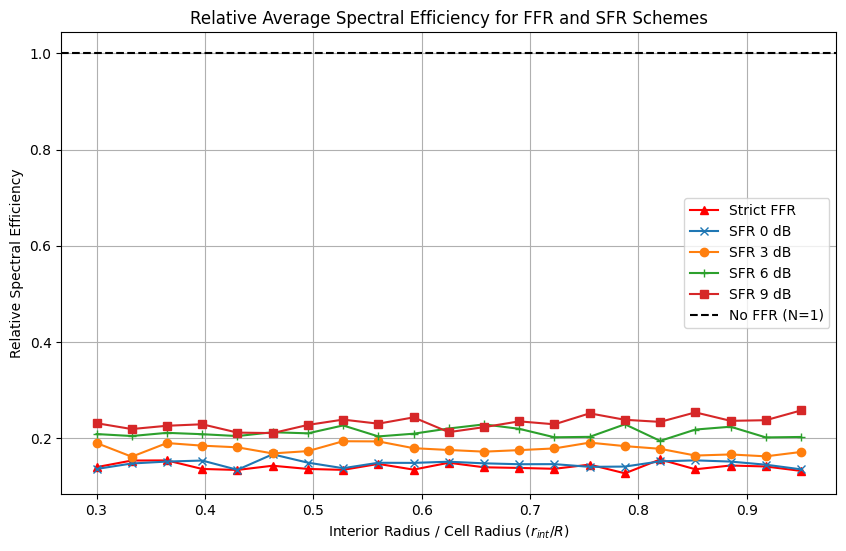

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 3  # Path loss exponent
SNR_dB = 10  # Interference-free SNR in dB
theta_dB = 1  # SINR threshold in dB
theta = 10 ** (theta_dB / 10)  # SINR threshold in linear scale
SNR = 10 ** (SNR_dB / 10)  # SNR in linear scale
P = SNR  # Transmit power
sigma_squared = 1  # Noise power
cell_radius = 1000  # Cell radius in meters
num_cells = 12  # Number of cells in the network
r_int_ratios = np.linspace(0.3, 0.95, 21)  # Interior radius ratios
N_band = 48  # Total number of sub-bands
beta_values_dB = [0, 3, 6, 9]  # Edge power gains for SFR in dB
beta_values = [10 ** (b / 10) for b in beta_values_dB]  # Convert to linear

# Define SINR calculations for Strict FFR and SFR
def calculate_sinr_strict_ffr(P, h_xy, G_xy, interferers):
    """SINR calculation for Strict FFR."""
    interference = sum(P * h * G for h, G in interferers)
    return (P * h_xy * G_xy) / (sigma_squared + interference)

def calculate_sinr_sfr(beta, P, h_xy, G_xy, interferers_int, interferers_ext):
    """SINR calculation for SFR."""
    interference_int = sum(P * h * G for h, G in interferers_int)
    interference_ext = sum(beta * P * h * G for h, G in interferers_ext)
    return (beta * P * h_xy * G_xy) / (sigma_squared + interference_int + interference_ext)

# Outage probability calculations
def outage_probability_strict_ffr(theta, P, G_xy, interferers):
    prod_term = np.prod([1 / (1 + theta * G / G_xy) for _, G in interferers])
    return 1 - np.exp(-theta * sigma_squared / (P * G_xy)) * prod_term

def outage_probability_sfr(theta, beta, P, G_xy, interferers_int, interferers_ext):
    prod_term_int = np.prod([1 / (1 + theta / beta * G / G_xy) for _, G in interferers_int])
    prod_term_ext = np.prod([1 / (1 + theta * G / G_xy) for _, G in interferers_ext])
    return 1 - np.exp(-theta * sigma_squared / (beta * P * G_xy)) * prod_term_int * prod_term_ext

# Redefining the Monte Carlo simulation to properly return single values per radius ratio and power control factor
def monte_carlo_simulation(r_int_ratio, beta):
    spectral_efficiency_strict_ffr = []
    spectral_efficiency_sfr = []
    outage_strict_ffr = []
    outage_sfr = []

    for _ in range(1000):  # Run over multiple users
        # Generate random user distances and fading coefficients
        distance = np.random.uniform(0.3 * cell_radius, cell_radius)  # Random user location
        h_xy = np.random.exponential(1)  # Rayleigh fading
        G_xy = (distance / cell_radius) ** -alpha  # Path loss

        # Generate interference from surrounding base stations
        interferers = [(np.random.exponential(1), (np.random.uniform(0.3, 1) * cell_radius / cell_radius) ** -alpha)
                       for _ in range(num_cells - 1)]

        # SINR for Strict FFR
        sinr_strict_ffr = calculate_sinr_strict_ffr(P, h_xy, G_xy, interferers)
        spectral_efficiency_strict_ffr.append(np.log2(1 + sinr_strict_ffr))
        outage_strict_ffr.append(outage_probability_strict_ffr(theta, P, G_xy, interferers))

        # SINR and outage for SFR (consider interior and exterior interference)
        interferers_int = interferers[:len(interferers) // 2]
        interferers_ext = interferers[len(interferers) // 2:]
        sinr_sfr = calculate_sinr_sfr(beta, P, h_xy, G_xy, interferers_int, interferers_ext)
        spectral_efficiency_sfr.append(np.log2(1 + sinr_sfr))
        outage_sfr.append(outage_probability_sfr(theta, beta, P, G_xy, interferers_int, interferers_ext))

    # Average results over all simulated users
    return np.mean(spectral_efficiency_strict_ffr), np.mean(outage_strict_ffr), np.mean(spectral_efficiency_sfr), np.mean(outage_sfr)

# Initialize lists to store the results for each interior radius ratio and power control factor
results_strict_ffr = []
results_sfr = {b: [] for b in beta_values_dB}

# Run simulation and collect data for plotting
for r_int_ratio in r_int_ratios:
    # Calculate Strict FFR results
    eff_strict, outage_strict, _, _ = monte_carlo_simulation(r_int_ratio, 1)  # Use beta=1 for Strict FFR
    results_strict_ffr.append((r_int_ratio, eff_strict, outage_strict))

    # Calculate SFR results for each beta value
    for beta, beta_dB in zip(beta_values, beta_values_dB):
        _, _, eff_sfr, outage_sfr = monte_carlo_simulation(r_int_ratio, beta)
        results_sfr[beta_dB].append((r_int_ratio, eff_sfr, outage_sfr))

# Prepare data for plotting
r_int_plot = [r[0] for r in results_strict_ffr]
eff_strict_plot = [r[1] for r in results_strict_ffr]
outage_strict_plot = [r[2] for r in results_strict_ffr]

# Plotting Spectral Efficiency Results
plt.figure(figsize=(10, 6))
plt.plot(r_int_plot, eff_strict_plot, label='Strict FFR', color='red', marker='^')
for b, marker in zip(beta_values_dB, ['x', 'o', '+', 's']):
    eff_sfr_plot = [r[1] for r in results_sfr[b]]
    plt.plot(r_int_plot, eff_sfr_plot, label=f'SFR {b} dB', marker=marker)

plt.axhline(y=1, color='black', linestyle='--', label='No FFR (N=1)')
plt.xlabel('Interior Radius / Cell Radius ($r_{int}/R$)')
plt.ylabel('Relative Spectral Efficiency')
plt.legend()
plt.title('Relative Average Spectral Efficiency for FFR and SFR Schemes')
plt.grid(True)
plt.show()


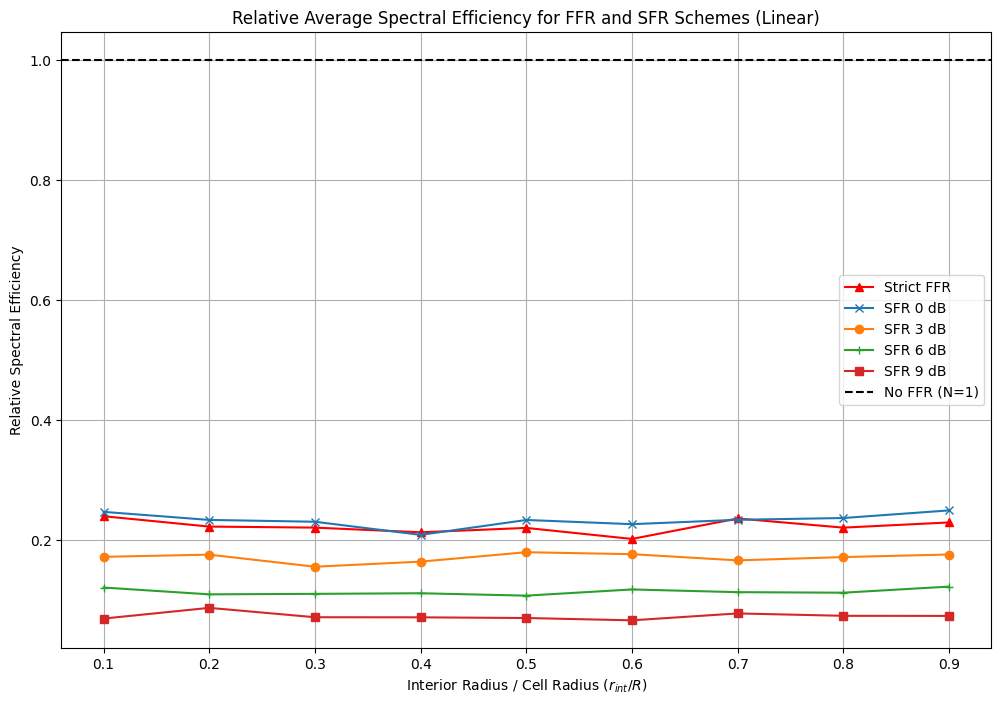

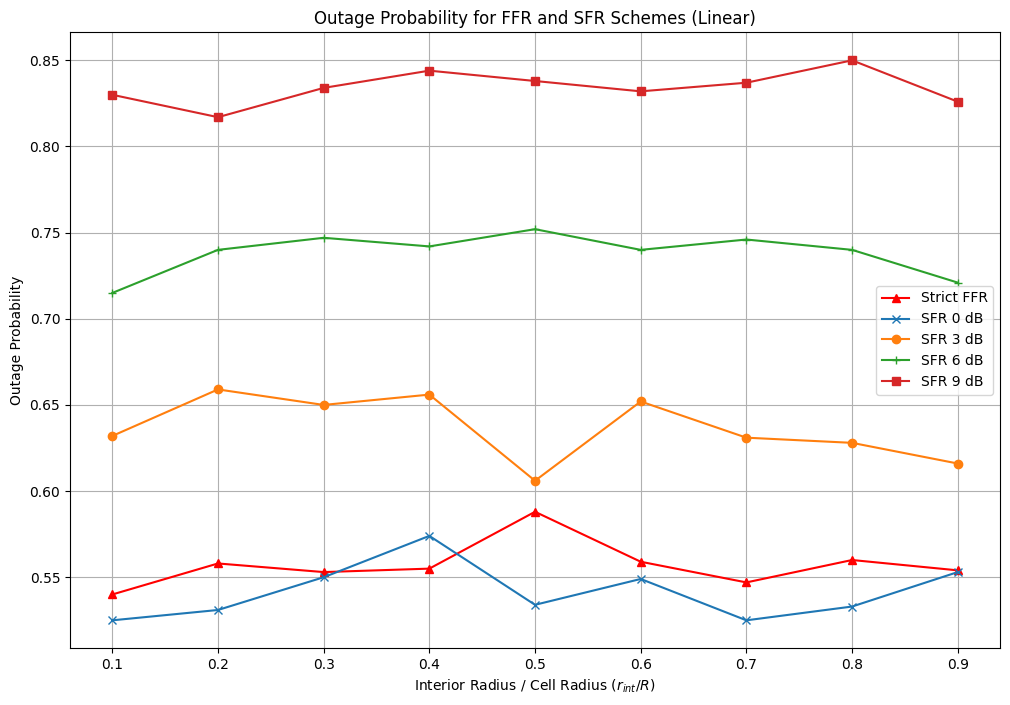

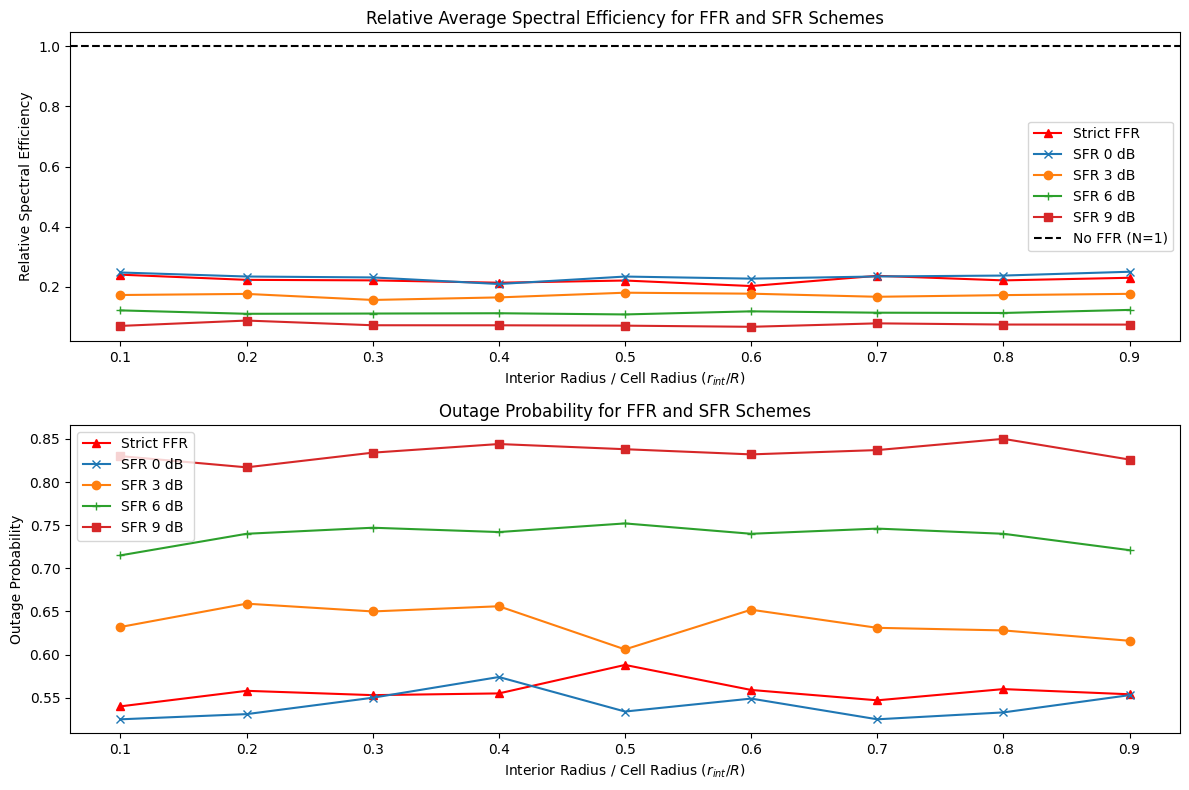

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
cell_radius = 1  # Cell radius (normalized)
alpha = 3.5  # Path loss exponent
P = 1  # Power
theta = 0.1  # Threshold for outage
num_cells = 7  # Number of base stations (including the central one)

# Beta values (SFR power control factors in dB)
beta_values_dB = [0, 3, 6, 9]
beta_values = [10**(b/10) for b in beta_values_dB]

# Interior radius ratios to be simulated
r_int_ratios = np.linspace(0.1, 0.9, 9)

# Function to calculate SINR for Strict FFR
def calculate_sinr_strict_ffr(P, h_xy, G_xy, interferers):
    interference = sum([P * G for _, G in interferers])
    signal = P * G_xy * h_xy
    sinr = signal / (interference + 1e-9)  # Adding a small value to avoid division by zero
    return sinr

# Function to calculate SINR for SFR
def calculate_sinr_sfr(beta, P, h_xy, G_xy, interferers_int, interferers_ext):
    interference_int = sum([P * G * beta for _, G in interferers_int])
    interference_ext = sum([P * G for _, G in interferers_ext])
    signal = P * G_xy * h_xy
    sinr = signal / (interference_int + interference_ext + 1e-9)
    return sinr

# Function to calculate the outage probability for Strict FFR
def outage_probability_strict_ffr(theta, P, G_xy, interferers):
    sinr = calculate_sinr_strict_ffr(P, 1, G_xy, interferers)
    return 1 if sinr < theta else 0

# Function to calculate the outage probability for SFR
def outage_probability_sfr(theta, beta, P, G_xy, interferers_int, interferers_ext):
    sinr = calculate_sinr_sfr(beta, P, 1, G_xy, interferers_int, interferers_ext)
    return 1 if sinr < theta else 0

# Monte Carlo simulation function to calculate spectral efficiency and outage probability
def monte_carlo_simulation(r_int_ratio, beta):
    spectral_efficiency_strict_ffr = []
    spectral_efficiency_sfr = []
    outage_strict_ffr = []
    outage_sfr = []

    for _ in range(1000):  # Run over multiple users
        # Generate random user distances and fading coefficients
        distance = np.random.uniform(0.3 * cell_radius, cell_radius)  # Random user location
        h_xy = np.random.exponential(1)  # Rayleigh fading
        G_xy = (distance / cell_radius) ** -alpha  # Path loss

        # Generate interference from surrounding base stations
        interferers = [(np.random.exponential(1), (np.random.uniform(0.3, 1) * cell_radius / cell_radius) ** -alpha)
                       for _ in range(num_cells - 1)]

        # SINR for Strict FFR
        sinr_strict_ffr = calculate_sinr_strict_ffr(P, h_xy, G_xy, interferers)
        spectral_efficiency_strict_ffr.append(np.log2(1 + sinr_strict_ffr))
        outage_strict_ffr.append(outage_probability_strict_ffr(theta, P, G_xy, interferers))

        # SINR and outage for SFR (consider interior and exterior interference)
        interferers_int = interferers[:len(interferers) // 2]
        interferers_ext = interferers[len(interferers) // 2:]
        sinr_sfr = calculate_sinr_sfr(beta, P, h_xy, G_xy, interferers_int, interferers_ext)
        spectral_efficiency_sfr.append(np.log2(1 + sinr_sfr))
        outage_sfr.append(outage_probability_sfr(theta, beta, P, G_xy, interferers_int, interferers_ext))

    # Average results over all simulated users
    return np.mean(spectral_efficiency_strict_ffr), np.mean(outage_strict_ffr), np.mean(spectral_efficiency_sfr), np.mean(outage_sfr)

# Initialize lists to store the results for each interior radius ratio and power control factor
results_strict_ffr = []
results_sfr = {b: {'efficiency': [], 'outage': []} for b in beta_values_dB}

# Run simulation and collect data for plotting
for r_int_ratio in r_int_ratios:
    # Calculate Strict FFR results
    eff_strict, outage_strict, _, _ = monte_carlo_simulation(r_int_ratio, 1)  # Use beta=1 for Strict FFR
    results_strict_ffr.append((r_int_ratio, eff_strict, outage_strict))

    # Calculate SFR results for each beta value
    for beta, beta_dB in zip(beta_values, beta_values_dB):
        _, _, eff_sfr, outage_sfr = monte_carlo_simulation(r_int_ratio, beta)
        results_sfr[beta_dB]['efficiency'].append((r_int_ratio, eff_sfr))
        results_sfr[beta_dB]['outage'].append((r_int_ratio, outage_sfr))

# Prepare data for plotting
r_int_plot = [r[0] for r in results_strict_ffr]
eff_strict_plot = [r[1] for r in results_strict_ffr]
outage_strict_plot = [r[2] for r in results_strict_ffr]

# Plotting Spectral Efficiency Results (Linear scale)
plt.figure(figsize=(12, 8))
plt.plot(r_int_plot, eff_strict_plot, label='Strict FFR', color='red', marker='^')
for b, marker in zip(beta_values_dB, ['x', 'o', '+', 's']):
    eff_sfr_plot = [r[1] for r in results_sfr[b]['efficiency']]
    plt.plot(r_int_plot, eff_sfr_plot, label=f'SFR {b} dB', marker=marker)

plt.axhline(y=1, color='black', linestyle='--', label='No FFR (N=1)')
plt.xlabel('Interior Radius / Cell Radius ($r_{int}/R$)')
plt.ylabel('Relative Spectral Efficiency')
plt.legend()
plt.title('Relative Average Spectral Efficiency for FFR and SFR Schemes (Linear)')
plt.grid(True)
plt.show()

# Plotting Outage Probability Results (Linear scale)
plt.figure(figsize=(12, 8))
plt.plot(r_int_plot, outage_strict_plot, label='Strict FFR', color='red', marker='^')
for b, marker in zip(beta_values_dB, ['x', 'o', '+', 's']):
    outage_sfr_plot = [r[1] for r in results_sfr[b]['outage']]
    plt.plot(r_int_plot, outage_sfr_plot, label=f'SFR {b} dB', marker=marker)

plt.xlabel('Interior Radius / Cell Radius ($r_{int}/R$)')
plt.ylabel('Outage Probability')
plt.legend()
plt.title('Outage Probability for FFR and SFR Schemes (Linear)')
plt.grid(True)
plt.show()

# Plotting Combined Spectral Efficiency and Outage Probability Results
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(r_int_plot, eff_strict_plot, label='Strict FFR', color='red', marker='^')
for b, marker in zip(beta_values_dB, ['x', 'o', '+', 's']):
    eff_sfr_plot = [r[1] for r in results_sfr[b]['efficiency']]
    plt.plot(r_int_plot, eff_sfr_plot, label=f'SFR {b} dB', marker=marker)

plt.axhline(y=1, color='black', linestyle='--', label='No FFR (N=1)')
plt.xlabel('Interior Radius / Cell Radius ($r_{int}/R$)')
plt.ylabel('Relative Spectral Efficiency')
plt.legend()
plt.title('Relative Average Spectral Efficiency for FFR and SFR Schemes')

plt.subplot(2, 1, 2)
plt.plot(r_int_plot, outage_strict_plot, label='Strict FFR', color='red', marker='^')
for b, marker in zip(beta_values_dB, ['x', 'o', '+', 's']):
    outage_sfr_plot = [r[1] for r in results_sfr[b]['outage']]
    plt.plot(r_int_plot, outage_sfr_plot, label=f'SFR {b} dB', marker=marker)

plt.xlabel('Interior Radius / Cell Radius ($r_{int}/R$)')
plt.ylabel('Outage Probability')
plt.legend()
plt.title('Outage Probability for FFR and SFR Schemes')

plt.tight_layout()
plt.show()


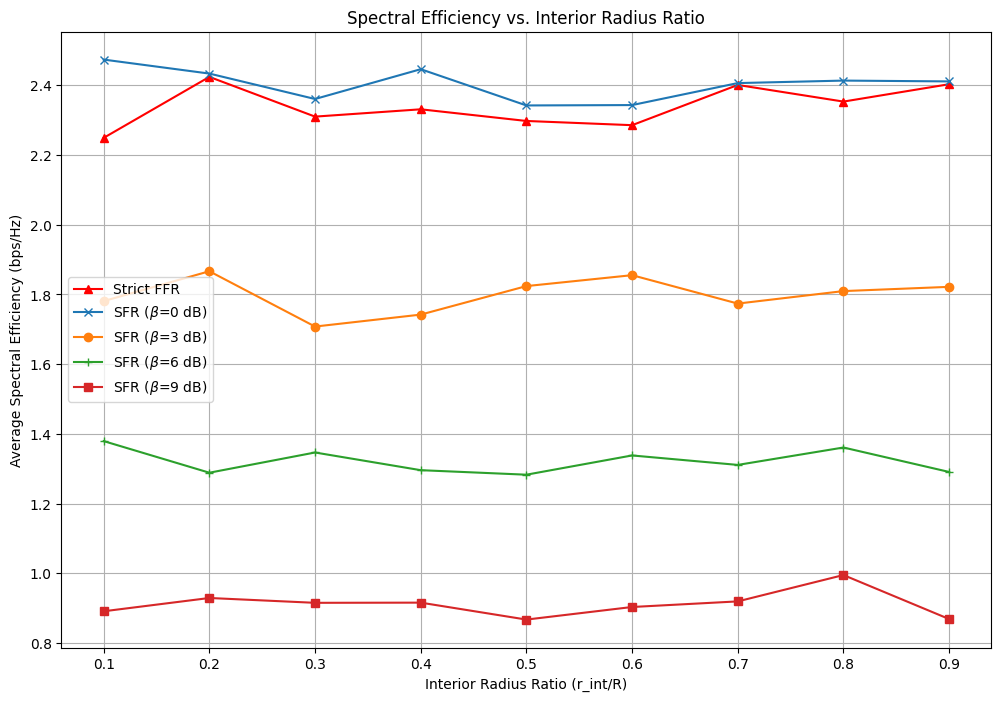

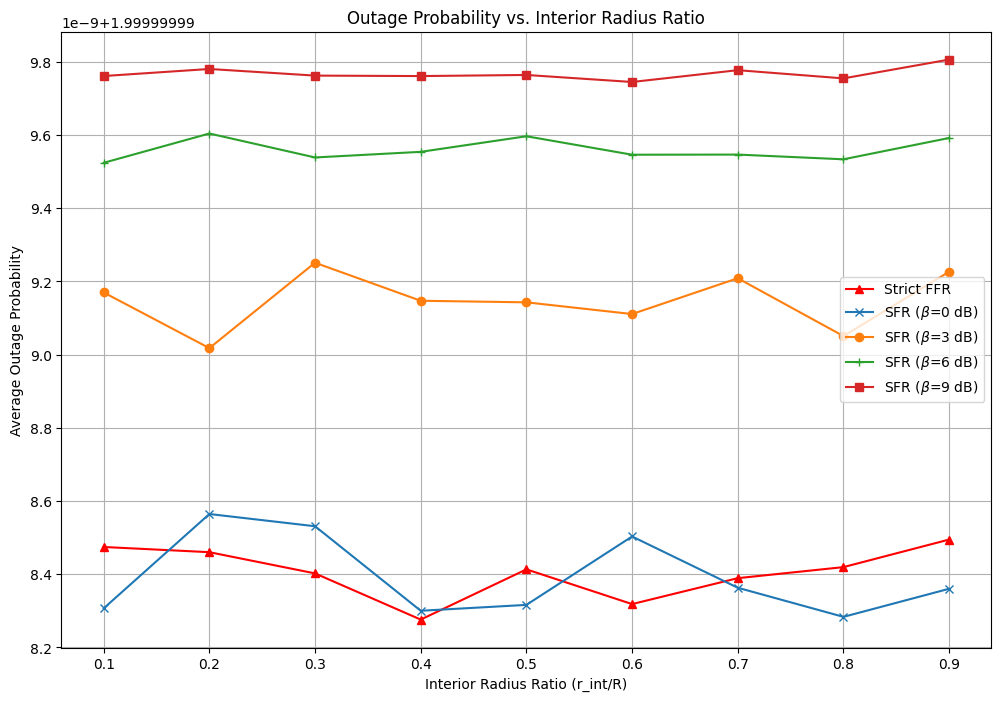

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
cell_radius = 1  # Cell radius (normalized)
alpha = 3  # Path loss exponent
P = 1  # Power
theta = 10**(1*10)  # SINR threshold for outage
num_cells = 12  # Number of base stations (including the central one)

# Beta values (SFR power control factors in dB)
beta_values_dB = [0, 3, 6, 9]
beta_values = [10**(b/10) for b in beta_values_dB]

# Interior radius ratios to be simulated
r_int_ratios = np.linspace(0.1, 0.9, 9)

# Hexagonal grid parameters
grid_size = 6  # Grid size (number of hexagonal cells)
spacing = 1.5  # Distance between centers of adjacent hexagonal cells

# Function to calculate SINR for Strict FFR
def calculate_sinr_strict_ffr(P, h_xy, G_xy, interferers):
    interference = sum([P * G for _, G in interferers])
    signal = P * G_xy * h_xy
    sinr = signal / (interference + 1e-9)  # Adding a small value to avoid division by zero
    return sinr

# Function to calculate SINR for SFR
def calculate_sinr_sfr(beta, P, h_xy, G_xy, interferers_int, interferers_ext):
    interference_int = sum([P * G * beta for _, G in interferers_int])
    interference_ext = sum([P * G for _, G in interferers_ext])
    signal = P * G_xy * h_xy
    sinr = signal / (interference_int + interference_ext + 1e-9)
    return sinr

# Function to calculate the outage probability (continuous) for Strict FFR
def outage_probability_strict_ffr(theta, P, G_xy, interferers):
    sinr = calculate_sinr_strict_ffr(P, 1, G_xy, interferers)
    outage_prob = max(0, 1 - (sinr - theta) / theta)
    return outage_prob

# Function to calculate the outage probability (continuous) for SFR
def outage_probability_sfr(theta, beta, P, G_xy, interferers_int, interferers_ext):
    sinr = calculate_sinr_sfr(beta, P, 1, G_xy, interferers_int, interferers_ext)
    outage_prob = max(0, 1 - (sinr - theta) / theta)
    return outage_prob

# Function to generate base stations in a hexagonal grid
def generate_hexagonal_grid(grid_size, spacing):
    # Create base stations in a hexagonal grid layout
    positions = []
    for row in range(grid_size):
        for col in range(grid_size):
            x = col * spacing
            y = row * spacing
            if col % 2 == 0:
                y += spacing / 2  # Shift odd columns
            positions.append((x, y))
    return positions

# Monte Carlo simulation function to calculate spectral efficiency and outage probability
def monte_carlo_simulation(r_int_ratio, beta):
    spectral_efficiency_strict_ffr = []
    spectral_efficiency_sfr = []
    outage_strict_ffr = []
    outage_sfr = []

    # Generate hexagonal grid for the base stations
    base_stations = generate_hexagonal_grid(grid_size, spacing)

    for _ in range(1000):  # Run over multiple users
        # Generate random user distances and fading coefficients
        distance = np.random.uniform(0.3 * cell_radius, cell_radius)  # Random user location
        h_xy = np.random.exponential(1)  # Rayleigh fading
        G_xy = (distance / cell_radius) ** -alpha  # Path loss

        # Generate interference from surrounding base stations (excluding the user's serving base station)
        interferers = []
        for i, (bx, by) in enumerate(base_stations):
            if np.random.rand() > 0.5:  # Randomly select which base stations interfere
                dist = np.sqrt(bx**2 + by**2)  # Distance to interferer
                G = (dist / cell_radius) ** -alpha
                interferers.append((np.random.exponential(1), G))

        # SINR for Strict FFR
        sinr_strict_ffr = calculate_sinr_strict_ffr(P, h_xy, G_xy, interferers)
        spectral_efficiency_strict_ffr.append(np.log2(1 + sinr_strict_ffr))
        outage_strict_ffr.append(outage_probability_strict_ffr(theta, P, G_xy, interferers))

        # SINR and outage for SFR (consider interior and exterior interference)
        interferers_int = interferers[:len(interferers) // 2]
        interferers_ext = interferers[len(interferers) // 2:]
        sinr_sfr = calculate_sinr_sfr(beta, P, h_xy, G_xy, interferers_int, interferers_ext)
        spectral_efficiency_sfr.append(np.log2(1 + sinr_sfr))
        outage_sfr.append(outage_probability_sfr(theta, beta, P, G_xy, interferers_int, interferers_ext))

    # Average results over all simulated users
    return np.mean(spectral_efficiency_strict_ffr), np.mean(outage_strict_ffr), np.mean(spectral_efficiency_sfr), np.mean(outage_sfr)

# Initialize lists to store the results for each interior radius ratio and power control factor
results_strict_ffr = []
results_sfr = {b: {'efficiency': [], 'outage': []} for b in beta_values_dB}

# Run simulation and collect data for plotting
for r_int_ratio in r_int_ratios:
    # Calculate Strict FFR results
    eff_strict, outage_strict, _, _ = monte_carlo_simulation(r_int_ratio, 1)  # Use beta=1 for Strict FFR
    results_strict_ffr.append((r_int_ratio, eff_strict, outage_strict))

    # Calculate SFR results for each beta value
    for beta, beta_dB in zip(beta_values, beta_values_dB):
        _, _, eff_sfr, outage_sfr = monte_carlo_simulation(r_int_ratio, beta)
        results_sfr[beta_dB]['efficiency'].append((r_int_ratio, eff_sfr))
        results_sfr[beta_dB]['outage'].append((r_int_ratio, outage_sfr))

# Prepare data for plotting
r_int_plot = [r[0] for r in results_strict_ffr]
eff_strict_plot = [r[1] for r in results_strict_ffr]
outage_strict_plot = [r[2] for r in results_strict_ffr]

# Plotting Spectral Efficiency Results (Linear scale)
plt.figure(figsize=(12, 8))
plt.plot(r_int_plot, eff_strict_plot, label='Strict FFR', color='red', marker='^')
for b, marker in zip(beta_values_dB, ['x', 'o', '+', 's']):
    eff_sfr_plot = [r[1] for r in results_sfr[b]['efficiency']]
    plt.plot(r_int_plot, eff_sfr_plot, label=f'SFR ($\\beta$={b} dB)', marker=marker)
plt.xlabel('Interior Radius Ratio (r_int/R)')
plt.ylabel('Average Spectral Efficiency (bps/Hz)')
plt.title('Spectral Efficiency vs. Interior Radius Ratio')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Outage Probability Results
plt.figure(figsize=(12, 8))
plt.plot(r_int_plot, outage_strict_plot, label='Strict FFR', color='red', marker='^')
for b, marker in zip(beta_values_dB, ['x', 'o', '+', 's']):
    outage_sfr_plot = [r[1] for r in results_sfr[b]['outage']]
    plt.plot(r_int_plot, outage_sfr_plot, label=f'SFR ($\\beta$={b} dB)', marker=marker)
plt.xlabel('Interior Radius Ratio (r_int/R)')
plt.ylabel('Average Outage Probability')
plt.title('Outage Probability vs. Interior Radius Ratio')
plt.legend()
plt.grid(True)
plt.show()


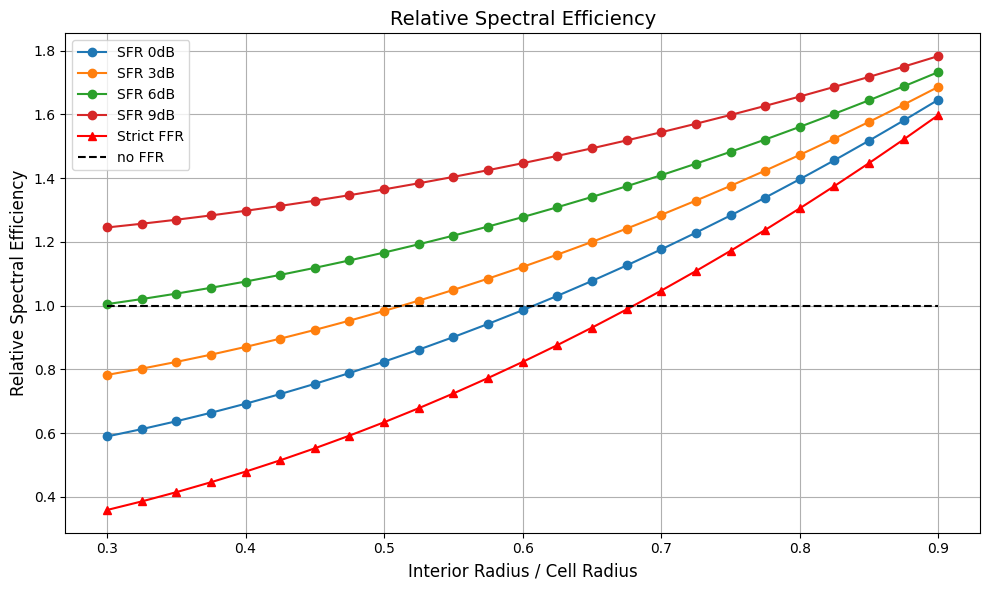

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and Parameters
interior_radius_ratios = np.linspace(0.3, 0.9, 25)  # Interior radius ratio (R_in/R_cell)
cell_radius = 1  # Cell radius (normalized to 1)
N = 3  # Reuse factor for no FFR (full reuse)

# SFR Power Ratios in dB
power_ratios_db = [0, 3, 6, 9]
power_ratios_linear = [10**(p/10) for p in power_ratios_db]

# SINR Parameters for different regions
sinr_interior = 20  # SINR in interior region (dB)
sinr_edge_sfr_base = 3  # Base SINR at cell edge for SFR 0 dB (dB)
sinr_edge_strict_ffr = -2  # Base SINR for Strict FFR (dB)
sinr_no_ffr = 10  # SINR for no FFR (dB)

# Convert SINR from dB to linear scale
sinr_interior_linear = 10**(sinr_interior/10)
sinr_edge_sfr_base_linear = 10**(sinr_edge_sfr_base/10)
sinr_edge_strict_ffr_linear = 10**(sinr_edge_strict_ffr/10)
sinr_no_ffr_linear = 10**(sinr_no_ffr/10)

# Initialize results
relative_spectral_efficiencies = {f"SFR {p}dB": [] for p in power_ratios_db}
relative_spectral_efficiencies["Strict FFR"] = []
relative_spectral_efficiencies["no FFR"] = []

# Compute Spectral Efficiency for each Interior Radius Ratio
for ratio in interior_radius_ratios:
    # Fraction of interior and edge regions
    interior_area_fraction = ratio**2
    edge_area_fraction = 1 - interior_area_fraction

    # No FFR spectral efficiency (reference)
    eta_no_ffr = interior_area_fraction * np.log2(1 + sinr_no_ffr_linear) + \
                 edge_area_fraction * np.log2(1 + sinr_no_ffr_linear)
    relative_spectral_efficiencies["no FFR"].append(1.0)  # Normalized to itself

    # Strict FFR spectral efficiency
    eta_strict_ffr = interior_area_fraction * np.log2(1 + sinr_interior_linear) + \
                     edge_area_fraction * np.log2(1 + sinr_edge_strict_ffr_linear)
    relative_spectral_efficiencies["Strict FFR"].append(eta_strict_ffr / eta_no_ffr)

    # SFR spectral efficiency for different power ratios
    for i, power_ratio in enumerate(power_ratios_linear):
        sinr_edge_sfr = sinr_edge_sfr_base_linear * power_ratio  # Boost edge SINR
        eta_sfr = interior_area_fraction * np.log2(1 + sinr_interior_linear) + \
                  edge_area_fraction * np.log2(1 + sinr_edge_sfr)
        relative_spectral_efficiencies[f"SFR {power_ratios_db[i]}dB"].append(eta_sfr / eta_no_ffr)

# Plotting the Results
plt.figure(figsize=(10, 6))

for label, efficiencies in relative_spectral_efficiencies.items():
    if label == "no FFR":
        plt.plot(interior_radius_ratios, efficiencies, label=label, linestyle="--", color="black", linewidth=1.5)
    elif "Strict FFR" in label:
        plt.plot(interior_radius_ratios, efficiencies, label=label, marker='^', linestyle='-', color="red", linewidth=1.5)
    else:
        plt.plot(interior_radius_ratios, efficiencies, label=label, marker='o', linestyle='-', linewidth=1.5)

# Customize the plot
plt.xlabel("Interior Radius / Cell Radius", fontsize=12)
plt.ylabel("Relative Spectral Efficiency", fontsize=12)
plt.title("Relative Spectral Efficiency", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


**Dr shalash**


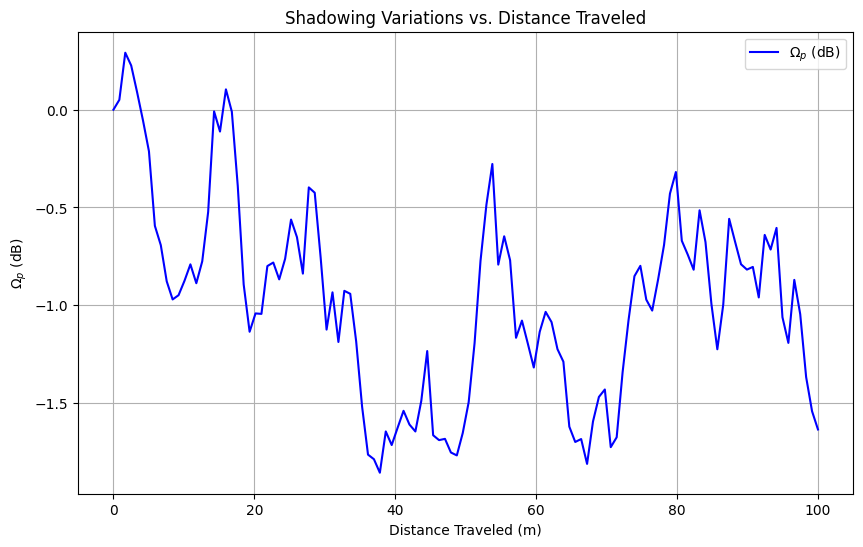

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given constants
T = 0.1  # Step size (s)
v = 8.33  # Mobile velocity (m/s)
dc = 30  # Decorrelation distance (m)
sigma_omega = 8  # Shadowing standard deviation (dB)
distance_max = 100  # Total distance (m)

# Calculate zeta
d = v * T  # Displacement per step (m)
zeta = np.exp(-d / dc)

# Simulation parameters
num_steps = int(distance_max / d)  # Number of simulation steps
omega_p = np.zeros(num_steps)  # Shadowing array
distance = np.linspace(0, distance_max, num_steps)  # Distance array

# Simulate random Gaussian variable v_k
v_k = np.random.normal(0, sigma_omega, num_steps)

# State equation iteration
for k in range(1, num_steps):
    omega_p[k] = zeta * omega_p[k - 1] + (1 - zeta) * v_k[k - 1]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(distance, omega_p, label=r"$\Omega_p$ (dB)", color="blue")
plt.title("Shadowing Variations vs. Distance Traveled")
plt.xlabel("Distance Traveled (m)")
plt.ylabel(r"$\Omega_p$ (dB)")
plt.grid(True)
plt.legend()
plt.show()


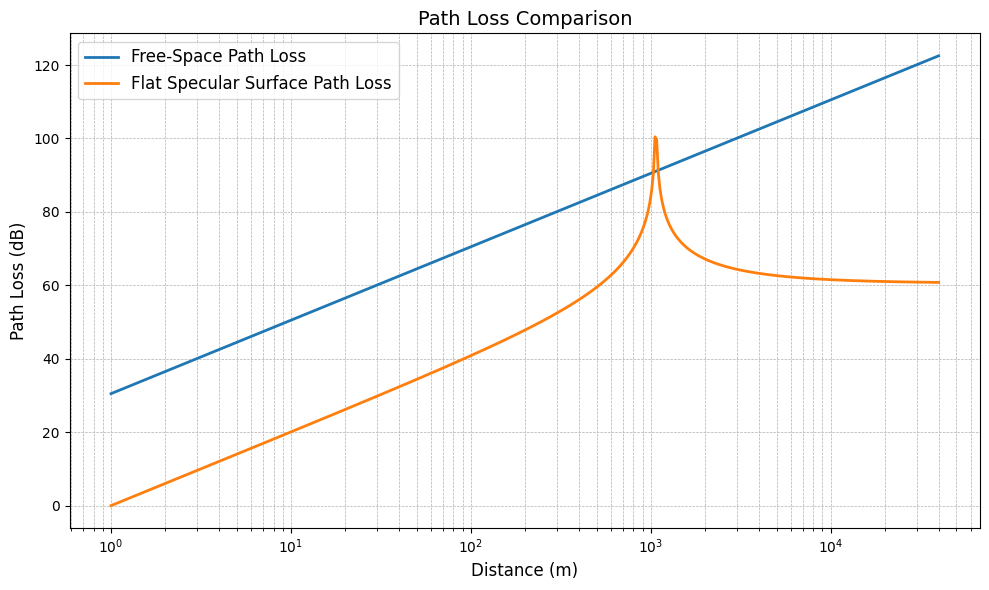

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
c = 3e8  # Speed of light (m/s)
f = 800e6  # Frequency (Hz)
ht = 10  # Transmitter height (m)
hr = 10  # Receiver height (m)
distances = np.logspace(0, 4.6, 500)  # Distances from 1m to 40km (log scale)

# Free-space path loss (FSPL)
fspl = 20 * np.log10(distances) + 20 * np.log10(f) + 20 * np.log10(4 * np.pi / c)

# Flat specular surface model path loss
critical_distance = (4 * ht * hr * f) / c
specular_loss = -20 * np.log10(np.abs(1 / distances - 1 / critical_distance))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(distances, fspl, label="Free-Space Path Loss", linewidth=2)
plt.plot(distances, specular_loss, label="Flat Specular Surface Path Loss", linewidth=2)
plt.xscale("log")
plt.xlabel("Distance (m)", fontsize=12)
plt.ylabel("Path Loss (dB)", fontsize=12)
plt.title("Path Loss Comparison", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


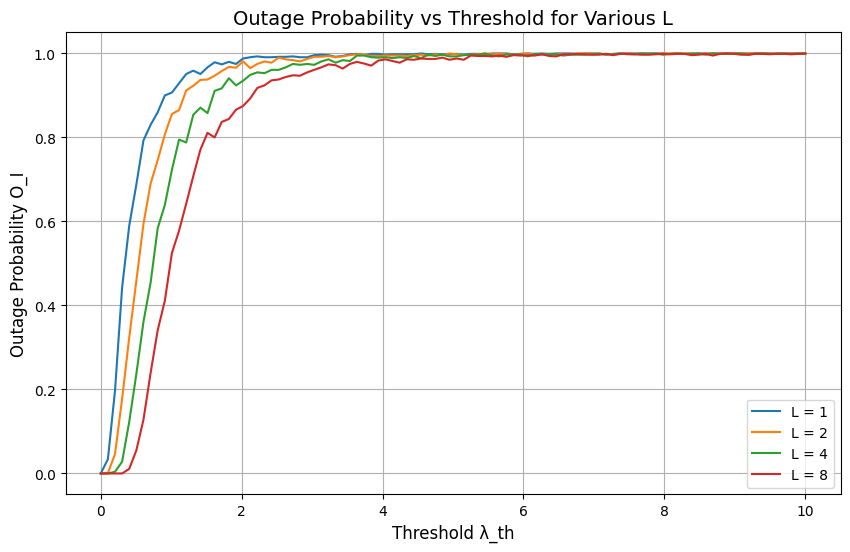

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rice, expon

# System parameters
K = 5  # Ricean K-factor
Omega_p = 1  # Average power
N_I = 3  # Number of interferers
L_values = [1, 2, 4, 8]  # Number of diversity branches
lambda_th_values = np.linspace(0, 10, 100)  # Threshold values
num_samples = 1000  # Number of Monte Carlo samples

# Function to generate Ricean fading samples
def generate_rice_samples(K, Omega_p, size):
    s = np.sqrt(Omega_p * K / (K + 1))  # Non-centrality parameter
    sigma = np.sqrt(Omega_p / (2 * (K + 1)))  # Scale parameter
    return rice.rvs(b=s/sigma, scale=sigma, size=size)

# Function to compute outage probability for a given L
def compute_outage_probability(L, lambda_th_values):
    outage_probabilities = []

    for lambda_th in lambda_th_values:
        # Monte Carlo simulation
        lambda_s_values = []
        for _ in range(num_samples):
            # Generate S_{0,i} (Ricean) for each branch
            S_0 = generate_rice_samples(K, Omega_p, L)

            # Generate S_{k,i} (Rayleigh) for each interferer and branch
            S_k = expon.rvs(scale=Omega_p, size=(N_I, L))

            # Compute \lambda_i for each branch
            lambda_i = S_0 / np.sum(S_k, axis=0)

            # Select the maximum \lambda_i (selection diversity)
            lambda_s = np.max(lambda_i)
            lambda_s_values.append(lambda_s)

        # Compute outage probability for this \lambda_th
        lambda_s_values = np.array(lambda_s_values)
        outage_probability = np.mean(lambda_s_values < lambda_th)
        outage_probabilities.append(outage_probability)

    return outage_probabilities

# Plot results
plt.figure(figsize=(10, 6))

for L in L_values:
    outage_probabilities = compute_outage_probability(L, lambda_th_values)
    plt.plot(lambda_th_values, outage_probabilities, label=f"L = {L}")

plt.xlabel("Threshold \u03bb_th", fontsize=12)
plt.ylabel("Outage Probability O_I", fontsize=12)
plt.title("Outage Probability vs Threshold for Various L", fontsize=14)
plt.legend()
plt.grid()
plt.show()


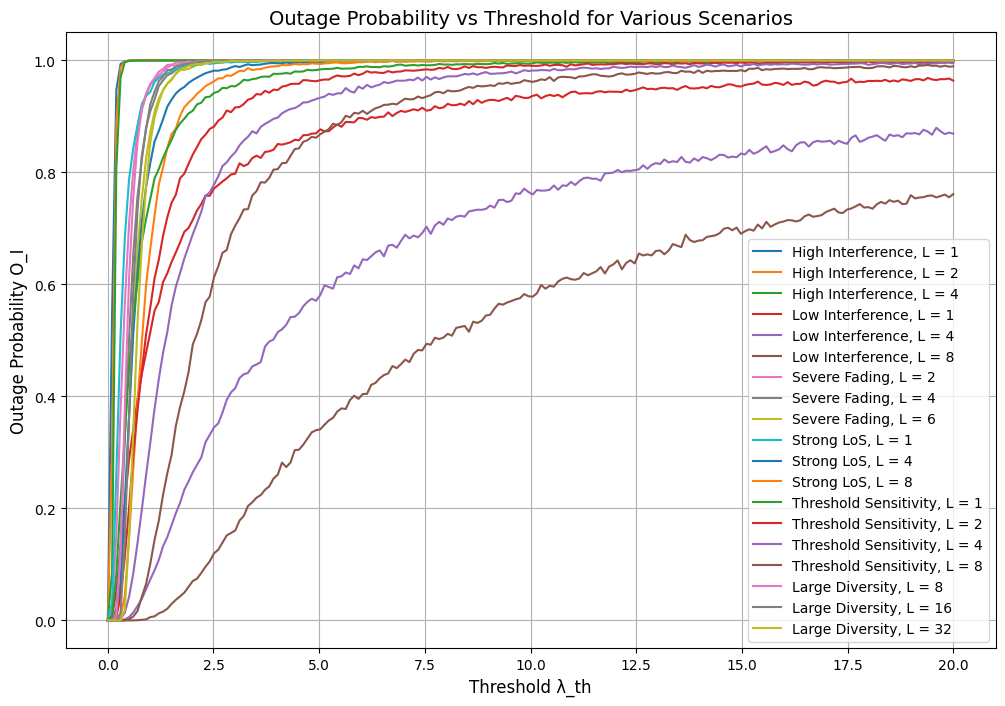

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rice, expon

# Function to generate Ricean fading samples
def generate_rice_samples(K, Omega_p, size):
    s = np.sqrt(Omega_p * K / (K + 1))  # Non-centrality parameter
    sigma = np.sqrt(Omega_p / (2 * (K + 1)))  # Scale parameter
    return rice.rvs(b=s/sigma, scale=sigma, size=size)

# Function to compute outage probability for a given L
def compute_outage_probability(K, Omega_p, N_I, L, lambda_th_values, num_samples):
    outage_probabilities = []

    for lambda_th in lambda_th_values:
        # Monte Carlo simulation
        lambda_s_values = []
        for _ in range(num_samples):
            # Generate S_{0,i} (Ricean) for each branch
            S_0 = generate_rice_samples(K, Omega_p, L)

            # Generate S_{k,i} (Rayleigh) for each interferer and branch
            S_k = expon.rvs(scale=Omega_p, size=(N_I, L))

            # Compute \lambda_i for each branch
            lambda_i = S_0 / np.sum(S_k, axis=0)

            # Select the maximum \lambda_i (selection diversity)
            lambda_s = np.max(lambda_i)
            lambda_s_values.append(lambda_s)

        # Compute outage probability for this \lambda_th
        lambda_s_values = np.array(lambda_s_values)
        outage_probability = np.mean(lambda_s_values < lambda_th)
        outage_probabilities.append(outage_probability)

    return outage_probabilities

# Scenarios
scenarios = [
    {"name": "High Interference", "K": 3, "Omega_p": 1, "N_I": 10, "L_values": [1, 2, 4]},
    {"name": "Low Interference", "K": 5, "Omega_p": 2, "N_I": 1, "L_values": [1, 4, 8]},
    {"name": "Severe Fading", "K": 0, "Omega_p": 0.5, "N_I": 5, "L_values": [2, 4, 6]},
    {"name": "Strong LoS", "K": 10, "Omega_p": 1.5, "N_I": 3, "L_values": [1, 4, 8]},
    {"name": "Threshold Sensitivity", "K": 5, "Omega_p": 1, "N_I": 2, "L_values": [1, 2, 4, 8]},
    {"name": "Large Diversity", "K": 3, "Omega_p": 1, "N_I": 5, "L_values": [8, 16, 32]},
]

lambda_th_values = np.linspace(0, 20, 200)  # Extended threshold range
num_samples = 10000  # Number of Monte Carlo samples

# Plot results for each scenario
plt.figure(figsize=(12, 8))

for scenario in scenarios:
    for L in scenario["L_values"]:
        outage_probabilities = compute_outage_probability(
            scenario["K"], scenario["Omega_p"], scenario["N_I"], L, lambda_th_values, num_samples
        )
        plt.plot(lambda_th_values, outage_probabilities, label=f"{scenario['name']}, L = {L}")

plt.xlabel("Threshold λ_th", fontsize=12)
plt.ylabel("Outage Probability O_I", fontsize=12)
plt.title("Outage Probability vs Threshold for Various Scenarios", fontsize=14)
plt.legend()
plt.grid()
plt.show()


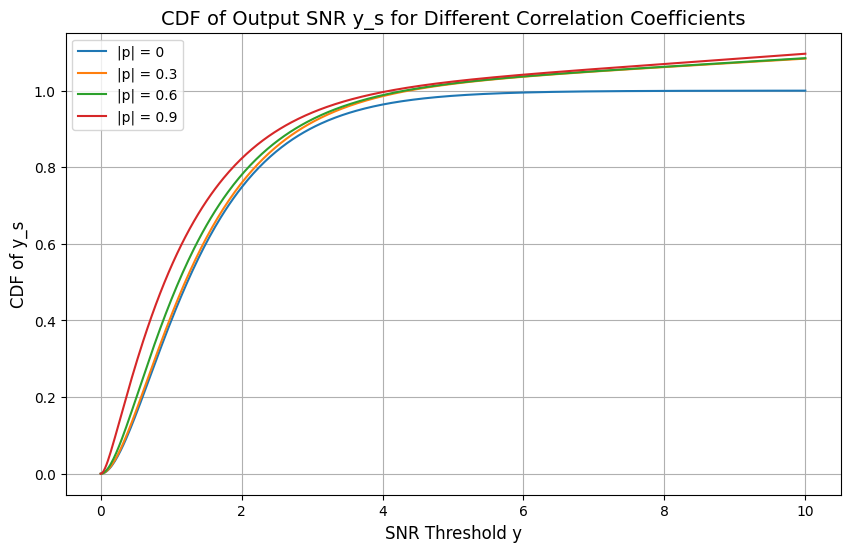

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import i0

# System parameters
gamma_c = 1  # Average SNR
p_values = [0, 0.3, 0.6, 0.9]  # Correlation coefficients
y_values = np.linspace(0, 10, 500)  # Range of SNR values

# Function to calculate the CDF of y_s = max(y1, y2) numerically
def cdf_max_snr(y, gamma_c, p):
    cdf_values = []
    for yi in y:
        # Double integral for the correlated case
        def joint_pdf(x1, x2):
            term1 = 1 / (gamma_c**2 * (1 - p**2))
            term2 = np.exp(-(x1 + x2) / (gamma_c * (1 - p**2)))
            term3 = i0(2 * p * np.sqrt(x1 * x2) / (gamma_c * (1 - p**2)))
            return term1 * term2 * term3

        # Integrate over the region 0 <= x1, x2 <= yi
        x1_vals = np.linspace(0, yi, 100)
        x2_vals = np.linspace(0, yi, 100)
        dx1 = dx2 = yi / 100

        joint_cdf = 0
        for x1 in x1_vals:
            for x2 in x2_vals:
                joint_cdf += joint_pdf(x1, x2) * dx1 * dx2

        cdf_values.append(joint_cdf)

    return np.array(cdf_values)

# Plotting the CDF for different values of p
plt.figure(figsize=(10, 6))

for p in p_values:
    if p == 0:
        # Special case: independent branches
        cdf = (1 - np.exp(-y_values / gamma_c))**2
    else:
        # General case: correlated branches
        cdf = cdf_max_snr(y_values, gamma_c, p)

    plt.plot(y_values, cdf, label=f"|p| = {p}")

plt.xlabel("SNR Threshold y", fontsize=12)
plt.ylabel("CDF of y_s", fontsize=12)
plt.title("CDF of Output SNR y_s for Different Correlation Coefficients", fontsize=14)
plt.legend()
plt.grid()
plt.show()


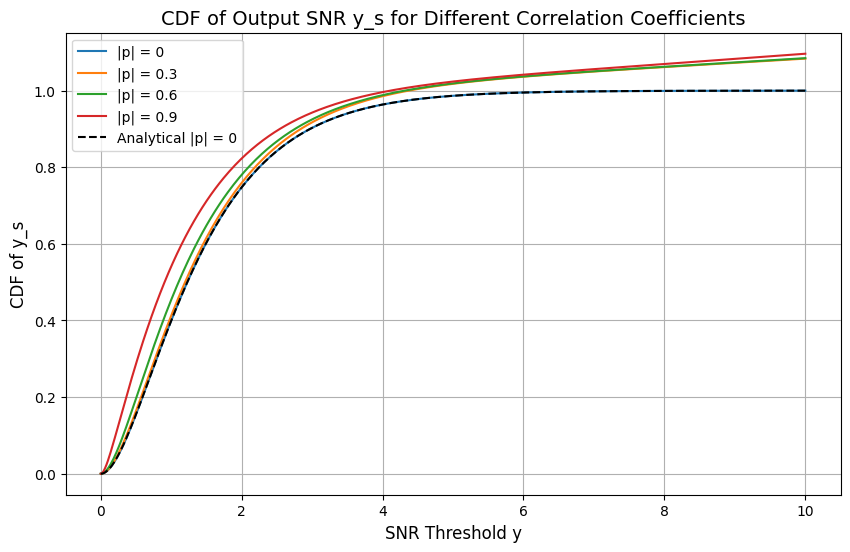

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import i0

# System parameters
gamma_c = 1  # Average SNR
p_values = [0, 0.3, 0.6, 0.9]  # Correlation coefficients
y_values = np.linspace(0, 10, 500)  # Range of SNR values

# Function to calculate the CDF of y_s = max(y1, y2) numerically
def cdf_max_snr(y, gamma_c, p):
    cdf_values = []
    for yi in y:
        # Double integral for the correlated case
        def joint_pdf(x1, x2):
            term1 = 1 / (gamma_c**2 * (1 - p**2))
            term2 = np.exp(-(x1 + x2) / (gamma_c * (1 - p**2)))
            term3 = i0(2 * p * np.sqrt(x1 * x2) / (gamma_c * (1 - p**2)))
            return term1 * term2 * term3

        # Integrate over the region 0 <= x1, x2 <= yi
        x1_vals = np.linspace(0, yi, 100)
        x2_vals = np.linspace(0, yi, 100)
        dx1 = dx2 = yi / 100

        joint_cdf = 0
        for x1 in x1_vals:
            for x2 in x2_vals:
                joint_cdf += joint_pdf(x1, x2) * dx1 * dx2

        cdf_values.append(joint_cdf)

    return np.array(cdf_values)

# Task 1: Analytical Validation
plt.figure(figsize=(10, 6))

for p in p_values:
    if p == 0:
        # Special case: independent branches
        cdf = (1 - np.exp(-y_values / gamma_c))**2
    else:
        # General case: correlated branches
        cdf = cdf_max_snr(y_values, gamma_c, p)

    plt.plot(y_values, cdf, label=f"|p| = {p}")

# Overlay the analytical CDF for p = 0
analytical_cdf = (1 - np.exp(-y_values / gamma_c))**2
plt.plot(y_values, analytical_cdf, 'k--', label="Analytical |p| = 0")

plt.xlabel("SNR Threshold y", fontsize=12)
plt.ylabel("CDF of y_s", fontsize=12)
plt.title("CDF of Output SNR y_s for Different Correlation Coefficients", fontsize=14)
plt.legend()
plt.grid()
plt.show()


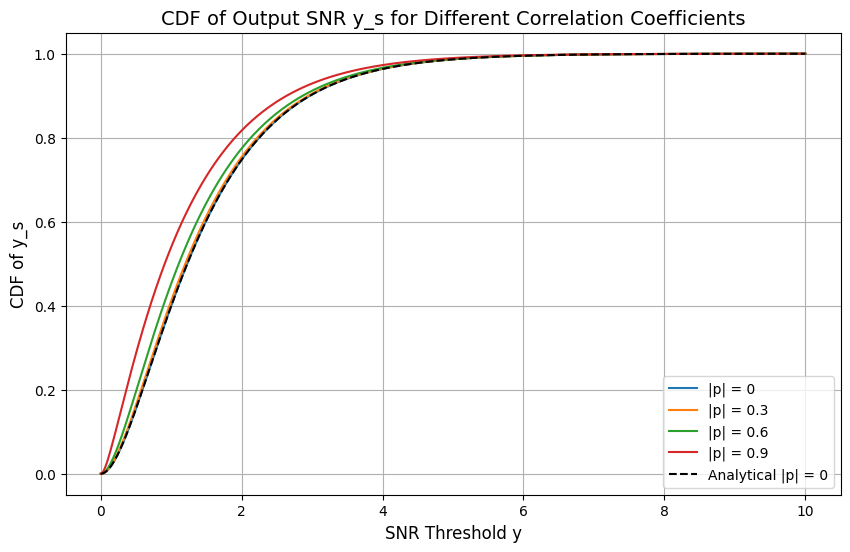

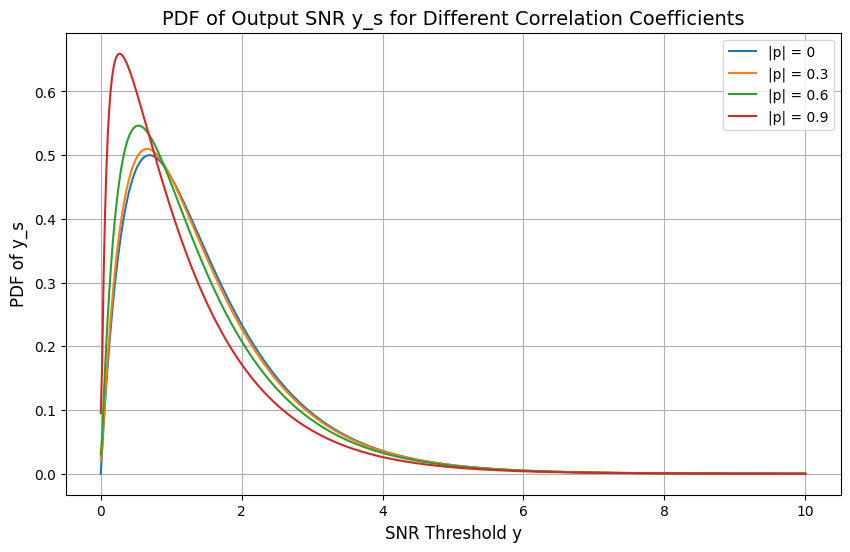

Outage Probabilities:
|p| = 0: ['P(y_s < 1) = 0.3996', 'P(y_s < 2) = 0.7476', 'P(y_s < 3) = 0.9029']
|p| = 0.3: ['P(y_s < 1) = 0.4120', 'P(y_s < 2) = 0.7542', 'P(y_s < 3) = 0.9050']
|p| = 0.6: ['P(y_s < 1) = 0.4529', 'P(y_s < 2) = 0.7745', 'P(y_s < 3) = 0.9119']
|p| = 0.9: ['P(y_s < 1) = 0.5397', 'P(y_s < 2) = 0.8171', 'P(y_s < 3) = 0.9291']

Mean SNR Values:
|p| = 0: Mean SNR = 2.0000
|p| = 0.3: Mean SNR = 1.4760
|p| = 0.6: Mean SNR = 1.3990
|p| = 0.9: Mean SNR = 1.2171


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import i0
from scipy.integrate import dblquad

# System parameters
gamma_c = 1  # Average SNR
p_values = [0, 0.3, 0.6, 0.9]  # Correlation coefficients
y_values = np.linspace(0, 10, 500)  # Range of SNR values

# Function to calculate the CDF of y_s = max(y1, y2) numerically
def cdf_max_snr(y, gamma_c, p):
    cdf_values = []
    for yi in y:
        # Double integral for the correlated case
        def joint_pdf(x1, x2):
            term1 = 1 / (gamma_c**2 * (1 - p**2))
            term2 = np.exp(-(x1 + x2) / (gamma_c * (1 - p**2)))
            term3 = i0(2 * p * np.sqrt(x1 * x2) / (gamma_c * (1 - p**2)))
            return term1 * term2 * term3

        joint_cdf, _ = dblquad(lambda x2, x1: joint_pdf(x1, x2), 0, yi, 0, yi)
        cdf_values.append(joint_cdf)

    return np.array(cdf_values)

# Function to calculate the PDF of y_s = max(y1, y2)
def pdf_max_snr(y, gamma_c, p):
    pdf_values = []
    dy = y[1] - y[0]
    cdf_values = cdf_max_snr(y, gamma_c, p)
    pdf_values = np.gradient(cdf_values, dy)
    return pdf_values

# Calculate and plot CDF for different p values
plt.figure(figsize=(10, 6))
for p in p_values:
    if p == 0:
        # Special case: independent branches
        cdf = (1 - np.exp(-y_values / gamma_c))**2
        plt.plot(y_values, cdf, label=f"|p| = {p}")
    else:
        cdf = cdf_max_snr(y_values, gamma_c, p)
        plt.plot(y_values, cdf, label=f"|p| = {p}")

# Analytical CDF for |p| = 0
cdf_analytical = (1 - np.exp(-y_values / gamma_c))**2
plt.plot(y_values, cdf_analytical, 'k--', label="Analytical |p| = 0")

plt.xlabel("SNR Threshold y", fontsize=12)
plt.ylabel("CDF of y_s", fontsize=12)
plt.title("CDF of Output SNR y_s for Different Correlation Coefficients", fontsize=14)
plt.legend()
plt.grid()
plt.show()

# Calculate and plot PDF for different p values
plt.figure(figsize=(10, 6))
for p in p_values:
    if p == 0:
        # Special case: independent branches
        pdf = (2 / gamma_c) * np.exp(-y_values / gamma_c) * (1 - np.exp(-y_values / gamma_c))
        plt.plot(y_values, pdf, label=f"|p| = {p}")
    else:
        pdf = pdf_max_snr(y_values, gamma_c, p)
        plt.plot(y_values, pdf, label=f"|p| = {p}")

plt.xlabel("SNR Threshold y", fontsize=12)
plt.ylabel("PDF of y_s", fontsize=12)
plt.title("PDF of Output SNR y_s for Different Correlation Coefficients", fontsize=14)
plt.legend()
plt.grid()
plt.show()

# Outage probability analysis
thresholds = [1, 2, 3]  # Outage thresholds
outage_probs = {p: [] for p in p_values}
for p in p_values:
    cdf = cdf_max_snr(y_values, gamma_c, p) if p != 0 else (1 - np.exp(-y_values / gamma_c))**2
    for th in thresholds:
        outage_probs[p].append(np.interp(th, y_values, cdf))

# Display outage probabilities
print("Outage Probabilities:")
for p, probs in outage_probs.items():
    print(f"|p| = {p}: {[f'P(y_s < {th}) = {prob:.4f}' for th, prob in zip(thresholds, probs)]}")

# Mean SNR analysis
mean_snr = {p: None for p in p_values}
for p in p_values:
    if p == 0:
        mean_snr[p] = 2 * gamma_c
    else:
        pdf = pdf_max_snr(y_values, gamma_c, p)
        mean_snr[p] = np.trapz(y_values * pdf, y_values)

# Display mean SNR values
print("\nMean SNR Values:")
for p, mean in mean_snr.items():
    print(f"|p| = {p}: Mean SNR = {mean:.4f}")


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


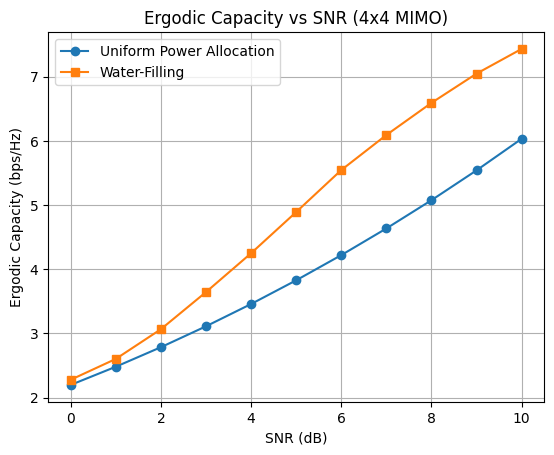

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_channel(rt, n_realizations=1000):
    """Generates channel realizations based on the correlation matrix Rt."""
    M = rt.shape[0]
    rt_sqrt = np.linalg.cholesky(rt)
    hw = (np.random.randn(n_realizations, M, M) + 1j * np.random.randn(n_realizations, M, M)) / np.sqrt(2)
    h = np.array([rt_sqrt @ hw[i] @ rt_sqrt.T.conj() for i in range(n_realizations)])
    return h

def ergodic_capacity(h, snr_db, power_allocation="uniform"):
    """Calculates ergodic capacity for different power allocation schemes."""
    n_realizations, M, _ = h.shape
    snr_linear = 10**(snr_db / 10)

    capacities = []
    for snr in snr_linear:
        if power_allocation == "uniform":
            capacities.append(np.mean([np.log2(np.linalg.det(np.eye(M) + (snr / M) * h[i] @ h[i].conj().T)) for i in range(n_realizations)]))
        elif power_allocation == "waterfilling":
            capacities.append(np.mean([np.log2(np.linalg.det(np.eye(M) + waterfilling_precoding(h[i], snr))) for i in range(n_realizations)]))
    return capacities

def waterfilling_precoding(h, snr):
    """Applies water-filling algorithm for optimal power allocation."""
    M = h.shape[0]
    eigenvalues, _ = np.linalg.eigh(h @ h.conj().T)
    eigenvalues = np.sort(eigenvalues)[::-1]  # Sort eigenvalues in descending order

    mu = waterfilling_level(eigenvalues, snr)
    power_allocation = np.maximum(mu - 1 / eigenvalues, 0)
    return np.diag(power_allocation)

def waterfilling_level(eigenvalues, total_power):
    """Finds the water-filling level for given eigenvalues and total power."""
    inverse_eig = 1 / eigenvalues
    for k in range(1, len(inverse_eig) + 1):
        mu = (total_power + np.sum(inverse_eig[:k])) / k
        if mu < inverse_eig[k - 1]:
            return mu
    return mu

def main():
    M = 4  # 4x4 system
    rt = np.array([
        [1, 0.9, 0.81, 0.729],
        [0.9, 1, 0.9, 0.81],
        [0.81, 0.9, 1, 0.9],
        [0.729, 0.81, 0.9, 1]
    ])
    snr_db = np.arange(0, 11, 1)  # SNR from 0 to 10 dB

    # Generate channel realizations
    n_realizations = 1000
    h = generate_channel(rt, n_realizations=n_realizations)

    # Calculate capacities
    uniform_capacity = ergodic_capacity(h, snr_db, power_allocation="uniform")
    wf_capacity = ergodic_capacity(h, snr_db, power_allocation="waterfilling")

    # Plot results
    plt.figure()
    plt.plot(snr_db, uniform_capacity, label="Uniform Power Allocation", marker='o')
    plt.plot(snr_db, wf_capacity, label="Water-Filling", marker='s')
    plt.xlabel("SNR (dB)")
    plt.ylabel("Ergodic Capacity (bps/Hz)")
    plt.title("Ergodic Capacity vs SNR (4x4 MIMO)")
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    main()


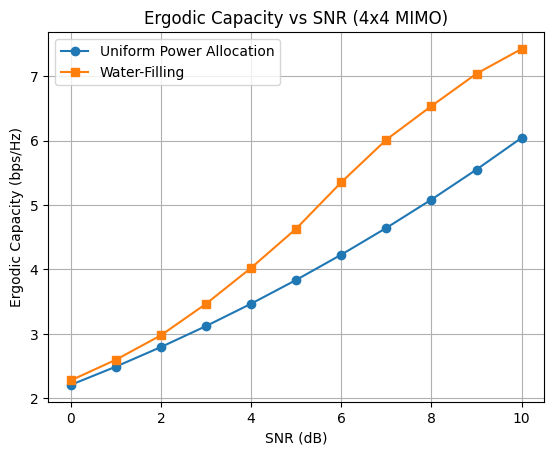

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_channel(rt, n_realizations=1000):
    """Generates channel realizations based on the correlation matrix Rt."""
    M = rt.shape[0]
    rt_sqrt = np.linalg.cholesky(rt)
    hw = (np.random.randn(n_realizations, M, M) + 1j * np.random.randn(n_realizations, M, M)) / np.sqrt(2)
    h = np.array([rt_sqrt @ hw[i] @ rt_sqrt.T.conj() for i in range(n_realizations)], dtype=complex)
    return h

def ergodic_capacity(h, snr_db, power_allocation="uniform"):
    """Calculates ergodic capacity for different power allocation schemes."""
    n_realizations, M, _ = h.shape
    snr_linear = 10**(snr_db / 10)

    capacities = []
    for snr in snr_linear:
        if power_allocation == "uniform":
            capacities.append(np.mean([np.log2(np.linalg.det(np.eye(M) + (snr / M) * h[i] @ h[i].conj().T)) for i in range(n_realizations)]))
        elif power_allocation == "waterfilling":
            capacities.append(np.mean([np.log2(np.linalg.det(np.eye(M) + waterfilling_precoding(h[i], snr))) for i in range(n_realizations)]))
    return capacities

def waterfilling_precoding(h, snr):
    """Applies water-filling algorithm for optimal power allocation."""
    M = h.shape[0]
    eigenvalues, _ = np.linalg.eigh(h @ h.conj().T)
    eigenvalues = np.sort(eigenvalues)[::-1]  # Sort eigenvalues in descending order

    mu = waterfilling_level(eigenvalues, snr)
    power_allocation = np.maximum(mu - 1 / eigenvalues, 0)
    return np.diag(power_allocation)

def waterfilling_level(eigenvalues, total_power):
    """Finds the water-filling level for given eigenvalues and total power."""
    inverse_eig = 1 / eigenvalues
    for k in range(1, len(inverse_eig) + 1):
        mu = (total_power + np.sum(inverse_eig[:k])) / k
        if mu < inverse_eig[k - 1]:
            return mu
    return mu

def main():
    M = 4  # 4x4 system
    rt = np.array([
        [1, 0.9, 0.81, 0.729],
        [0.9, 1, 0.9, 0.81],
        [0.81, 0.9, 1, 0.9],
        [0.729, 0.81, 0.9, 1]
    ])
    snr_db = np.arange(0, 11, 1)  # SNR from 0 to 10 dB

    # Generate channel realizations
    n_realizations = 1000
    h = generate_channel(rt, n_realizations=n_realizations)

    # Calculate capacities
    uniform_capacity = ergodic_capacity(h, snr_db, power_allocation="uniform")
    wf_capacity = ergodic_capacity(h, snr_db, power_allocation="waterfilling")

    # Plot results
    plt.figure()
    plt.plot(snr_db, uniform_capacity, label="Uniform Power Allocation", marker='o')
    plt.plot(snr_db, wf_capacity, label="Water-Filling", marker='s')
    plt.xlabel("SNR (dB)")
    plt.ylabel("Ergodic Capacity (bps/Hz)")
    plt.title("Ergodic Capacity vs SNR (4x4 MIMO)")
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    main()


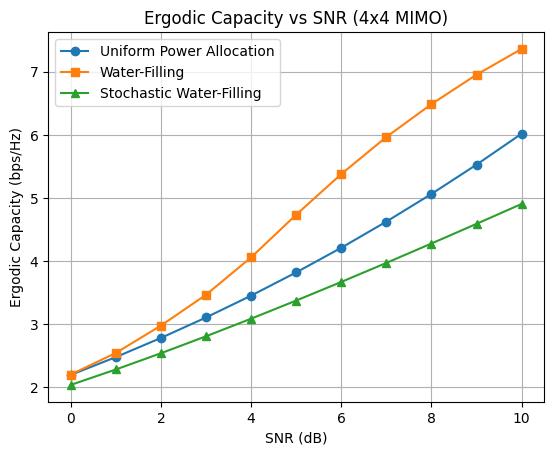

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_channel(rt, n_realizations=10000):
    """Generates channel realizations based on the correlation matrix Rt."""
    M = rt.shape[0]
    rt_sqrt = np.linalg.cholesky(rt)
    hw = (np.random.randn(n_realizations, M, M) + 1j * np.random.randn(n_realizations, M, M)) / np.sqrt(2)
    h = np.array([rt_sqrt @ hw[i] @ rt_sqrt.T.conj() for i in range(n_realizations)], dtype=complex)
    return h

def ergodic_capacity(h, snr_db, power_allocation="uniform"):
    """Calculates ergodic capacity for different power allocation schemes."""
    n_realizations, M, _ = h.shape
    snr_linear = 10**(snr_db / 10)

    capacities = []
    for snr in snr_linear:
        if power_allocation == "uniform":
            capacities.append(np.mean([np.log2(np.linalg.det(np.eye(M) + (snr / M) * h[i] @ h[i].conj().T)) for i in range(n_realizations)]))
        elif power_allocation == "waterfilling":
            capacities.append(np.mean([np.log2(np.linalg.det(np.eye(M) + waterfilling_precoding(h[i], snr))) for i in range(n_realizations)]))
        elif power_allocation == "stochastic":
            capacities.append(np.mean([np.log2(np.linalg.det(np.eye(M) + (snr / M) * approximate_channel(h[i]))) for i in range(n_realizations)]))
    return capacities

def waterfilling_precoding(h, snr):
    """Applies water-filling algorithm for optimal power allocation."""
    M = h.shape[0]
    eigenvalues, _ = np.linalg.eigh(h @ h.conj().T)
    eigenvalues = np.sort(eigenvalues)[::-1]  # Sort eigenvalues in descending order

    mu = waterfilling_level(eigenvalues, snr)
    power_allocation = np.maximum(mu - 1 / eigenvalues, 0)
    return np.diag(power_allocation)

def waterfilling_level(eigenvalues, total_power):
    """Finds the water-filling level for given eigenvalues and total power."""
    inverse_eig = 1 / eigenvalues
    for k in range(1, len(inverse_eig) + 1):
        mu = (total_power + np.sum(inverse_eig[:k])) / k
        if mu < inverse_eig[k - 1]:
            return mu
    return mu

def approximate_channel(h):
    """Simulates stochastic water-filling by approximating the channel matrix."""
    M = h.shape[0]
    eigenvalues, eigenvectors = np.linalg.eigh(h @ h.conj().T)
    dominant_eigenvalue = eigenvalues[-1]  # Use the largest eigenvalue
    approximate_h = np.sqrt(dominant_eigenvalue) * eigenvectors[:, -1][:, np.newaxis]  # Rank-1 approximation
    return approximate_h @ approximate_h.conj().T

def main():
    M = 4  # 4x4 system
    rt = np.array([
        [1, 0.9, 0.81, 0.729],
        [0.9, 1, 0.9, 0.81],
        [0.81, 0.9, 1, 0.9],
        [0.729, 0.81, 0.9, 1]
    ])
    snr_db = np.arange(0, 11, 1)  # SNR from 0 to 10 dB

    # Generate channel realizations
    n_realizations = 10000
    h = generate_channel(rt, n_realizations=n_realizations)

    # Calculate capacities
    uniform_capacity = ergodic_capacity(h, snr_db, power_allocation="uniform")
    wf_capacity = ergodic_capacity(h, snr_db, power_allocation="waterfilling")
    stochastic_capacity = ergodic_capacity(h, snr_db, power_allocation="stochastic")

    # Plot results
    plt.figure()
    plt.plot(snr_db, uniform_capacity, label="Uniform Power Allocation", marker='o')
    plt.plot(snr_db, wf_capacity, label="Water-Filling", marker='s')
    plt.plot(snr_db, stochastic_capacity, label="Stochastic Water-Filling", marker='^')
    plt.xlabel("SNR (dB)")
    plt.ylabel("Ergodic Capacity (bps/Hz)")
    plt.title("Ergodic Capacity vs SNR (4x4 MIMO)")
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    main()


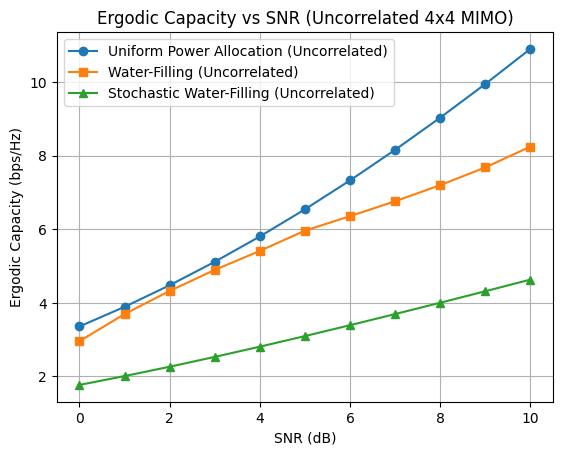

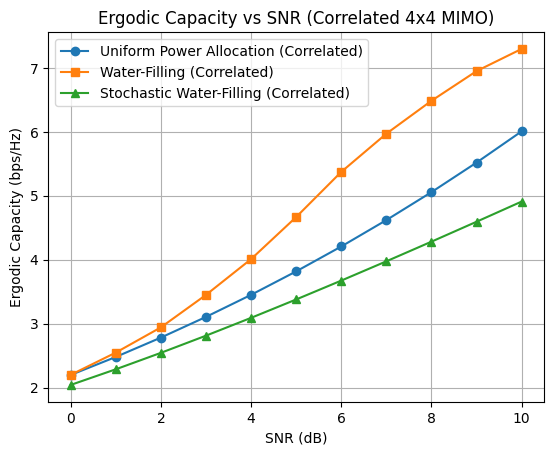

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_channel(rt, n_realizations=1000):
    """Generates channel realizations based on the correlation matrix Rt."""
    M = rt.shape[0]
    rt_sqrt = np.linalg.cholesky(rt)
    hw = (np.random.randn(n_realizations, M, M) + 1j * np.random.randn(n_realizations, M, M)) / np.sqrt(2)
    h = np.array([rt_sqrt @ hw[i] @ rt_sqrt.T.conj() for i in range(n_realizations)], dtype=complex)
    return h

def ergodic_capacity(h, snr_db, power_allocation="uniform", fairness_factor=0):
    """Calculates ergodic capacity for different power allocation schemes."""
    n_realizations, M, _ = h.shape
    snr_linear = 10**(snr_db / 10)

    capacities = []
    for snr in snr_linear:
        if power_allocation == "uniform":
            capacities.append(np.mean([np.log2(np.linalg.det(np.eye(M) + (snr / M) * h[i] @ h[i].conj().T)) for i in range(n_realizations)]))
        elif power_allocation == "waterfilling":
            capacities.append(np.mean([np.log2(np.linalg.det(np.eye(M) + waterfilling_precoding(h[i], snr))) for i in range(n_realizations)]))
        elif power_allocation == "stochastic":
            capacities.append(np.mean([np.log2(np.linalg.det(np.eye(M) + (snr / M) * approximate_channel(h[i]))) for i in range(n_realizations)]))
        elif power_allocation == "fairness":
            capacities.append(np.mean([np.log2(np.linalg.det(np.eye(M) + fairness_power_allocation(h[i], snr, fairness_factor))) for i in range(n_realizations)]))
    return capacities

def waterfilling_precoding(h, snr):
    """Applies water-filling algorithm for optimal power allocation."""
    M = h.shape[0]
    eigenvalues, _ = np.linalg.eigh(h @ h.conj().T)
    eigenvalues = np.sort(eigenvalues)[::-1]  # Sort eigenvalues in descending order

    mu = waterfilling_level(eigenvalues, snr)
    power_allocation = np.maximum(mu - 1 / eigenvalues, 0)
    return np.diag(power_allocation)

def waterfilling_level(eigenvalues, total_power):
    """Finds the water-filling level for given eigenvalues and total power."""
    inverse_eig = 1 / eigenvalues
    for k in range(1, len(inverse_eig) + 1):
        mu = (total_power + np.sum(inverse_eig[:k])) / k
        if mu < inverse_eig[k - 1]:
            return mu
    return mu

def fairness_power_allocation(h, snr, fairness_factor):
    """Fairness-constrained power allocation."""
    M = h.shape[0]
    eigenvalues, _ = np.linalg.eigh(h @ h.conj().T)
    eigenvalues = np.sort(eigenvalues)[::-1]  # Sort eigenvalues in descending order

    baseline_power = fairness_factor * snr / M
    remaining_power = snr - baseline_power * M

    mu = waterfilling_level(eigenvalues, remaining_power)
    power_allocation = np.maximum(mu - 1 / eigenvalues, 0) + baseline_power
    return np.diag(power_allocation)

def approximate_channel(h):
    """Simulates stochastic water-filling by approximating the channel matrix."""
    M = h.shape[0]
    eigenvalues, eigenvectors = np.linalg.eigh(h @ h.conj().T)
    dominant_eigenvalue = eigenvalues[-1]  # Use the largest eigenvalue
    approximate_h = np.sqrt(dominant_eigenvalue) * eigenvectors[:, -1][:, np.newaxis]  # Rank-1 approximation
    return approximate_h @ approximate_h.conj().T

def main():
    M = 4  # 4x4 system
    rt_uncorrelated = np.eye(M)  # Uncorrelated case
    rt_correlated = np.array([
        [1, 0.9, 0.81, 0.729],
        [0.9, 1, 0.9, 0.81],
        [0.81, 0.9, 1, 0.9],
        [0.729, 0.81, 0.9, 1]
    ])
    snr_db = np.arange(0, 11, 1)  # SNR from 0 to 10 dB

    # Generate channel realizations
    n_realizations = 1000
    h_uncorrelated = generate_channel(rt_uncorrelated, n_realizations=n_realizations)
    h_correlated = generate_channel(rt_correlated, n_realizations=n_realizations)

    # Calculate capacities for uncorrelated and correlated cases
    uniform_capacity_uncorrelated = ergodic_capacity(h_uncorrelated, snr_db, power_allocation="uniform")
    wf_capacity_uncorrelated = ergodic_capacity(h_uncorrelated, snr_db, power_allocation="waterfilling")
    stochastic_capacity_uncorrelated = ergodic_capacity(h_uncorrelated, snr_db, power_allocation="stochastic")

    uniform_capacity_correlated = ergodic_capacity(h_correlated, snr_db, power_allocation="uniform")
    wf_capacity_correlated = ergodic_capacity(h_correlated, snr_db, power_allocation="waterfilling")
    stochastic_capacity_correlated = ergodic_capacity(h_correlated, snr_db, power_allocation="stochastic")

    # Plot results for uncorrelated case
    plt.figure()
    plt.plot(snr_db, uniform_capacity_uncorrelated, label="Uniform Power Allocation (Uncorrelated)", marker='o')
    plt.plot(snr_db, wf_capacity_uncorrelated, label="Water-Filling (Uncorrelated)", marker='s')
    plt.plot(snr_db, stochastic_capacity_uncorrelated, label="Stochastic Water-Filling (Uncorrelated)", marker='^')
    plt.xlabel("SNR (dB)")
    plt.ylabel("Ergodic Capacity (bps/Hz)")
    plt.title("Ergodic Capacity vs SNR (Uncorrelated 4x4 MIMO)")
    plt.legend()
    plt.grid()
    plt.show()

    # Plot results for correlated case
    plt.figure()
    plt.plot(snr_db, uniform_capacity_correlated, label="Uniform Power Allocation (Correlated)", marker='o')
    plt.plot(snr_db, wf_capacity_correlated, label="Water-Filling (Correlated)", marker='s')
    plt.plot(snr_db, stochastic_capacity_correlated, label="Stochastic Water-Filling (Correlated)", marker='^')
    plt.xlabel("SNR (dB)")
    plt.ylabel("Ergodic Capacity (bps/Hz)")
    plt.title("Ergodic Capacity vs SNR (Correlated 4x4 MIMO)")
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    main()


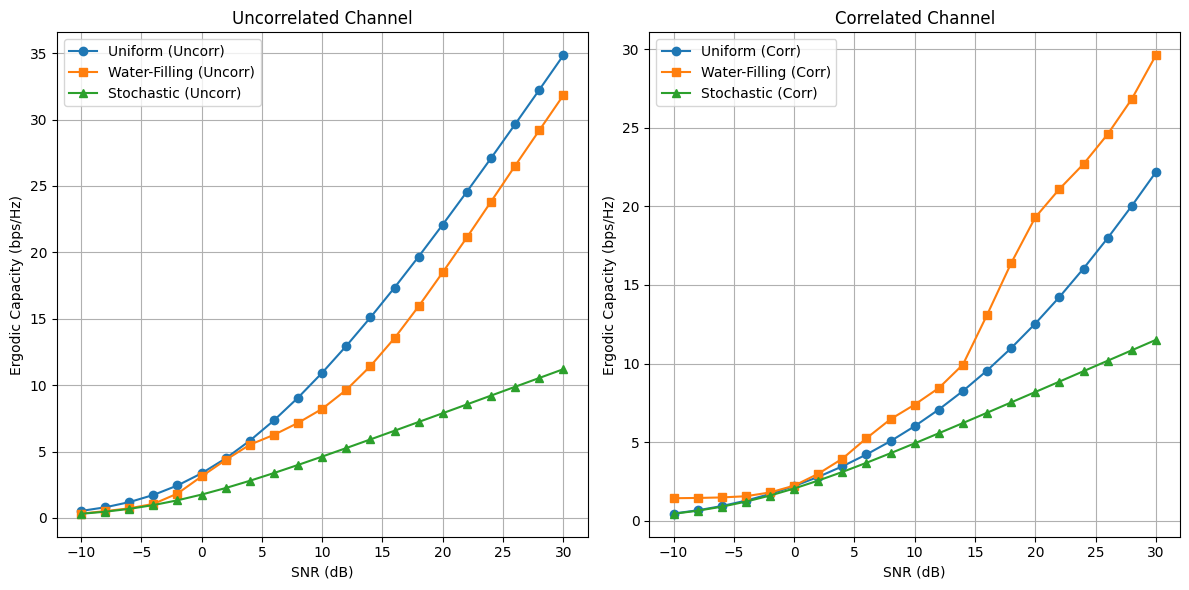

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Helper functions

def generate_channel(rt, n_realizations=1000):
    """Generates channel realizations based on the correlation matrix Rt."""
    M = rt.shape[0]
    rt_sqrt = np.linalg.cholesky(rt)
    hw = (np.random.randn(n_realizations, M, M) + 1j * np.random.randn(n_realizations, M, M)) / np.sqrt(2)
    h = np.array([rt_sqrt @ hw[i] @ rt_sqrt.T.conj() for i in range(n_realizations)], dtype=complex)
    return h

def waterfilling_precoding(h, snr):
    """Applies water-filling algorithm for optimal power allocation."""
    M = h.shape[0]
    eigenvalues, _ = np.linalg.eigh(h @ h.conj().T)
    eigenvalues = np.sort(eigenvalues)[::-1]  # Sort eigenvalues in descending order

    mu = waterfilling_level(eigenvalues, snr)
    power_allocation = np.maximum(mu - 1 / eigenvalues, 0)
    return np.diag(power_allocation)

def waterfilling_level(eigenvalues, total_power):
    """Finds the water-filling level for given eigenvalues and total power."""
    inverse_eig = 1 / eigenvalues
    for k in range(1, len(inverse_eig) + 1):
        mu = (total_power + np.sum(inverse_eig[:k])) / k
        if mu < inverse_eig[k - 1]:
            return mu
    return mu

def approximate_channel(h):
    """Simulates stochastic water-filling by approximating the channel matrix."""
    M = h.shape[0]
    eigenvalues, eigenvectors = np.linalg.eigh(h @ h.conj().T)
    dominant_eigenvalue = eigenvalues[-1]  # Use the largest eigenvalue
    approximate_h = np.sqrt(dominant_eigenvalue) * eigenvectors[:, -1][:, np.newaxis]  # Rank-1 approximation
    return approximate_h @ approximate_h.conj().T

def ergodic_capacity(h, snr_db, power_allocation="uniform"):
    """Calculates ergodic capacity for different power allocation schemes."""
    n_realizations, M, _ = h.shape
    snr_linear = 10**(snr_db / 10)

    capacities = []
    for snr in snr_linear:
        if power_allocation == "uniform":
            capacities.append(np.mean([np.log2(np.linalg.det(np.eye(M) + (snr / M) * h[i] @ h[i].conj().T)) for i in range(n_realizations)]))
        elif power_allocation == "waterfilling":
            capacities.append(np.mean([np.log2(np.linalg.det(np.eye(M) + waterfilling_precoding(h[i], snr))) for i in range(n_realizations)]))
        elif power_allocation == "stochastic":
            capacities.append(np.mean([np.log2(np.linalg.det(np.eye(M) + (snr / M) * approximate_channel(h[i]))) for i in range(n_realizations)]))
    return capacities

# Main function

def main():
    # System parameters
    snr_db = np.arange(-10, 31, 2)  # SNR from -10 to 30 dB
    n_realizations = 1000

    # Case 1: Uncorrelated channel
    M = 4  # 4x4 system
    rt_uncorrelated = np.eye(M)
    h_uncorrelated = generate_channel(rt_uncorrelated, n_realizations=n_realizations)

    # Case 2: Correlated channel
    rt_correlated = np.array([
        [1, 0.9, 0.81, 0.729],
        [0.9, 1, 0.9, 0.81],
        [0.81, 0.9, 1, 0.9],
        [0.729, 0.81, 0.9, 1]
    ])
    h_correlated = generate_channel(rt_correlated, n_realizations=n_realizations)

    # Calculate capacities for uncorrelated and correlated cases
    uniform_uncorrelated = ergodic_capacity(h_uncorrelated, snr_db, power_allocation="uniform")
    wf_uncorrelated = ergodic_capacity(h_uncorrelated, snr_db, power_allocation="waterfilling")
    stochastic_uncorrelated = ergodic_capacity(h_uncorrelated, snr_db, power_allocation="stochastic")

    uniform_correlated = ergodic_capacity(h_correlated, snr_db, power_allocation="uniform")
    wf_correlated = ergodic_capacity(h_correlated, snr_db, power_allocation="waterfilling")
    stochastic_correlated = ergodic_capacity(h_correlated, snr_db, power_allocation="stochastic")

    # Plot results
    plt.figure(figsize=(12, 6))

    # Uncorrelated channel
    plt.subplot(1, 2, 1)
    plt.plot(snr_db, uniform_uncorrelated, label="Uniform (Uncorr)", marker='o')
    plt.plot(snr_db, wf_uncorrelated, label="Water-Filling (Uncorr)", marker='s')
    plt.plot(snr_db, stochastic_uncorrelated, label="Stochastic (Uncorr)", marker='^')
    plt.title("Uncorrelated Channel")
    plt.xlabel("SNR (dB)")
    plt.ylabel("Ergodic Capacity (bps/Hz)")
    plt.legend()
    plt.grid()

    # Correlated channel
    plt.subplot(1, 2, 2)
    plt.plot(snr_db, uniform_correlated, label="Uniform (Corr)", marker='o')
    plt.plot(snr_db, wf_correlated, label="Water-Filling (Corr)", marker='s')
    plt.plot(snr_db, stochastic_correlated, label="Stochastic (Corr)", marker='^')
    plt.title("Correlated Channel")
    plt.xlabel("SNR (dB)")
    plt.ylabel("Ergodic Capacity (bps/Hz)")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


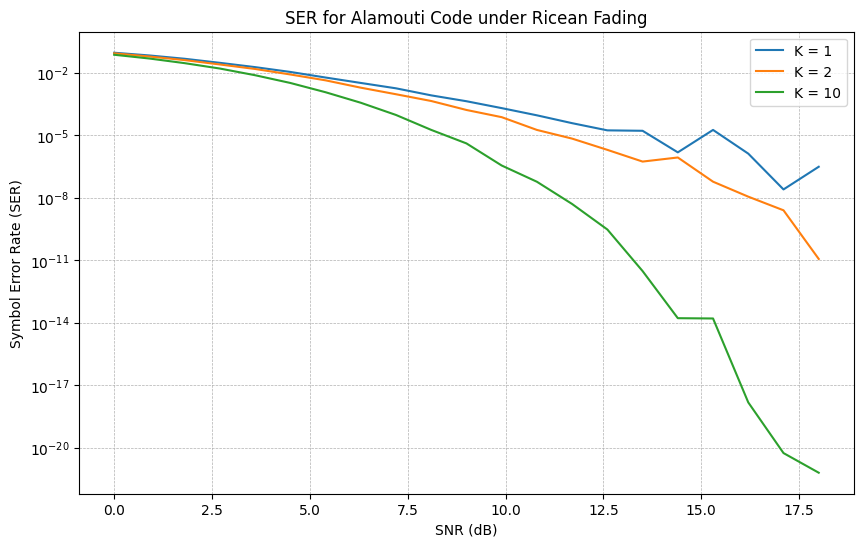

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_ricean_channel(K, M_T, M_R):
    """
    Generate a Ricean fading channel matrix H.

    Parameters:
    K -- Ricean factor
    M_T -- Number of transmit antennas
    M_R -- Number of receive antennas

    Returns:
    H -- Ricean fading channel matrix
    """
    H_LoS = np.ones((M_R, M_T))  # LoS component
    H_NLoS = (1/np.sqrt(2)) * (np.random.randn(M_R, M_T) + 1j * np.random.randn(M_R, M_T))

    H = np.sqrt(K / (1 + K)) * H_LoS + np.sqrt(1 / (1 + K)) * H_NLoS
    return H

def alamouti_ser(snr_db, K_values, M_T=2, M_R=2, mod_order=4):
    """
    Simulate SER for Alamouti coding under Ricean fading.

    Parameters:
    snr_db -- Array of SNR values in dB
    K_values -- List of Ricean K factors to simulate
    M_T -- Number of transmit antennas
    M_R -- Number of receive antennas
    mod_order -- Modulation order (e.g., 4 for QPSK)

    Returns:
    ser_results -- SER values for each K factor
    """
    snr_linear = 10 ** (snr_db / 10)  # Convert SNR from dB to linear scale
    ser_results = []

    d_min_squared = 2  # Minimum distance for QPSK

    for K in K_values:
        ser = []
        for snr in snr_linear:
            errors = 0
            trials = 10000  # Number of channel realizations

            for _ in range(trials):
                # Generate Ricean fading channel
                H = generate_ricean_channel(K, M_T, M_R)

                # Compute effective channel gain for Alamouti coding
                gain = np.linalg.norm(H)**2 / M_T

                # Compute SER for QPSK (simplified)
                pe = 0.5 * np.exp(-snr * d_min_squared * gain / 2)
                errors += pe

            ser.append(errors / trials)
        ser_results.append(ser)

    return ser_results

# Parameters
snr_db = np.linspace(0, 18, 21)  # SNR range in dB
K_values = [1, 2, 10]  # Ricean factors (including Rayleigh, K=0)

# Simulate SER for Alamouti under different Ricean factors
ser_results = alamouti_ser(snr_db, K_values)

# Plot the results
plt.figure(figsize=(10, 6))
for i, K in enumerate(K_values):
    plt.semilogy(snr_db, ser_results[i], label=f"K = {K}")

plt.title("SER for Alamouti Code under Ricean Fading")
plt.xlabel("SNR (dB)")
plt.ylabel("Symbol Error Rate (SER)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()


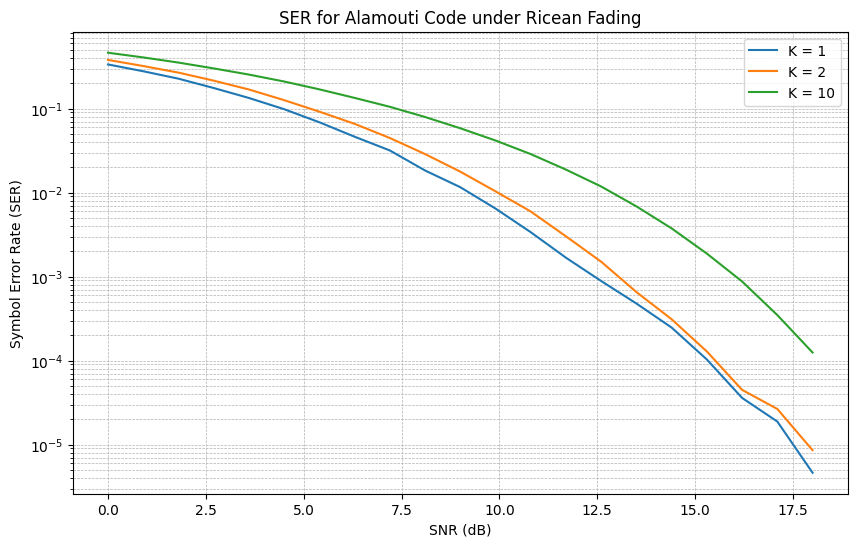

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def generate_ricean_channel(K, M_T, M_R):
    """
    Generate a Ricean fading channel matrix H.

    Parameters:
    K -- Ricean factor
    M_T -- Number of transmit antennas
    M_R -- Number of receive antennas

    Returns:
    H -- Ricean fading channel matrix
    """
    H_LoS = np.ones((M_R, M_T))  # LoS component
    H_NLoS = (1/np.sqrt(2)) * (np.random.randn(M_R, M_T) + 1j * np.random.randn(M_R, M_T))

    H = np.sqrt(K / (1 + K)) * H_LoS + np.sqrt(1 / (1 + K)) * H_NLoS
    return H

def compute_eigenvalues(H):
    """
    Compute eigenvalues of the covariance matrix R = E{vec(H) vec(H)^H}.

    Parameters:
    H -- Channel matrix

    Returns:
    eigenvalues -- Eigenvalues of the covariance matrix R
    """
    R = np.outer(H.flatten(), H.flatten().conj())
    eigenvalues, _ = np.linalg.eigh(R)
    return eigenvalues

def alamouti_ser(snr_db, K_values, M_T=2, M_R=2, d_min_squared=2):
    """
    Simulate SER for Alamouti coding under Ricean fading using the extracted equations.

    Parameters:
    snr_db -- Array of SNR values in dB
    K_values -- List of Ricean K factors to simulate
    M_T -- Number of transmit antennas
    M_R -- Number of receive antennas
    d_min_squared -- Minimum distance for QPSK (default is 2)

    Returns:
    ser_results -- SER values for each K factor
    """
    snr_linear = 10 ** (snr_db / 10)  # Convert SNR from dB to linear scale
    ser_results = []

    for K in K_values:
        ser = []
        for snr in snr_linear:
            errors = 0
            trials = 10000  # Number of channel realizations

            for _ in range(trials):
                # Generate Ricean fading channel
                H = generate_ricean_channel(K, M_T, M_R)

                # Compute eigenvalues of the covariance matrix
                eigenvalues = compute_eigenvalues(H)

                # Compute SER upper bound (corrected computation)
                product_term = np.prod([1 + (snr * d_min_squared / 8) * lam for lam in eigenvalues])
                frobenius_norm = np.linalg.norm(H)**2
                pe = (1 / product_term) * np.exp(-snr * d_min_squared * frobenius_norm / (8 * (1 + K)))
                errors += pe

            ser.append(errors / trials)
        ser_results.append(ser)

    return ser_results

# Parameters
snr_db = np.linspace(0, 18, 21)  # SNR range in dB
K_values = [1, 2, 10]  # Ricean factors

# Simulate SER for Alamouti under different Ricean factors
ser_results = alamouti_ser(snr_db, K_values)

# Plot the results
plt.figure(figsize=(10, 6))
for i, K in enumerate(K_values):
    plt.semilogy(snr_db, ser_results[i], label=f"K = {K}")

plt.title("SER for Alamouti Code under Ricean Fading")
plt.xlabel("SNR (dB)")
plt.ylabel("Symbol Error Rate (SER)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()


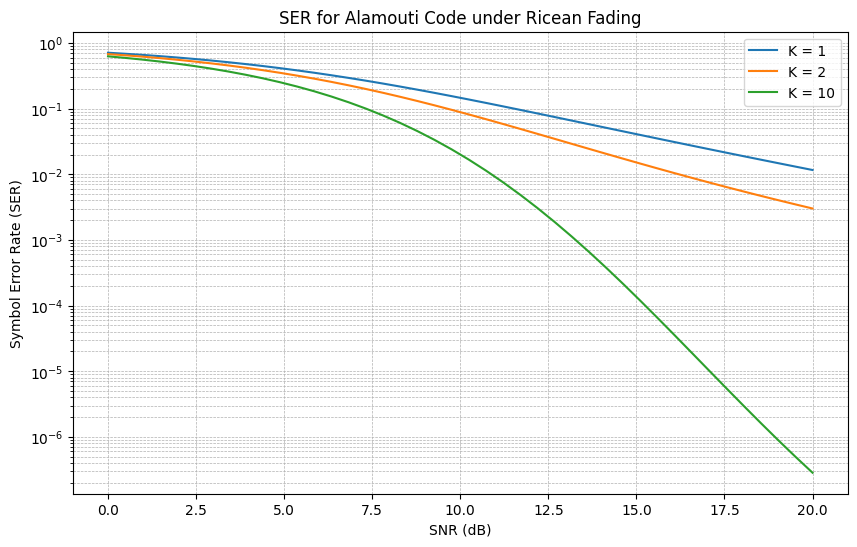

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def generate_ricean_channel(K, M_T, M_R):
    """
    Generate a Ricean fading channel matrix H.

    Parameters:
    K -- Ricean factor
    M_T -- Number of transmit antennas
    M_R -- Number of receive antennas

    Returns:
    H -- Ricean fading channel matrix
    """
    H_LoS = np.ones((M_R, M_T))  # LoS component
    H_NLoS = (1/np.sqrt(2)) * (np.random.randn(M_R, M_T) + 1j * np.random.randn(M_R, M_T))

    H = np.sqrt(K / (1 + K)) * H_LoS + np.sqrt(1 / (1 + K)) * H_NLoS
    return H

def ricean_ser_formula(snr, K, d_min_squared, H_norm_F):
    """
    Compute SER for Ricean fading using the extracted formula.

    Parameters:
    snr -- Linear SNR value
    K -- Ricean factor
    d_min_squared -- Minimum Euclidean distance squared
    H_norm_F -- Frobenius norm of the LoS component of the channel

    Returns:
    ser -- Symbol Error Rate (SER)
    """
    term1 = (1 + K) / (1 + K + (snr * d_min_squared / 8))
    term2 = np.exp(-snr * d_min_squared * K * H_norm_F**2 / (8 * (1 + K + snr * d_min_squared / 8)))
    return term1 * term2

def alamouti_ser(snr_db, K_values, M_T=2, M_R=2):
    """
    Simulate SER for Alamouti coding under Ricean fading.

    Parameters:
    snr_db -- Array of SNR values in dB
    K_values -- List of Ricean K factors to simulate
    M_T -- Number of transmit antennas
    M_R -- Number of receive antennas

    Returns:
    ser_results -- SER values for each K factor
    """
    snr_linear = 10 ** (snr_db / 10)  # Convert SNR from dB to linear scale
    ser_results = []
    d_min_squared = 2  # Minimum Euclidean distance squared for QPSK

    for K in K_values:
        ser = []
        for snr in snr_linear:
            H_norm_F = np.sqrt(M_R)  # Frobenius norm of the LoS component (assumed constant for simplicity)
            avg_ser = ricean_ser_formula(snr, K, d_min_squared, H_norm_F)
            ser.append(avg_ser)
        ser_results.append(ser)

    return ser_results

# Parameters
snr_db = np.linspace(0, 20, 42)  # SNR range in dB
K_values = [1, 2, 10]  # Ricean factors

# Simulate SER for Alamouti under different Ricean factors
ser_results = alamouti_ser(snr_db, K_values)

# Plot the results
plt.figure(figsize=(10, 6))
for i, K in enumerate(K_values):
    plt.semilogy(snr_db, ser_results[i], label=f"K = {K}")

plt.title("SER for Alamouti Code under Ricean Fading")
plt.xlabel("SNR (dB)")
plt.ylabel("Symbol Error Rate (SER)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()


In [17]:
pip install erfc

  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=25dbabd0fac70d51bc3f4b753a7c2fb0db9a9bd7dac9c8d8b8a2e67470e31c02
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc  # Ensure this is included for erfc usage


def generate_ricean_channel(K, M_T, M_R):
    """
    Generate a Ricean fading channel matrix H.

    Parameters:
    K -- Ricean factor
    M_T -- Number of transmit antennas
    M_R -- Number of receive antennas

    Returns:
    H -- Ricean fading channel matrix
    """
    H_LoS = np.ones((M_R, M_T))  # LoS component
    H_NLoS = (1/np.sqrt(2)) * (np.random.randn(M_R, M_T) + 1j * np.random.randn(M_R, M_T))

    H = np.sqrt(K / (1 + K)) * H_LoS + np.sqrt(1 / (1 + K)) * H_NLoS
    return H

def qam_minimum_distance(mod_order):
    """
    Calculate the minimum distance for square QAM modulation.

    Parameters:
    mod_order -- Modulation order (e.g., 4 for QPSK, 16 for 16-QAM)

    Returns:
    d_min_squared -- Minimum distance squared
    """
    m = int(np.sqrt(mod_order))
    d_min_squared = 6 / (mod_order - 1)  # Normalized average energy
    return d_min_squared

def theoretical_ser_qam(snr_linear, mod_order):
    """
    Calculate the theoretical SER for square QAM.

    Parameters:
    snr_linear -- SNR in linear scale
    mod_order -- Modulation order

    Returns:
    ser -- Theoretical SER values
    """
    k = int(np.sqrt(mod_order))
    q_func = lambda x: 0.5 * np.erfc(x / np.sqrt(2))
    ser = 4 * (1 - 1 / k) * q_func(np.sqrt(3 * snr_linear / (mod_order - 1))) - \
          4 * ((1 - 1 / k) ** 2) * (q_func(np.sqrt(3 * snr_linear / (mod_order - 1)))) ** 2
    return ser

def alamouti_ser(snr_db, K, mod_orders, M_T=2, M_R=2):
    """
    Simulate SER for Alamouti coding under Ricean fading.

    Parameters:
    snr_db -- Array of SNR values in dB
    K -- Ricean K factor to simulate
    mod_orders -- List of modulation orders (e.g., [4, 16, 64])
    M_T -- Number of transmit antennas
    M_R -- Number of receive antennas

    Returns:
    ser_results -- SER values for each modulation order
    theoretical_results -- Theoretical SER values for each modulation order
    """
    snr_linear = 10 ** (snr_db / 10)  # Convert SNR from dB to linear scale
    ser_results = {}
    theoretical_results = {}

    for mod_order in mod_orders:
        ser = []
        theoretical_ser = theoretical_ser_qam(snr_linear, mod_order)
        d_min_squared = qam_minimum_distance(mod_order)

        for snr in snr_linear:
            errors = 0
            trials = 10000  # Number of channel realizations

            for _ in range(trials):
                # Generate Ricean fading channel
                H = generate_ricean_channel(K, M_T, M_R)

                # Compute effective channel gain for Alamouti coding
                gain = np.linalg.norm(H)**2 / M_T

                # Compute SER for QAM
                pe = 0.5 * np.exp(-snr * d_min_squared * gain / 2)
                errors += pe

            ser.append(errors / trials)

        ser_results[mod_order] = ser
        theoretical_results[mod_order] = theoretical_ser

    return ser_results, theoretical_results

# Parameters
snr_db = np.linspace(0, 18, 21)  # SNR range in dB
K = 5  # Fixed Ricean factor
mod_orders = [4, 16, 64]  # Modulation orders (QPSK, 16-QAM, 64-QAM)

# Simulate SER for Alamouti under different modulation orders
ser_results, theoretical_results = alamouti_ser(snr_db, K, mod_orders)

# Plot the results
plt.figure(figsize=(10, 6))
for mod_order in mod_orders:
    plt.semilogy(snr_db, ser_results[mod_order], label=f"K = {K}, Mod = {mod_order}-QAM")
    plt.semilogy(snr_db, theoretical_results[mod_order], linestyle='--', label=f"Theoretical Mod = {mod_order}-QAM")

plt.title("SER for Alamouti Code under Ricean Fading with Multiple Modulations")
plt.xlabel("SNR (dB)")
plt.ylabel("Symbol Error Rate (SER)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()


AttributeError: module 'numpy' has no attribute 'erfc'

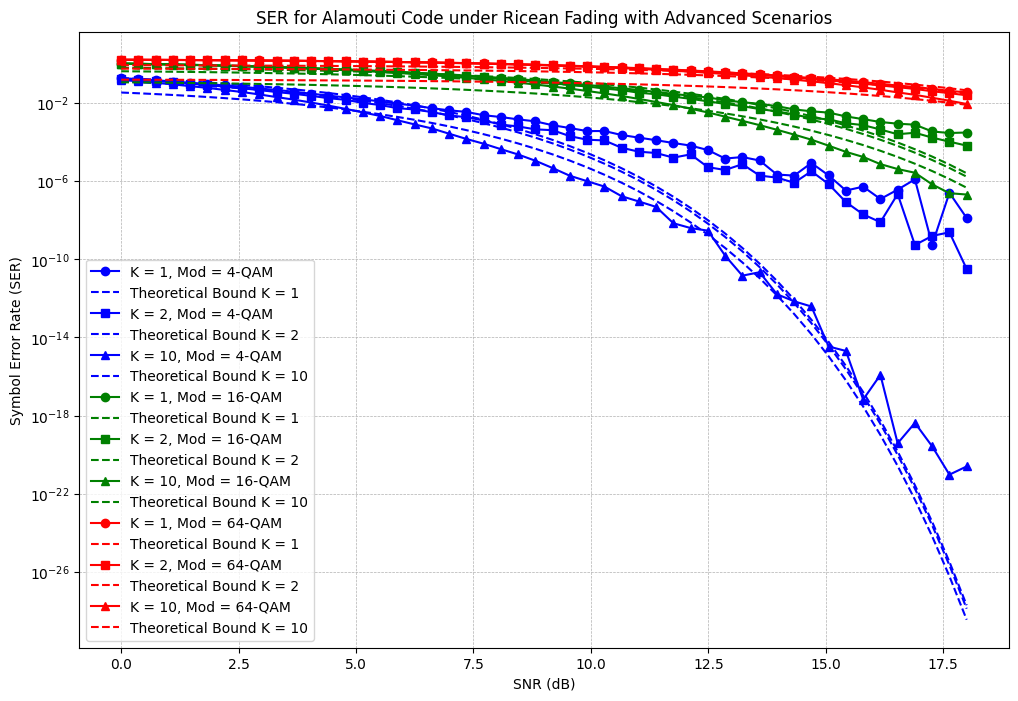

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def generate_ricean_channel(K, M_T, M_R):
    """
    Generate a Ricean fading channel matrix H.

    Parameters:
    K -- Ricean factor
    M_T -- Number of transmit antennas
    M_R -- Number of receive antennas

    Returns:
    H -- Ricean fading channel matrix
    """
    H_LoS = np.ones((M_R, M_T))  # LoS component
    H_NLoS = (1/np.sqrt(2)) * (np.random.randn(M_R, M_T) + 1j * np.random.randn(M_R, M_T))

    H = np.sqrt(K / (1 + K)) * H_LoS + np.sqrt(1 / (1 + K)) * H_NLoS
    return H

def ser_qam(snr, mod_order):
    """
    Calculate SER for square QAM modulation.

    Parameters:
    snr -- Signal-to-noise ratio (linear scale)
    mod_order -- Modulation order (e.g., 4 for QPSK, 16 for 16-QAM)

    Returns:
    ser -- Symbol error rate
    """
    k = np.log2(mod_order)
    m = int(np.sqrt(mod_order))  # Assume square QAM
    d_min_squared = 6 / (mod_order - 1)  # Minimum distance for square QAM

    return 4 * (1 - 1/m) * 0.5 * np.exp(-snr * d_min_squared / 2)

def alamouti_ser(snr_db, K_values, mod_orders, M_T=2, M_R=2):
    """
    Simulate SER for Alamouti coding under Ricean fading.

    Parameters:
    snr_db -- Array of SNR values in dB
    K_values -- List of Ricean K factors to simulate
    mod_orders -- List of modulation orders (e.g., [4, 16, 64])
    M_T -- Number of transmit antennas
    M_R -- Number of receive antennas

    Returns:
    ser_results -- SER values for each K factor and modulation order
    theoretical_bounds -- Theoretical SER bounds for each K factor
    """
    snr_linear = 10 ** (snr_db / 10)  # Convert SNR from dB to linear scale
    ser_results = {mod: [] for mod in mod_orders}
    theoretical_bounds = {mod: [] for mod in mod_orders}

    for mod_order in mod_orders:
        for K in K_values:
            ser = []
            theoretical_ser = []
            for snr in snr_linear:
                errors = 0
                trials = 10000  # Number of channel realizations

                for _ in range(trials):
                    # Generate Ricean fading channel
                    H = generate_ricean_channel(K, M_T, M_R)

                    # Compute effective channel gain for Alamouti coding
                    gain = np.linalg.norm(H)**2 / M_T

                    # Compute SER for the given modulation order
                    pe = ser_qam(snr * gain, mod_order)
                    errors += pe

                ser.append(errors / trials)

                # Theoretical bound (simplified for demonstration)
                theoretical_pe = ser_qam(snr, mod_order) / (1 + K)
                theoretical_ser.append(theoretical_pe)

            ser_results[mod_order].append(ser)
            theoretical_bounds[mod_order].append(theoretical_ser)

    return ser_results, theoretical_bounds

# Parameters
snr_db = np.linspace(0, 18, 50)  # SNR range in dB
K_values = [1, 2, 10]  # Ricean factors
mod_orders = [4, 16, 64]  # Modulation orders (QPSK, 16-QAM, 64-QAM)

# Simulate SER for Alamouti under different scenarios
ser_results, theoretical_bounds = alamouti_ser(snr_db, K_values, mod_orders)

# Plot the results
plt.figure(figsize=(12, 8))
colors = ["b", "g", "r"]
markers = ["o", "s", "^"]

for i, mod_order in enumerate(mod_orders):
    for j, K in enumerate(K_values):
        plt.semilogy(
            snr_db, ser_results[mod_order][j],
            label=f"K = {K}, Mod = {mod_order}-QAM",
            color=colors[i], linestyle="-", marker=markers[j]
        )

        plt.semilogy(
            snr_db, theoretical_bounds[mod_order][j],
            label=f"Theoretical Bound K = {K}",
            color=colors[i], linestyle="--"
        )

plt.title("SER for Alamouti Code under Ricean Fading with Advanced Scenarios")
plt.xlabel("SNR (dB)")
plt.ylabel("Symbol Error Rate (SER)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()


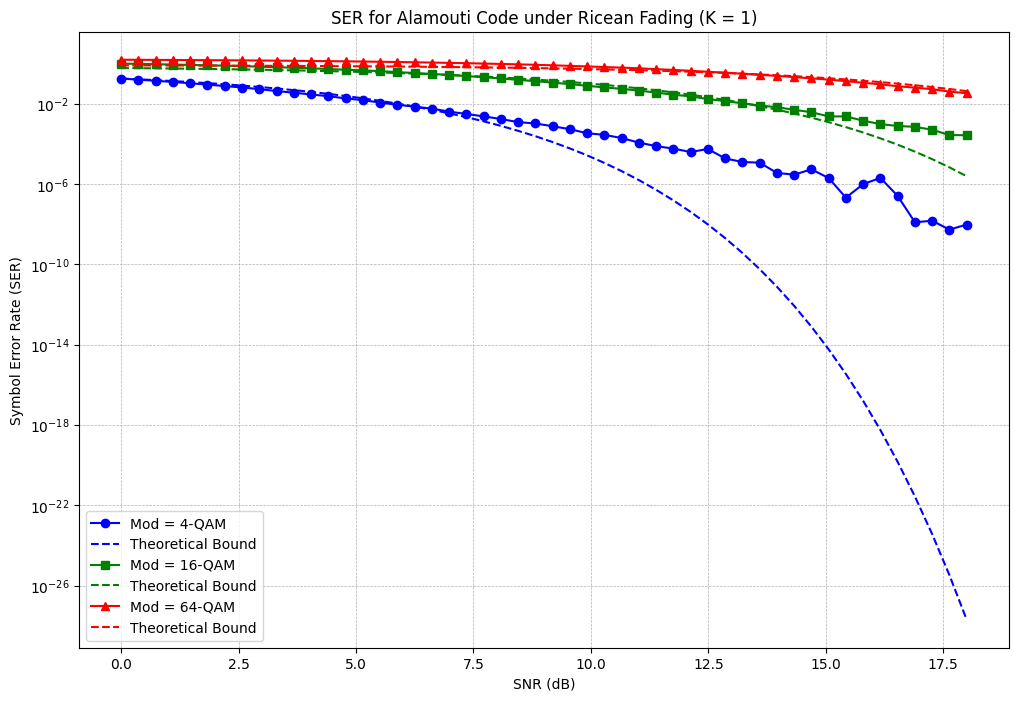

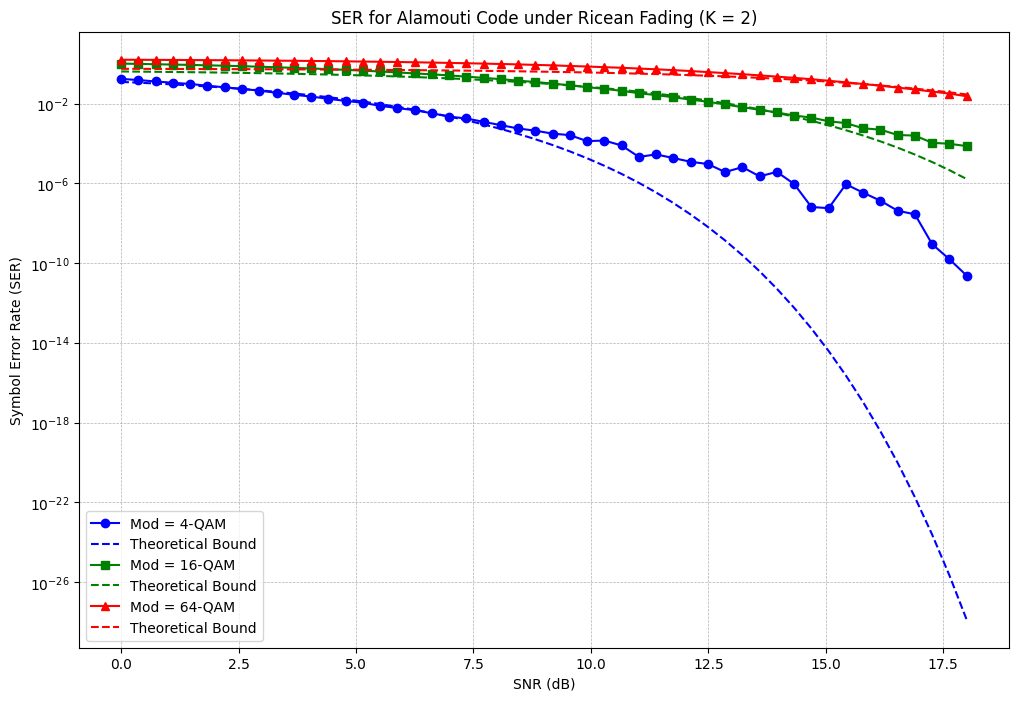

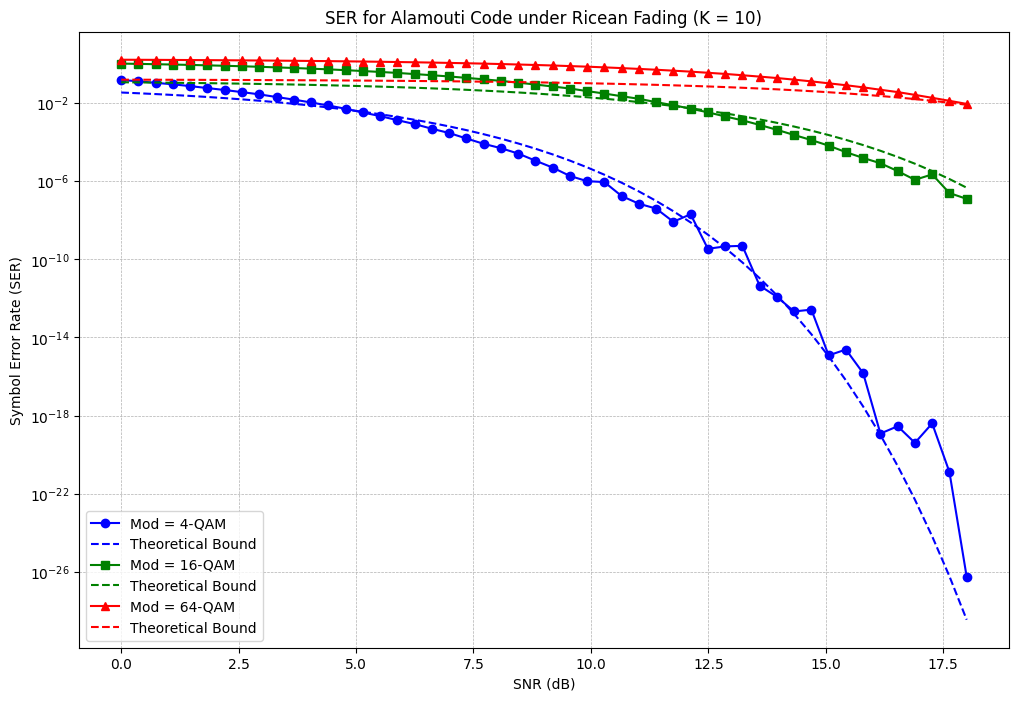

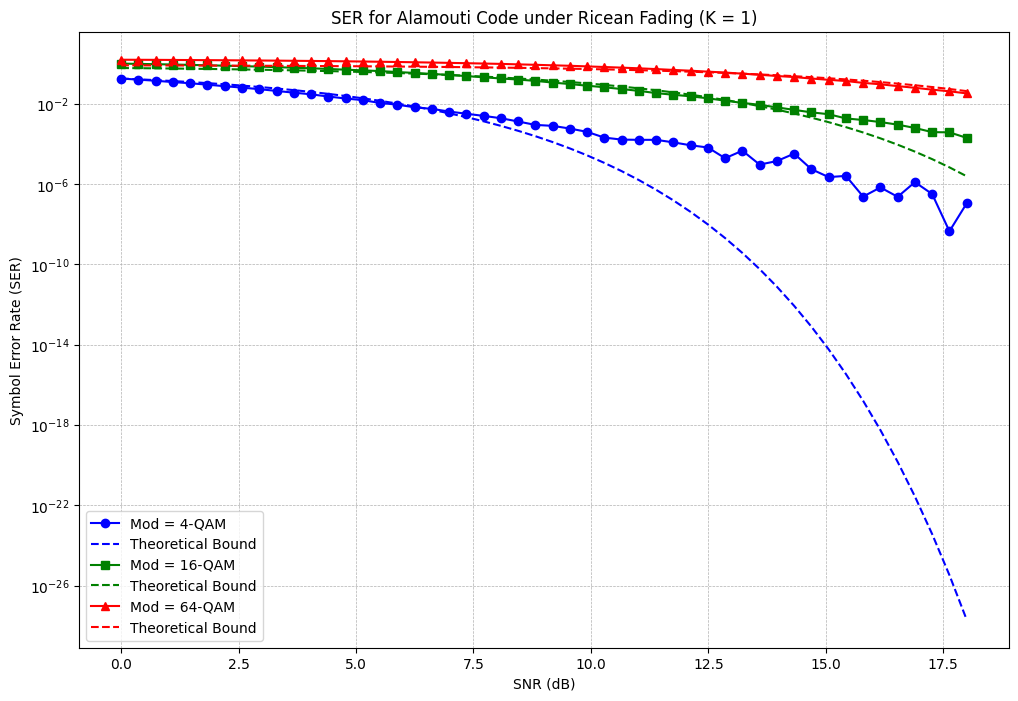

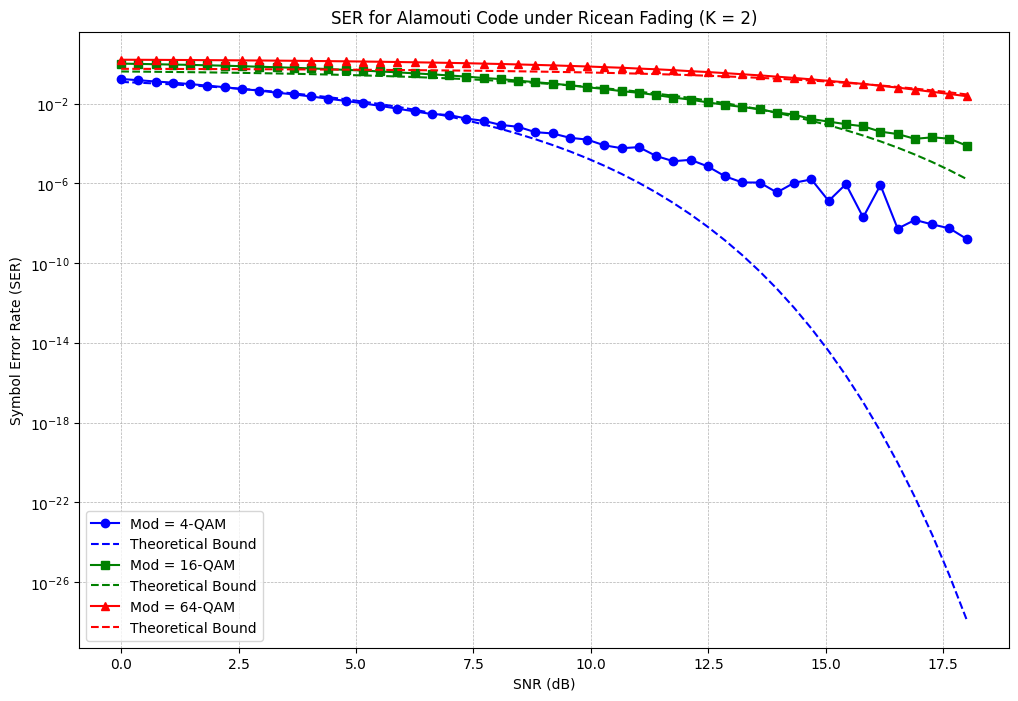

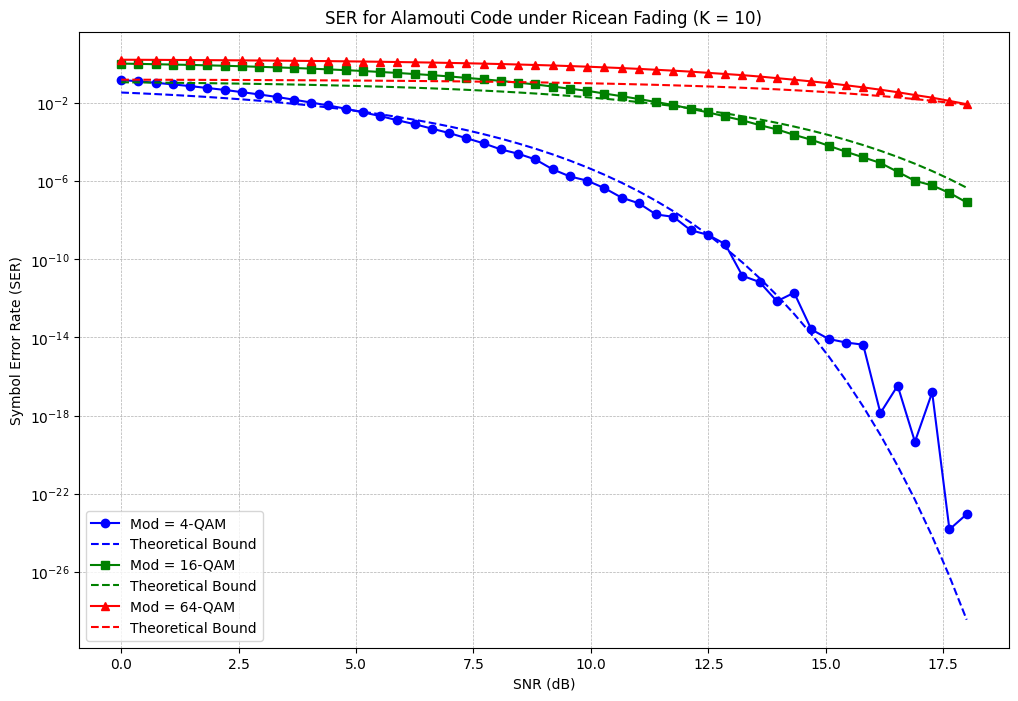

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def generate_ricean_channel(K, M_T, M_R):
    H_LoS = np.ones((M_R, M_T))  # LoS component
    H_NLoS = (1/np.sqrt(2)) * (np.random.randn(M_R, M_T) + 1j * np.random.randn(M_R, M_T))

    H = np.sqrt(K / (1 + K)) * H_LoS + np.sqrt(1 / (1 + K)) * H_NLoS
    return H

def ser_qam(snr, mod_order):
    k = np.log2(mod_order)
    m = int(np.sqrt(mod_order))  # Assume square QAM
    d_min_squared = 6 / (mod_order - 1)  # Minimum distance for square QAM

    return 4 * (1 - 1/m) * 0.5 * np.exp(-snr * d_min_squared / 2)

def alamouti_ser(snr_db, K_values, mod_orders, M_T=2, M_R=2):
    snr_linear = 10 ** (snr_db / 10)  # Convert SNR from dB to linear scale
    ser_results = {mod: [] for mod in mod_orders}
    theoretical_bounds = {mod: [] for mod in mod_orders}

    for mod_order in mod_orders:
        for K in K_values:
            ser = []
            theoretical_ser = []
            for snr in snr_linear:
                errors = 0
                trials = 10000  # Number of channel realizations

                for _ in range(trials):
                    # Generate Ricean fading channel
                    H = generate_ricean_channel(K, M_T, M_R)

                    # Compute effective channel gain for Alamouti coding
                    gain = np.linalg.norm(H)**2 / M_T

                    # Compute SER for the given modulation order
                    pe = ser_qam(snr * gain, mod_order)
                    errors += pe

                ser.append(errors / trials)

                # Theoretical bound (simplified for demonstration)
                theoretical_pe = ser_qam(snr, mod_order) / (1 + K)
                theoretical_ser.append(theoretical_pe)

            ser_results[mod_order].append(ser)
            theoretical_bounds[mod_order].append(theoretical_ser)

    return ser_results, theoretical_bounds

# Parameters
snr_db = np.linspace(0, 18, 50)  # SNR range in dB
K_values = [1, 2, 10]  # Ricean factors
mod_orders = [4, 16, 64]  # Modulation orders (QPSK, 16-QAM, 64-QAM)

# Simulate SER for Alamouti under different scenarios
ser_results, theoretical_bounds = alamouti_ser(snr_db, K_values, mod_orders)

# Plot the results for each K value
for k in K_values:
    plt.figure(figsize=(12, 8))  # Create a new figure for each K
    for i, mod_order in enumerate(mod_orders):
        plt.semilogy(
            snr_db, ser_results[mod_order][K_values.index(k)],
            label=f"Mod = {mod_order}-QAM",
            color=["b", "g", "r"][i], linestyle="-", marker=["o", "s", "^"][i]
        )

        plt.semilogy(
            snr_db, theoretical_bounds[mod_order][K_values.index(k)],
            label=f"Theoretical Bound",
            color=["b", "g", "r"][i], linestyle="--"
        )

    plt.title(f"SER for Alamouti Code under Ricean Fading (K = {k})")
    plt.xlabel("SNR (dB)")
    plt.ylabel("Symbol Error Rate (SER)")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend()
    plt.show()
import numpy as np
import matplotlib.pyplot as plt

def generate_ricean_channel(K, M_T, M_R):
    H_LoS = np.ones((M_R, M_T))  # LoS component
    H_NLoS = (1/np.sqrt(2)) * (np.random.randn(M_R, M_T) + 1j * np.random.randn(M_R, M_T))

    H = np.sqrt(K / (1 + K)) * H_LoS + np.sqrt(1 / (1 + K)) * H_NLoS
    return H

def ser_qam(snr, mod_order):
    k = np.log2(mod_order)
    m = int(np.sqrt(mod_order))  # Assume square QAM
    d_min_squared = 6 / (mod_order - 1)  # Minimum distance for square QAM

    return 4 * (1 - 1/m) * 0.5 * np.exp(-snr * d_min_squared / 2)

def alamouti_ser(snr_db, K_values, mod_orders, M_T=2, M_R=2):
    snr_linear = 10 ** (snr_db / 10)  # Convert SNR from dB to linear scale
    ser_results = {mod: [] for mod in mod_orders}
    theoretical_bounds = {mod: [] for mod in mod_orders}

    for mod_order in mod_orders:
        for K in K_values:
            ser = []
            theoretical_ser = []
            for snr in snr_linear:
                errors = 0
                trials = 10000  # Number of channel realizations

                for _ in range(trials):
                    # Generate Ricean fading channel
                    H = generate_ricean_channel(K, M_T, M_R)

                    # Compute effective channel gain for Alamouti coding
                    gain = np.linalg.norm(H)**2 / M_T

                    # Compute SER for the given modulation order
                    pe = ser_qam(snr * gain, mod_order)
                    errors += pe

                ser.append(errors / trials)

                # Theoretical bound (simplified for demonstration)
                theoretical_pe = ser_qam(snr, mod_order) / (1 + K)
                theoretical_ser.append(theoretical_pe)

            ser_results[mod_order].append(ser)
            theoretical_bounds[mod_order].append(theoretical_ser)

    return ser_results, theoretical_bounds

# Parameters
snr_db = np.linspace(0, 18, 50)  # SNR range in dB
K_values = [1, 2, 10]  # Ricean factors
mod_orders = [4, 16, 64]  # Modulation orders (QPSK, 16-QAM, 64-QAM)

# Simulate SER for Alamouti under different scenarios
ser_results, theoretical_bounds = alamouti_ser(snr_db, K_values, mod_orders)

# Plot the results for each K value
for k in K_values:
    plt.figure(figsize=(12, 8))  # Create a new figure for each K
    for i, mod_order in enumerate(mod_orders):
        plt.semilogy(
            snr_db, ser_results[mod_order][K_values.index(k)],
            label=f"Mod = {mod_order}-QAM",
            color=["b", "g", "r"][i], linestyle="-", marker=["o", "s", "^"][i]
        )

        plt.semilogy(
            snr_db, theoretical_bounds[mod_order][K_values.index(k)],
            label=f"Theoretical Bound",
            color=["b", "g", "r"][i], linestyle="--"
        )

    plt.title(f"SER for Alamouti Code under Ricean Fading (K = {k})")
    plt.xlabel("SNR (dB)")
    plt.ylabel("Symbol Error Rate (SER)")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend()
    plt.show()


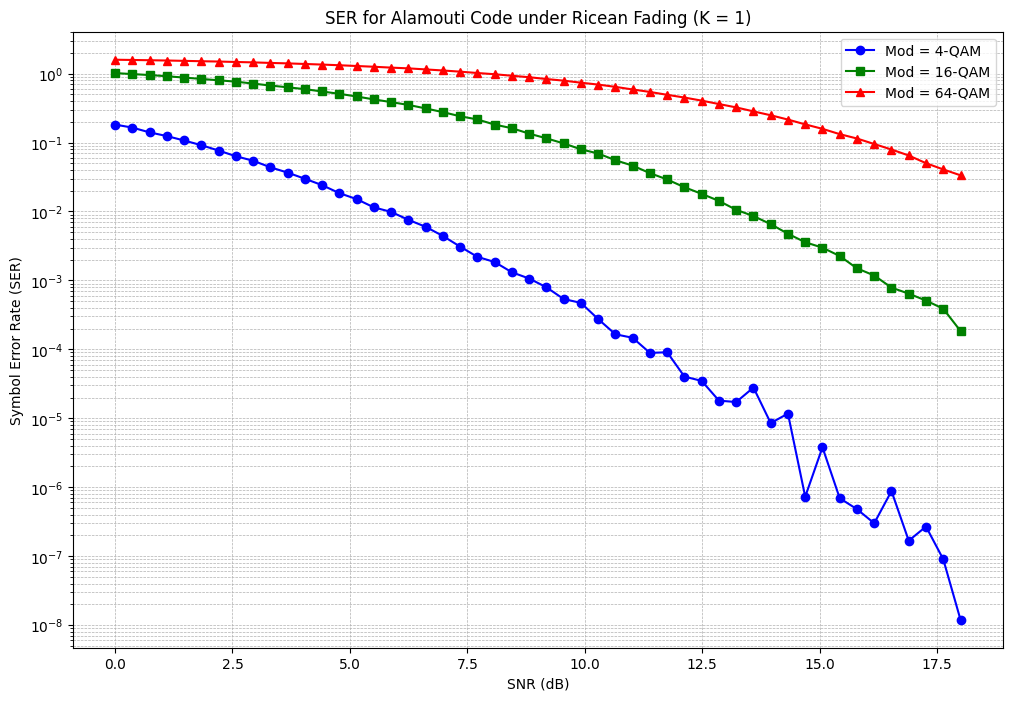

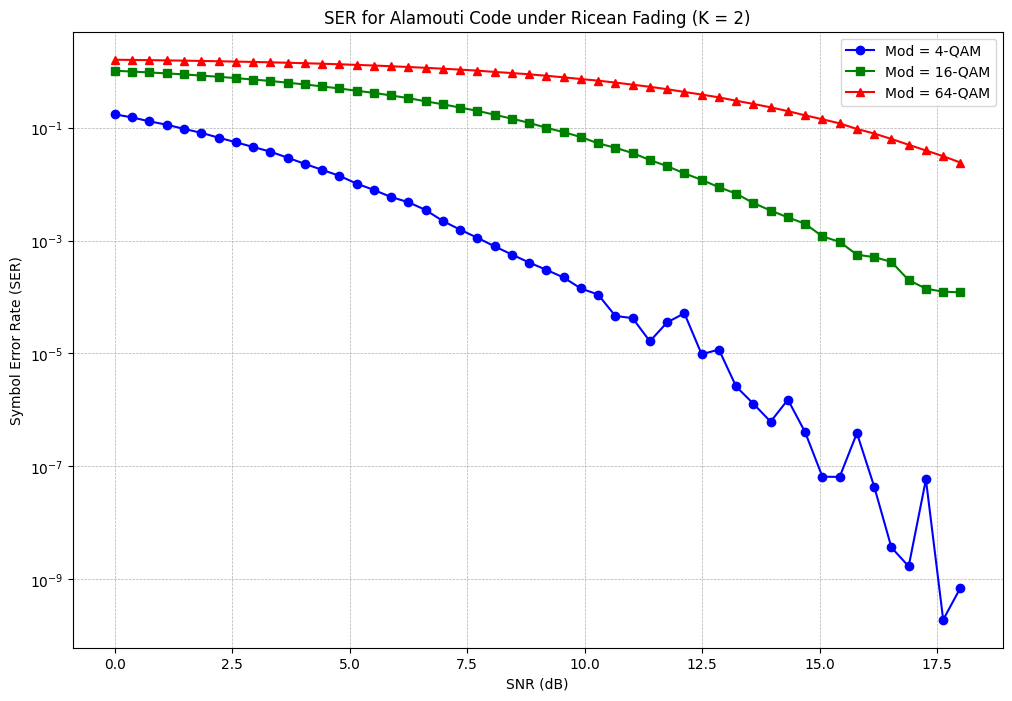

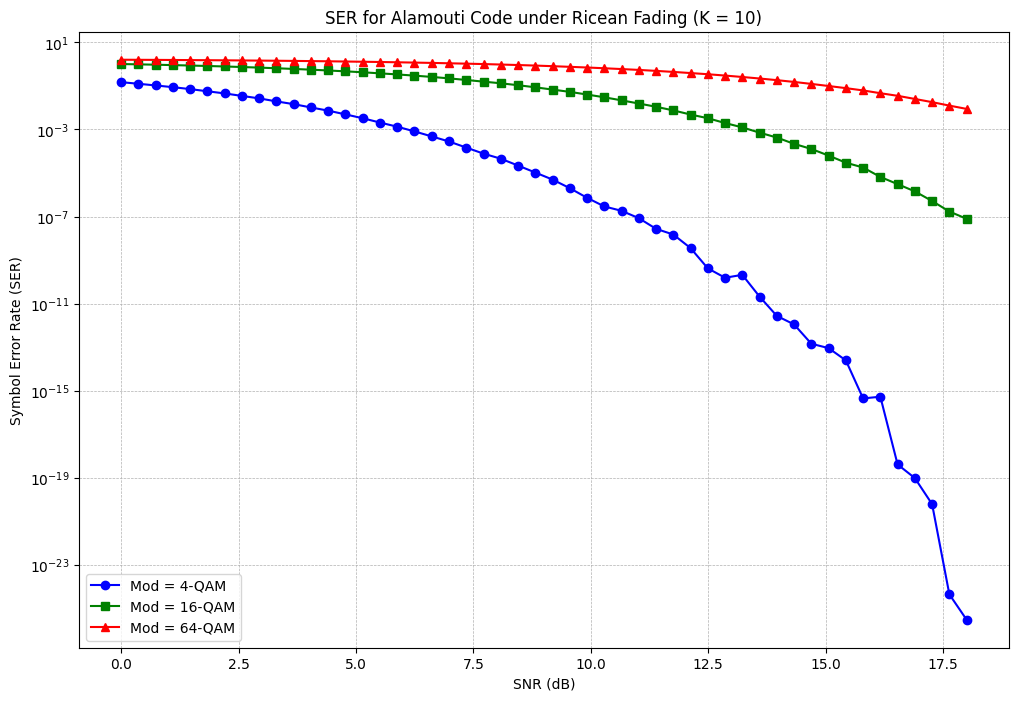

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def generate_ricean_channel(K, M_T, M_R):
    H_LoS = np.ones((M_R, M_T))  # LoS component
    H_NLoS = (1/np.sqrt(2)) * (np.random.randn(M_R, M_T) + 1j * np.random.randn(M_R, M_T))

    H = np.sqrt(K / (1 + K)) * H_LoS + np.sqrt(1 / (1 + K)) * H_NLoS
    return H

def ser_qam(snr, mod_order):
    k = np.log2(mod_order)
    m = int(np.sqrt(mod_order))  # Assume square QAM
    d_min_squared = 6 / (mod_order - 1)  # Minimum distance for square QAM

    return 4 * (1 - 1/m) * 0.5 * np.exp(-snr * d_min_squared / 2)

def alamouti_ser(snr_db, K_values, mod_orders, M_T=2, M_R=2):
    snr_linear = 10 ** (snr_db / 10)  # Convert SNR from dB to linear scale
    ser_results = {mod: [] for mod in mod_orders}

    for mod_order in mod_orders:
        for K in K_values:
            ser = []
            for snr in snr_linear:
                errors = 0
                trials = 10000  # Number of channel realizations

                for _ in range(trials):
                    # Generate Ricean fading channel
                    H = generate_ricean_channel(K, M_T, M_R)

                    # Compute effective channel gain for Alamouti coding
                    gain = np.linalg.norm(H)**2 / M_T

                    # Compute SER for the given modulation order
                    pe = ser_qam(snr * gain, mod_order)
                    errors += pe

                ser.append(errors / trials)

            ser_results[mod_order].append(ser)

    return ser_results

# Parameters
snr_db = np.linspace(0, 18, 50)  # SNR range in dB
K_values = [1, 2, 10]  # Ricean factors
mod_orders = [4, 16, 64]  # Modulation orders (QPSK, 16-QAM, 64-QAM)

# Simulate SER for Alamouti under different scenarios
ser_results = alamouti_ser(snr_db, K_values, mod_orders)

# Plot the results for each K value
for k in K_values:
    plt.figure(figsize=(12, 8))  # Create a new figure for each K
    for i, mod_order in enumerate(mod_orders):
        plt.semilogy(
            snr_db, ser_results[mod_order][K_values.index(k)],
            label=f"Mod = {mod_order}-QAM",
            color=["b", "g", "r"][i], linestyle="-", marker=["o", "s", "^"][i]
        )

    plt.title(f"SER for Alamouti Code under Ricean Fading (K = {k})")
    plt.xlabel("SNR (dB)")
    plt.ylabel("Symbol Error Rate (SER)")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend()
    plt.show()


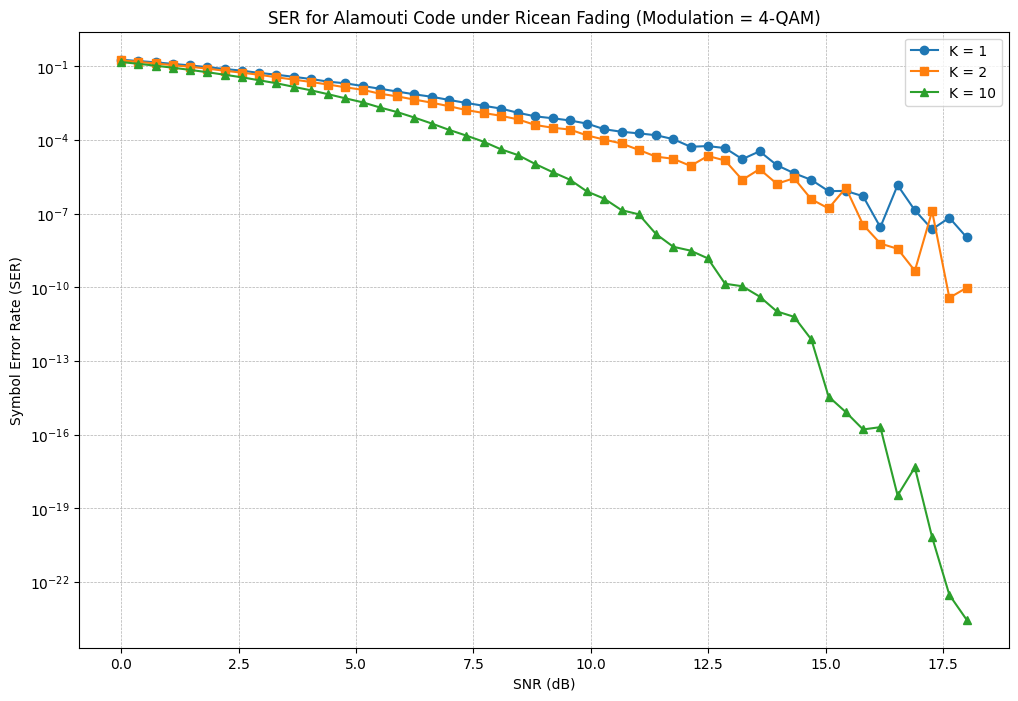

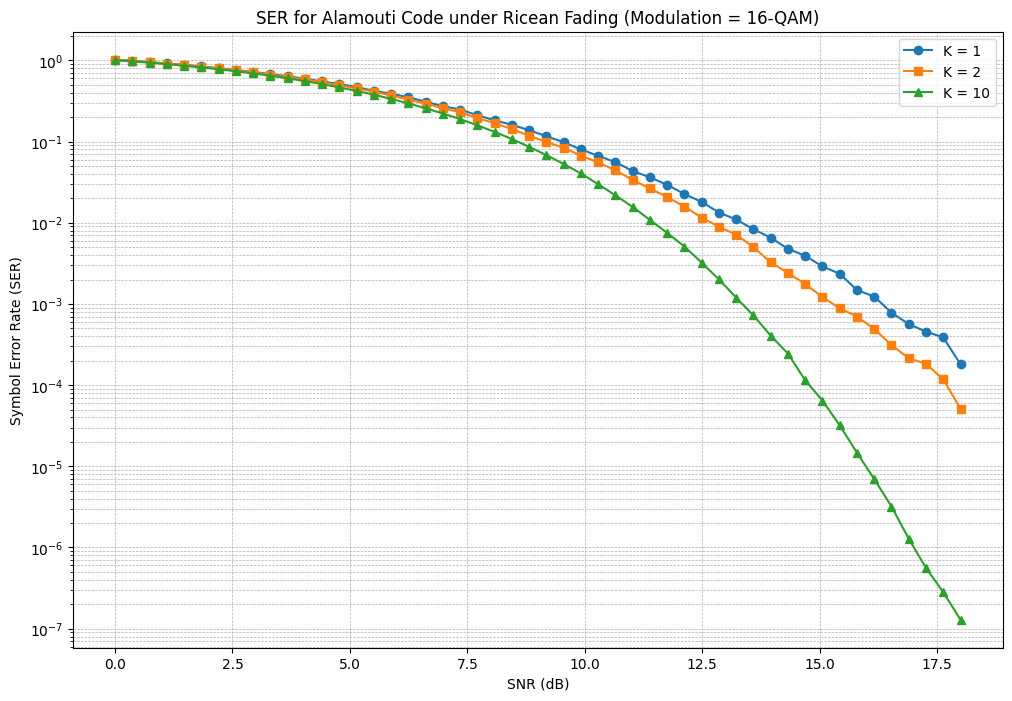

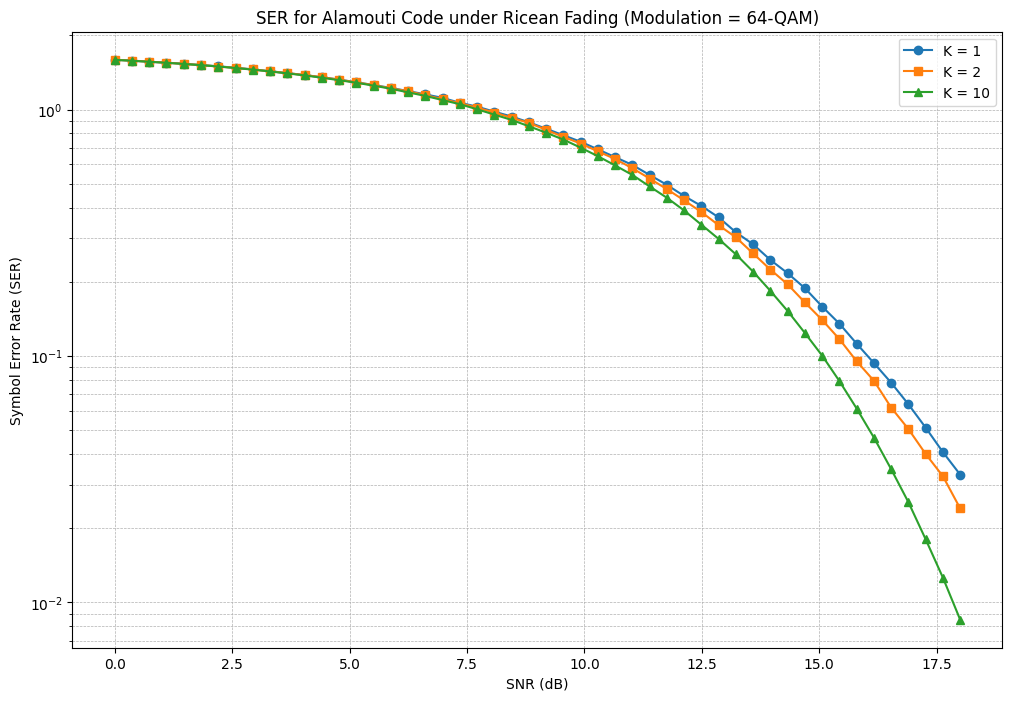

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def generate_ricean_channel(K, M_T, M_R):
    H_LoS = np.ones((M_R, M_T))  # LoS component
    H_NLoS = (1/np.sqrt(2)) * (np.random.randn(M_R, M_T) + 1j * np.random.randn(M_R, M_T))

    H = np.sqrt(K / (1 + K)) * H_LoS + np.sqrt(1 / (1 + K)) * H_NLoS
    return H

def ser_qam(snr, mod_order):
    k = np.log2(mod_order)
    m = int(np.sqrt(mod_order))  # Assume square QAM
    d_min_squared = 6 / (mod_order - 1)  # Minimum distance for square QAM

    return 4 * (1 - 1/m) * 0.5 * np.exp(-snr * d_min_squared / 2)

def alamouti_ser(snr_db, K_values, mod_orders, M_T=2, M_R=2):
    snr_linear = 10 ** (snr_db / 10)  # Convert SNR from dB to linear scale
    ser_results = {mod: [] for mod in mod_orders}

    for mod_order in mod_orders:
        for K in K_values:
            ser = []
            for snr in snr_linear:
                errors = 0
                trials = 10000  # Number of channel realizations

                for _ in range(trials):
                    # Generate Ricean fading channel
                    H = generate_ricean_channel(K, M_T, M_R)

                    # Compute effective channel gain for Alamouti coding
                    gain = np.linalg.norm(H)**2 / M_T

                    # Compute SER for the given modulation order
                    pe = ser_qam(snr * gain, mod_order)
                    errors += pe

                ser.append(errors / trials)

            ser_results[mod_order].append(ser)

    return ser_results

# Parameters
snr_db = np.linspace(0, 18, 50)  # SNR range in dB
K_values = [1, 2, 10]  # Ricean factors
mod_orders = [4, 16, 64]  # Modulation orders (QPSK, 16-QAM, 64-QAM)

# Simulate SER for Alamouti under different scenarios
ser_results = alamouti_ser(snr_db, K_values, mod_orders)

# Plot the results for each modulation order
for mod_order in mod_orders:
    plt.figure(figsize=(12, 8))  # Create a new figure for each modulation order
    for i, K in enumerate(K_values):
        plt.semilogy(
            snr_db, ser_results[mod_order][i],
            label=f"K = {K}",
            linestyle="-", marker=["o", "s", "^"][i]
        )

    plt.title(f"SER for Alamouti Code under Ricean Fading (Modulation = {mod_order}-QAM)")
    plt.xlabel("SNR (dB)")
    plt.ylabel("Symbol Error Rate (SER)")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend()
    plt.show()


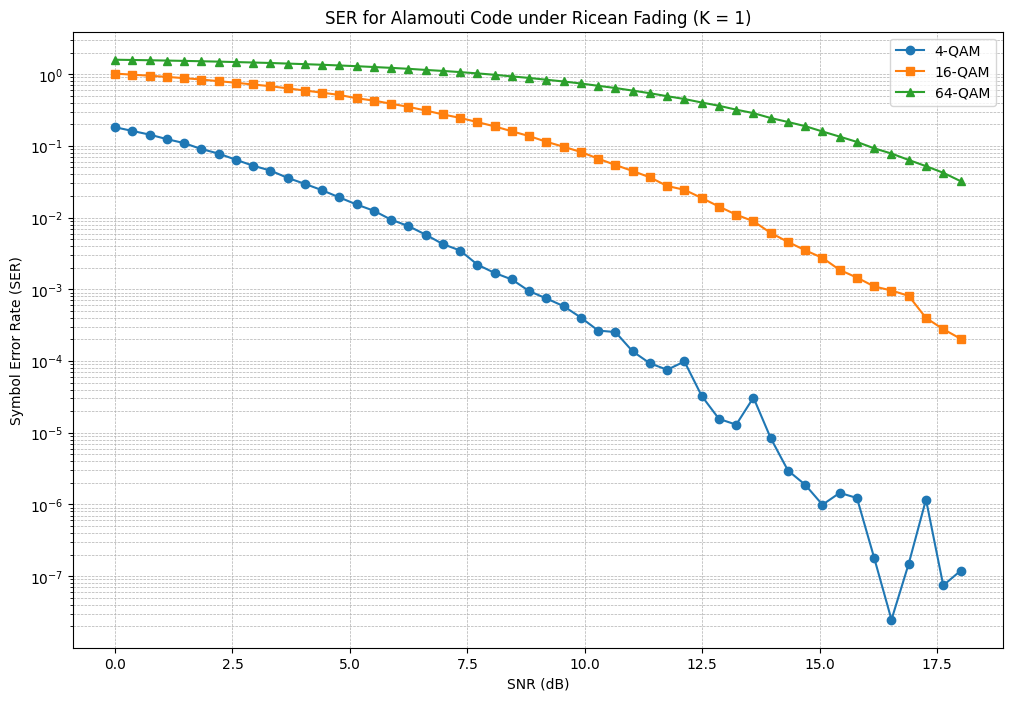

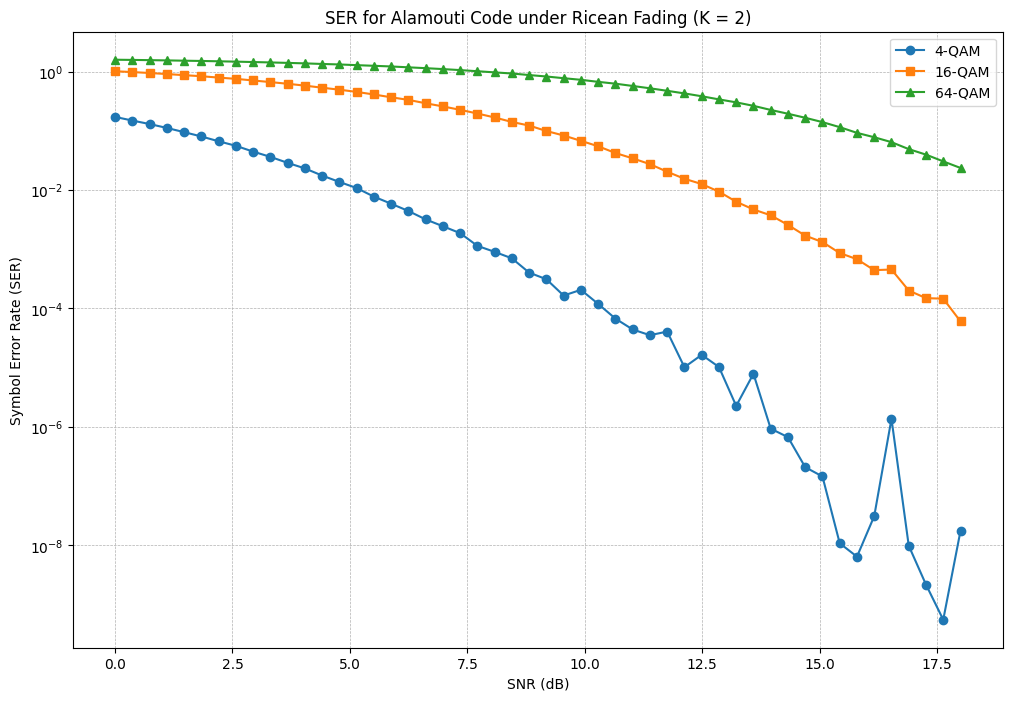

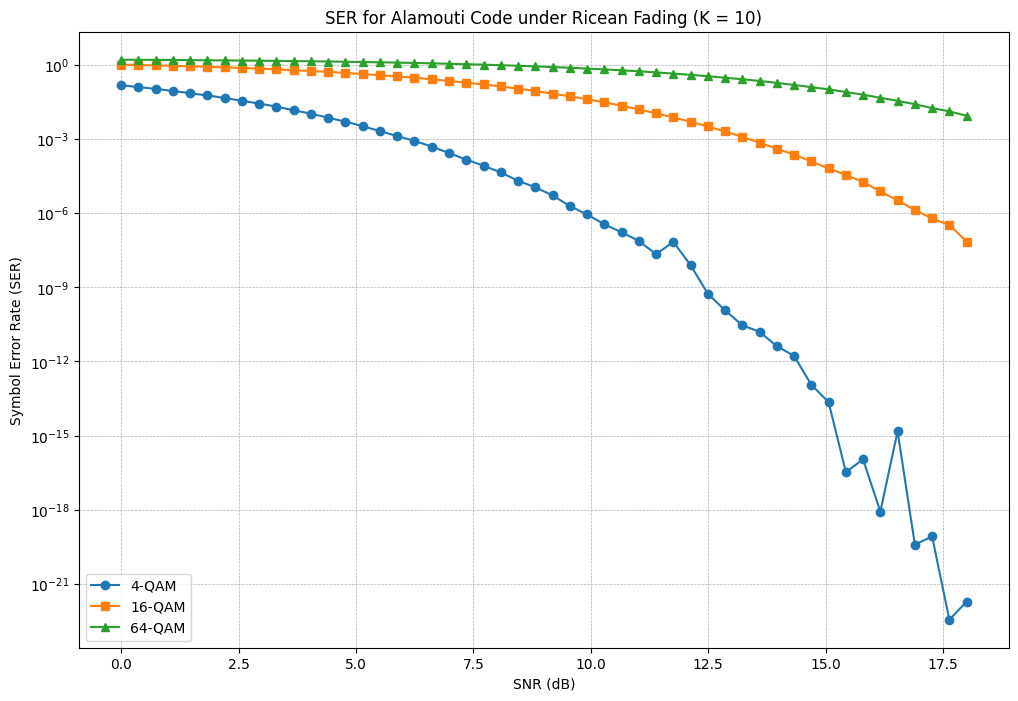

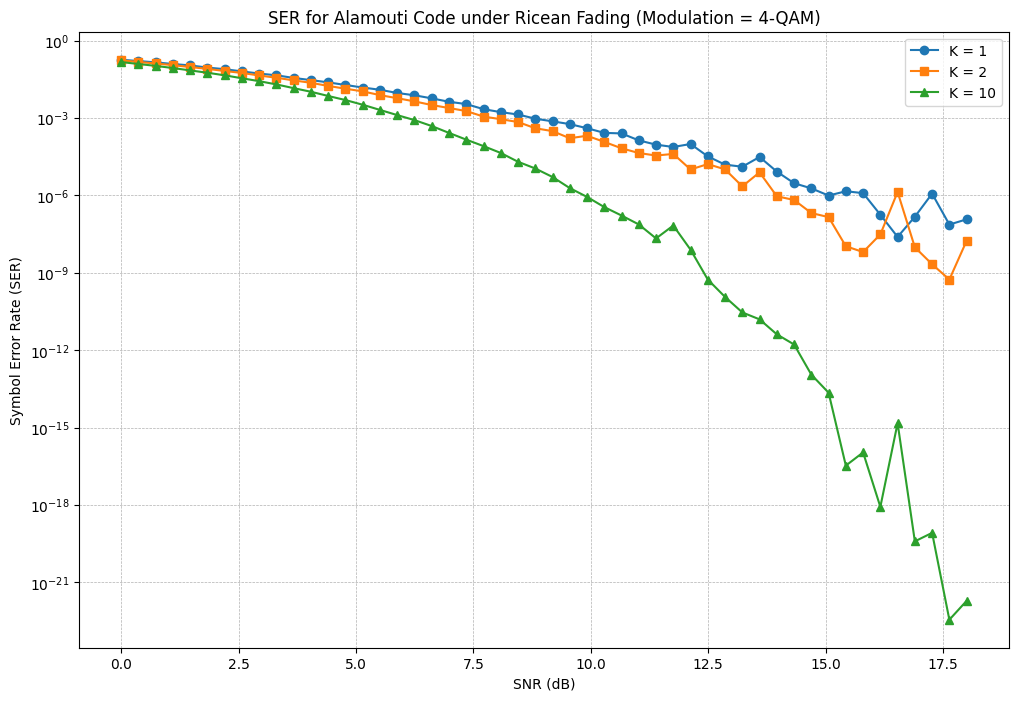

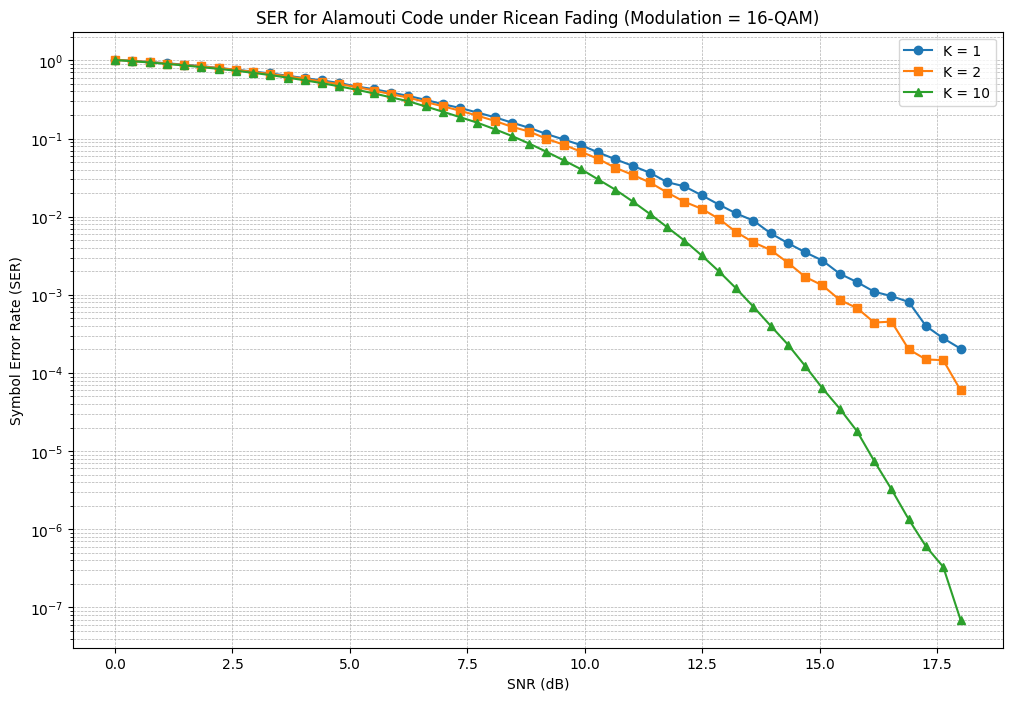

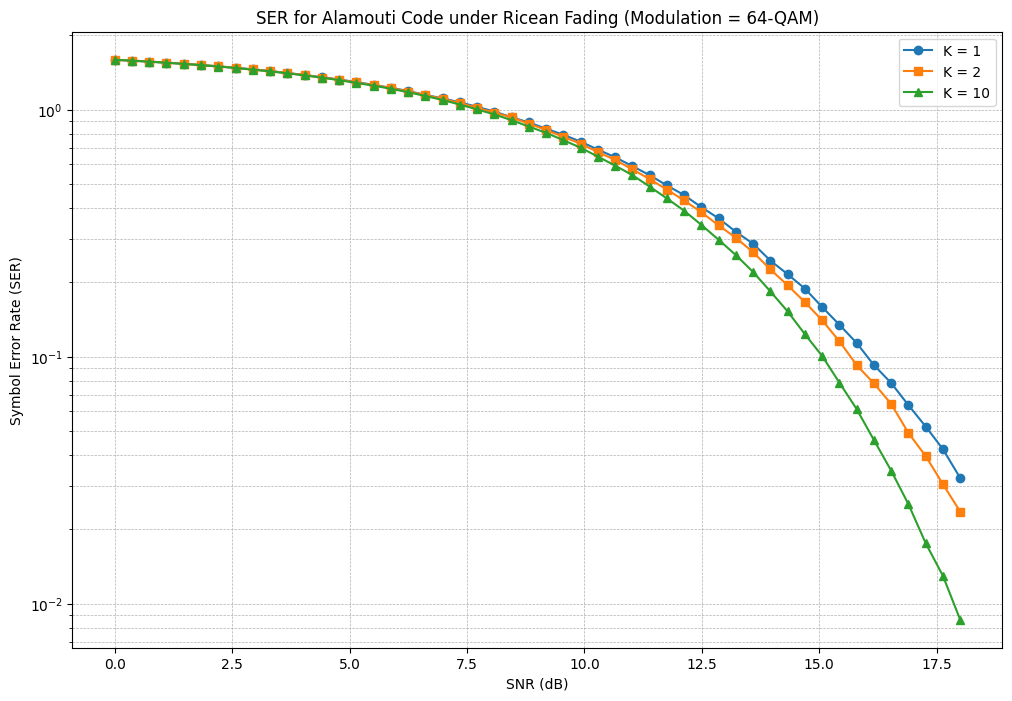

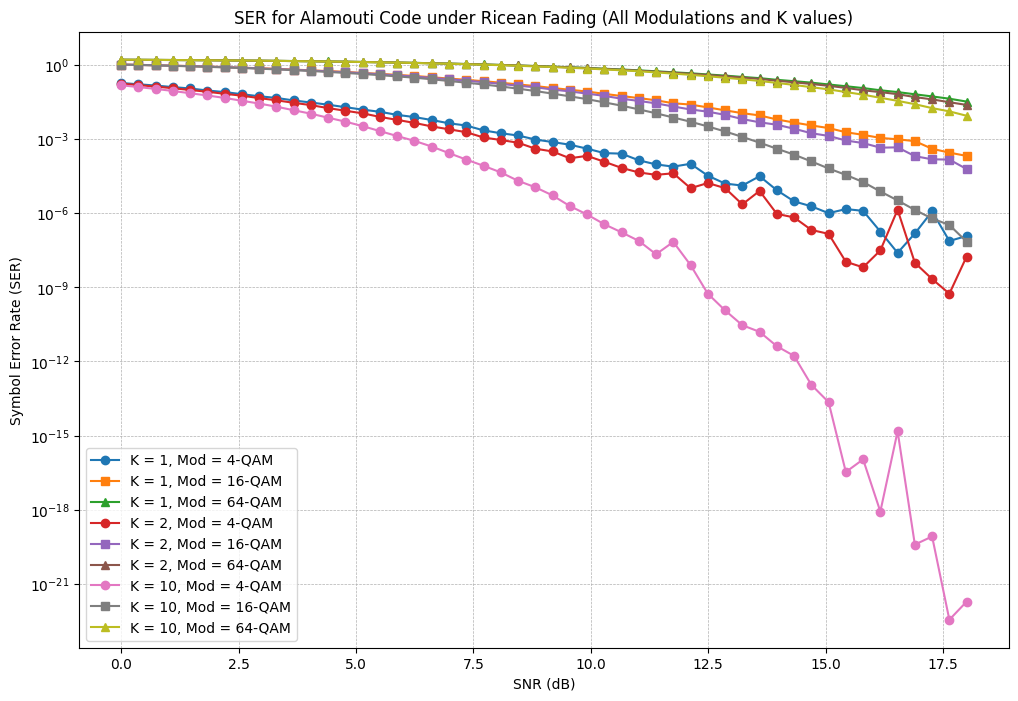

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def generate_ricean_channel(K, M_T, M_R):
    H_LoS = np.ones((M_R, M_T))  # LoS component
    H_NLoS = (1/np.sqrt(2)) * (np.random.randn(M_R, M_T) + 1j * np.random.randn(M_R, M_T))

    H = np.sqrt(K / (1 + K)) * H_LoS + np.sqrt(1 / (1 + K)) * H_NLoS
    return H

def ser_qam(snr, mod_order):
    k = np.log2(mod_order)
    m = int(np.sqrt(mod_order))  # Assume square QAM
    d_min_squared = 6 / (mod_order - 1)  # Minimum distance for square QAM

    return 4 * (1 - 1/m) * 0.5 * np.exp(-snr * d_min_squared / 2)

def alamouti_ser(snr_db, K_values, mod_orders, M_T=2, M_R=2):
    snr_linear = 10 ** (snr_db / 10)  # Convert SNR from dB to linear scale
    ser_results = {mod: [] for mod in mod_orders}

    for mod_order in mod_orders:
        for K in K_values:
            ser = []
            for snr in snr_linear:
                errors = 0
                trials = 10000  # Number of channel realizations

                for _ in range(trials):
                    # Generate Ricean fading channel
                    H = generate_ricean_channel(K, M_T, M_R)

                    # Compute effective channel gain for Alamouti coding
                    gain = np.linalg.norm(H)**2 / M_T

                    # Compute SER for the given modulation order
                    pe = ser_qam(snr * gain, mod_order)
                    errors += pe

                ser.append(errors / trials)

            ser_results[mod_order].append(ser)

    return ser_results

# Parameters
snr_db = np.linspace(0, 18, 50)  # SNR range in dB
K_values = [1, 2, 10]  # Ricean factors
mod_orders = [4, 16, 64]  # Modulation orders (QPSK, 16-QAM, 64-QAM)

# Simulate SER for Alamouti under different scenarios
ser_results = alamouti_ser(snr_db, K_values, mod_orders)

# 1. Same K with different modulations (3 plots for K=1, K=2, K=10)
for K in K_values:
    plt.figure(figsize=(12, 8))  # Create a new figure for each K
    for i, mod_order in enumerate(mod_orders):
        plt.semilogy(
            snr_db, ser_results[mod_order][K_values.index(K)],
            label=f"{mod_order}-QAM",
            linestyle="-", marker=["o", "s", "^"][i]
        )

    plt.title(f"SER for Alamouti Code under Ricean Fading (K = {K})")
    plt.xlabel("SNR (dB)")
    plt.ylabel("Symbol Error Rate (SER)")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend()
    plt.show()

# 2. Same modulation with different K values (3 plots for 4-QAM, 16-QAM, 64-QAM)
for mod_order in mod_orders:
    plt.figure(figsize=(12, 8))  # Create a new figure for each modulation order
    for i, K in enumerate(K_values):
        plt.semilogy(
            snr_db, ser_results[mod_order][i],
            label=f"K = {K}",
            linestyle="-", marker=["o", "s", "^"][i]
        )

    plt.title(f"SER for Alamouti Code under Ricean Fading (Modulation = {mod_order}-QAM)")
    plt.xlabel("SNR (dB)")
    plt.ylabel("Symbol Error Rate (SER)")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend()
    plt.show()

# 3. One plot for all modulations and all K values
plt.figure(figsize=(12, 8))  # One plot for all K and modulations
for K in K_values:
    for i, mod_order in enumerate(mod_orders):
        plt.semilogy(
            snr_db, ser_results[mod_order][K_values.index(K)],
            label=f"K = {K}, Mod = {mod_order}-QAM",
            linestyle="-", marker=["o", "s", "^"][i]
        )

plt.title(f"SER for Alamouti Code under Ricean Fading (All Modulations and K values)")
plt.xlabel("SNR (dB)")
plt.ylabel("Symbol Error Rate (SER)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()


In [23]:
import numpy as np
import matplotlib.pyplot as plt

def generate_ricean_channel(K, M_T, M_R):
    H_LoS = np.ones((M_R, M_T))  # LoS component
    H_NLoS = (1/np.sqrt(2)) * (np.random.randn(M_R, M_T) + 1j * np.random.randn(M_R, M_T))

    H = np.sqrt(K / (1 + K)) * H_LoS + np.sqrt(1 / (1 + K)) * H_NLoS
    return H

def ser_qam(snr, mod_order):
    k = np.log2(mod_order)
    m = int(np.sqrt(mod_order))  # Assume square QAM
    d_min_squared = 6 / (mod_order - 1)  # Minimum distance for square QAM

    return 4 * (1 - 1/m) * 0.5 * np.exp(-snr * d_min_squared / 2)

def alamouti_ser(snr_db, K_values, mod_orders, M_T_values, M_R_values):
    snr_linear = 10 ** (snr_db / 10)  # Convert SNR from dB to linear scale
    ser_results = {}

    # Iterate over all combinations of M_T and M_R
    for M_T in M_T_values:
        for M_R in M_R_values:
            ser_results[(M_T, M_R)] = {mod: [] for mod in mod_orders}

            for mod_order in mod_orders:
                for K in K_values:
                    ser = []
                    for snr in snr_linear:
                        errors = 0
                        trials = 10000  # Number of channel realizations

                        for _ in range(trials):
                            # Generate Ricean fading channel
                            H = generate_ricean_channel(K, M_T, M_R)

                            # Compute effective channel gain for Alamouti coding
                            gain = np.linalg.norm(H)**2 / M_T

                            # Compute SER for the given modulation order
                            pe = ser_qam(snr * gain, mod_order)
                            errors += pe

                        ser.append(errors / trials)

                    ser_results[(M_T, M_R)][mod_order].append(ser)

    return ser_results

# Parameters
snr_db = np.linspace(0, 18, 50)  # SNR range in dB
K_values = [1, 2, 10]  # Ricean factors
mod_orders = [4, 16, 64]  # Modulation orders (QPSK, 16-QAM, 64-QAM)
M_T_values = [2, 4]  # Number of transmit antennas
M_R_values = [2, 4]  # Number of receive antennas

# Simulate SER for Alamouti under different scenarios
ser_results = alamouti_ser(snr_db, K_values, mod_orders, M_T_values, M_R_values)

# Plot the results

# 1. Same K with different modulations for different antenna configurations
for K in K_values:
    for M_T in M_T_values:
        for M_R in M_R_values:
            plt.figure(figsize=(12, 8))  # Create a new figure for each K, M_T, M_R combination
            for i, mod_order in enumerate(mod_orders):
                plt.semilogy(
                    snr_db, ser_results[(M_T, M_R)][mod_order][K_values.index(K)],
                    label=f"{mod_order}-QAM",
                    linestyle="-", marker=["o", "s", "^"][i]
                )

            plt.title(f"SER for Alamouti Code under Ricean Fading (K = {K}, M_T = {M_T}, M_R = {M_R})")
            plt.xlabel("SNR (dB)")
            plt.ylabel("Symbol Error Rate (SER)")
            plt.grid(True, which="both", linestyle="--", linewidth=0.5)
            plt.legend()
            plt.show()

# 2. Same modulation with different K values for different antenna configurations
for mod_order in mod_orders:
    for M_T in M_T_values:
        for M_R in M_R_values:
            plt.figure(figsize=(12, 8))  # Create a new figure for each modulation order, M_T, M_R combination
            for i, K in enumerate(K_values):
                plt.semilogy(
                    snr_db, ser_results[(M_T, M_R)][mod_order][i],
                    label=f"K = {K}",
                    linestyle="-", marker=["o", "s", "^"][i]
                )

            plt.title(f"SER for Alamouti Code under Ricean Fading (Mod = {mod_order}-QAM, M_T = {M_T}, M_R = {M_R})")
            plt.xlabel("SNR (dB)")
            plt.ylabel("Symbol Error Rate (SER)")
            plt.grid(True, which="both", linestyle="--", linewidth=0.5)
            plt.legend()
            plt.show()

# 3. One plot for all modulations, all K values, and all antenna configurations
plt.figure(figsize=(12, 8))  # One plot for all K, modulations, and antenna configurations
for M_T in M_T_values:
    for M_R in M_R_values:
        for K in K_values:
            for i, mod_order in enumerate(mod_orders):
                plt.semilogy(
                    snr_db, ser_results[(M_T, M_R)][mod_order][K_values.index(K)],
                    label=f"K = {K}, Mod = {mod_order}-QAM, M_T = {M_T}, M_R = {M_R}",
                    linestyle="-", marker=["o", "s", "^"][i]
                )

plt.title(f"SER for Alamouti Code under Ricean Fading (All Modulations, All K, All M_T, M_R)")
plt.xlabel("SNR (dB)")
plt.ylabel("Symbol Error Rate (SER)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

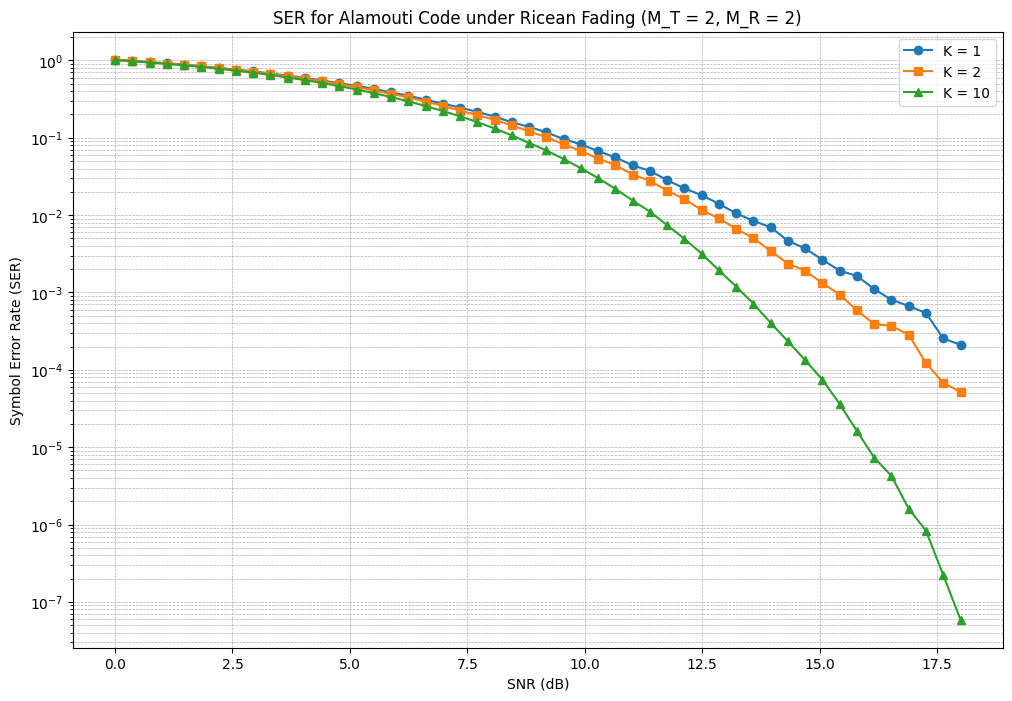

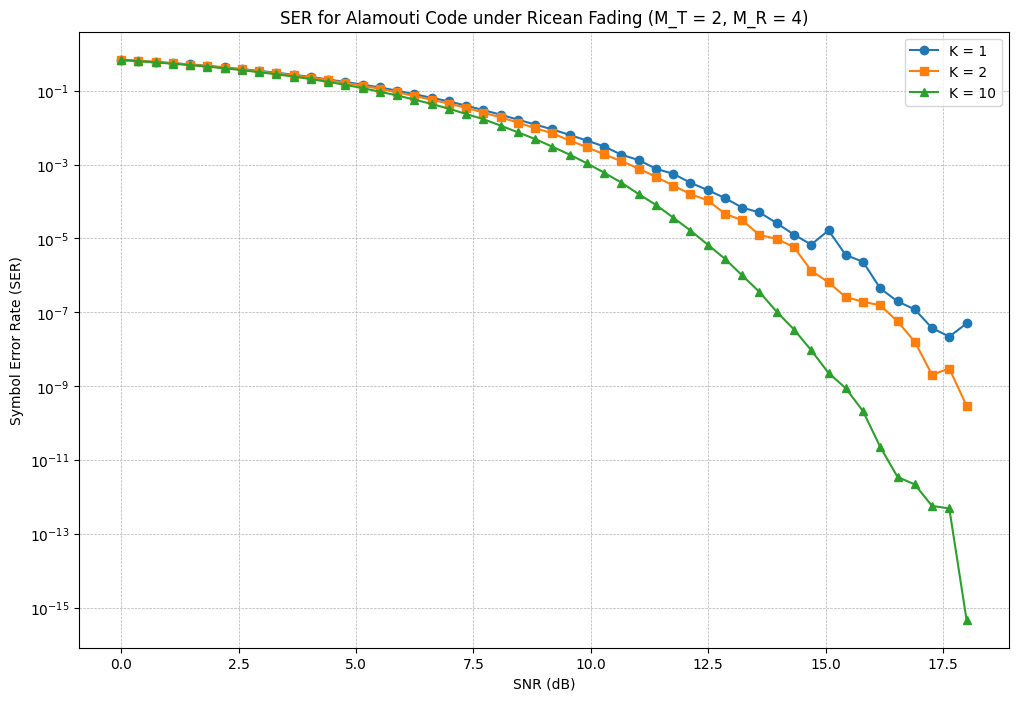

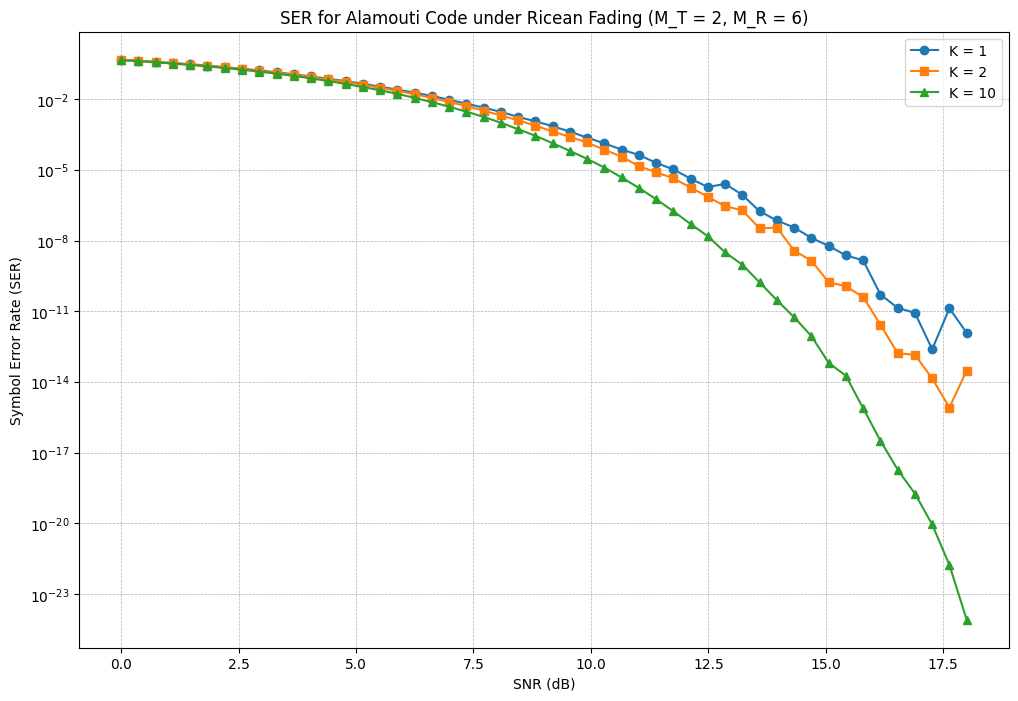

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def generate_ricean_channel(K, M_T, M_R):
    """
    Generate a Ricean fading channel matrix H.

    Parameters:
    K -- Ricean factor
    M_T -- Number of transmit antennas
    M_R -- Number of receive antennas

    Returns:
    H -- Ricean fading channel matrix
    """
    H_LoS = np.ones((M_R, M_T))  # LoS component
    H_NLoS = (1/np.sqrt(2)) * (np.random.randn(M_R, M_T) + 1j * np.random.randn(M_R, M_T))

    H = np.sqrt(K / (1 + K)) * H_LoS + np.sqrt(1 / (1 + K)) * H_NLoS
    return H

def ser_qam(snr, mod_order):
    """
    Calculate SER for square QAM modulation.

    Parameters:
    snr -- Signal-to-noise ratio (linear scale)
    mod_order -- Modulation order (e.g., 4 for QPSK, 16 for 16-QAM)

    Returns:
    ser -- Symbol error rate
    """
    k = np.log2(mod_order)
    m = int(np.sqrt(mod_order))  # Assume square QAM
    d_min_squared = 6 / (mod_order - 1)  # Minimum distance for square QAM

    return 4 * (1 - 1/m) * 0.5 * np.exp(-snr * d_min_squared / 2)

def alamouti_ser(snr_db, K_values, mod_orders, M_T_values, M_R_values):
    """
    Simulate SER for Alamouti coding under Ricean fading for various antenna configurations.

    Parameters:
    snr_db -- Array of SNR values in dB
    K_values -- List of Ricean K factors to simulate
    mod_orders -- List of modulation orders (e.g., [4, 16, 64])
    M_T_values -- List of transmit antenna configurations
    M_R_values -- List of receive antenna configurations

    Returns:
    ser_results -- SER values for each combination of K, M_T, M_R, and modulation order
    """
    snr_linear = 10 ** (snr_db / 10)  # Convert SNR from dB to linear scale
    ser_results = {}

    # Iterate over all combinations of M_T and M_R
    for M_T in M_T_values:
        for M_R in M_R_values:
            ser_results[(M_T, M_R)] = {mod: [] for mod in mod_orders}

            for mod_order in mod_orders:
                for K in K_values:
                    ser = []
                    for snr in snr_linear:
                        errors = 0
                        trials = 10000  # Number of channel realizations

                        for _ in range(trials):
                            # Generate Ricean fading channel
                            H = generate_ricean_channel(K, M_T, M_R)

                            # Compute effective channel gain for Alamouti coding
                            gain = np.linalg.norm(H)**2 / M_T

                            # Compute SER for the given modulation order
                            pe = ser_qam(snr * gain, mod_order)
                            errors += pe

                        ser.append(errors / trials)

                    ser_results[(M_T, M_R)][mod_order].append(ser)

    return ser_results

# Parameters
snr_db = np.linspace(0, 18, 50)  # SNR range in dB
K_values = [1, 2, 10]  # Ricean factors
mod_orders = [16]  # Fixed modulation order (e.g., 16-QAM)
M_T_values = [2]  # Fixed number of transmit antennas (2)
M_R_values = [2, 4, 6]  # Number of receive antennas (2x2, 2x4, 2x6)

# Simulate SER for Alamouti under different scenarios
ser_results = alamouti_ser(snr_db, K_values, mod_orders, M_T_values, M_R_values)

# Plot the results
# Plot for each antenna configuration at different K values with constant modulation (16-QAM)

for M_R in M_R_values:
    plt.figure(figsize=(12, 8))  # Create a new figure for each M_R configuration (2x2, 2x4, 2x6)
    for i, K in enumerate(K_values):
        plt.semilogy(
            snr_db, ser_results[(2, M_R)][16][i],
            label=f"K = {K}",
            linestyle="-", marker=["o", "s", "^"][i]
        )

    plt.title(f"SER for Alamouti Code under Ricean Fading (M_T = 2, M_R = {M_R})")
    plt.xlabel("SNR (dB)")
    plt.ylabel("Symbol Error Rate (SER)")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend()
    plt.show()


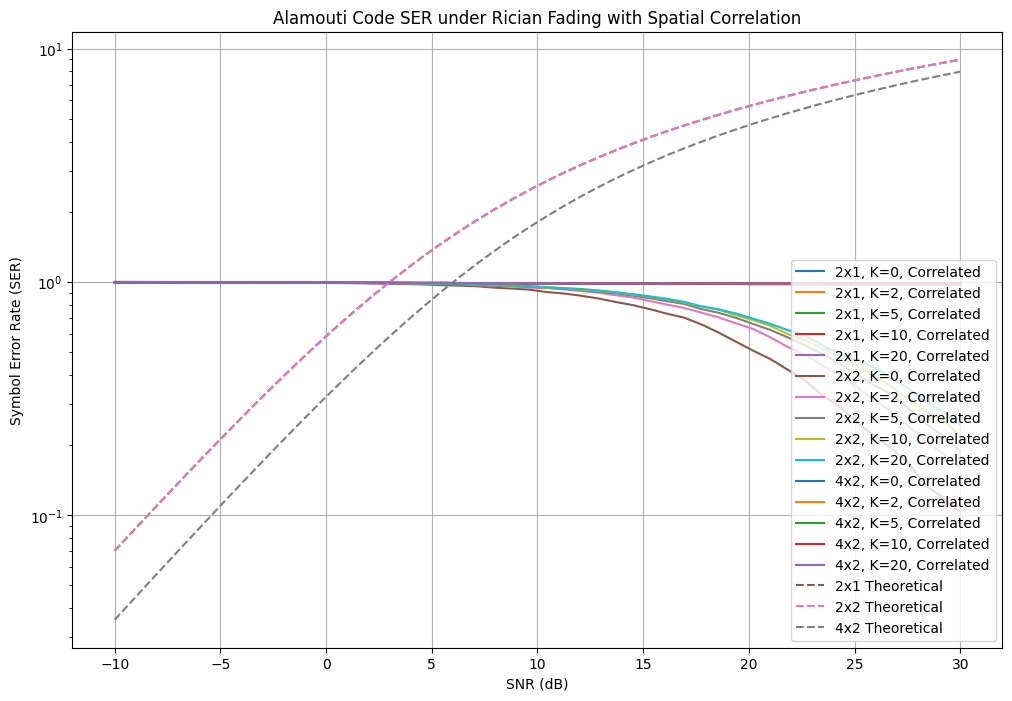

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Constants
def db_to_linear(db):
    return 10 ** (db / 10)

SNR_dB = np.linspace(-10, 30, 50)  # SNR in dB
SNR = db_to_linear(SNR_dB)  # Convert to linear scale
K_factors = [0, 2, 5, 10, 20]  # Ricean K-factors
num_realizations = 10000  # Channel realizations

# Antenna configurations
antenna_configs = [(2, 1), (2, 2), (4, 2)]  # (Tx, Rx)

# Spatial correlation matrices (identity for uncorrelated, custom for correlated)
def spatial_correlation_matrix(size, correlation):
    return correlation * np.ones((size, size)) + (1 - correlation) * np.eye(size)

# Rician fading channel generation
def rician_channel(tx, rx, K):
    H_los = np.random.randn(rx, tx)
    H_nlos = np.random.randn(rx, tx) + 1j * np.random.randn(rx, tx)
    return np.sqrt(K / (1 + K)) * H_los + np.sqrt(1 / (1 + K)) * H_nlos

# Alamouti decoding for SER computation
def alamouti_ser(tx, rx, SNR, K, correlation=0):
    errors = []
    R_t = spatial_correlation_matrix(tx, correlation)  # Correlation matrix

    for snr in SNR:
        ser = 0
        for _ in range(num_realizations):
            H = rician_channel(tx, rx, K) @ R_t
            S = np.random.randn(tx) + 1j * np.random.randn(tx)
            N = (np.random.randn(rx) + 1j * np.random.randn(rx)) / np.sqrt(2 * snr)
            Y = H @ S + N
            S_est = np.linalg.pinv(H) @ Y  # Alamouti decoding
            ser += np.mean(np.abs(S - S_est) > 0.1)  # Simple thresholding
        errors.append(ser / num_realizations)
    return np.array(errors)

# Visualization setup
plt.figure(figsize=(12, 8))

# Loop through configurations
for tx, rx in antenna_configs:
    for K in K_factors:
        ser = alamouti_ser(tx, rx, SNR, K, correlation=0.5)  # With spatial correlation
        plt.plot(SNR_dB, ser, label=f"{tx}x{rx}, K={K}, Correlated")

# Adding theoretical curve
for tx, rx in antenna_configs:
    theoretical_curve = [np.log2(1 + snr / tx) for snr in SNR]
    plt.plot(SNR_dB, theoretical_curve, '--', label=f"{tx}x{rx} Theoretical")

# Plot adjustments
plt.yscale("log")
plt.xlabel("SNR (dB)")
plt.ylabel("Symbol Error Rate (SER)")
plt.title("Alamouti Code SER under Rician Fading with Spatial Correlation")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm

# Helper functions
def generate_rician_channel(MT, MR, K, correlation_matrix=None):
    """Generates a Rician fading channel with given K-factor and spatial correlation."""
    H_los = np.ones((MR, MT))  # LOS component
    H_nlos = (np.random.randn(MR, MT) + 1j * np.random.randn(MR, MT)) / np.sqrt(2)  # NLOS component
    H = np.sqrt(K / (1 + K)) * H_los + np.sqrt(1 / (1 + K)) * H_nlos

    if correlation_matrix is not None:
        H = sqrtm(correlation_matrix) @ H

    return H

def simulate_alamouti(MT, MR, K, SNR_dB, num_trials, correlation_matrix=None):
    """Simulates the SER performance of the Alamouti code."""
    SNR = 10**(SNR_dB / 10)
    errors = 0
    noise_power = 1 / SNR

    for _ in range(num_trials):
        H = generate_rician_channel(MT, MR, K, correlation_matrix)
        s = np.array([1 + 0j, -1 + 0j])  # QPSK symbols

        # Transmit using Alamouti code
        x = np.array([[s[0], -np.conj(s[1])], [s[1], np.conj(s[0])]])

        # Channel and noise
        y = H @ x + (np.random.randn(MR, 2) + 1j * np.random.randn(MR, 2)) * np.sqrt(noise_power / 2)

        # Decode and detect
        H_eq = np.array([[H[0, 0], H[1, 0]], [np.conj(H[0, 1]), -np.conj(H[1, 1])]])
        y_eq = np.linalg.pinv(H_eq) @ y.flatten()
        detected_symbols = np.sign(np.real(y_eq)) + 1j * np.sign(np.imag(y_eq))

        # Count errors
        errors += np.sum(detected_symbols != s)

    SER = errors / (2 * num_trials)
    return SER

def plot_results(SNR_range, results, labels, title):
    """Plots SER results with enhancements."""
    plt.figure(figsize=(10, 6))
    for res, label in zip(results, labels):
        plt.semilogy(SNR_range, res, label=label, marker='o')

    plt.xlabel('SNR (dB)')
    plt.ylabel('Symbol Error Rate (SER)')
    plt.title(title)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()

# Parameters
MT, MR = 2, 2
SNR_range = np.arange(-10, 31, 5)  # SNR from -10 dB to 30 dB
K_factors = [0, 5, 10]  # Different Rician K-factors
num_trials = 10000  # Monte Carlo trials

# Simulation for varying spatial correlation
uncorrelated_R = np.eye(MR)
highly_correlated_R = np.array([[1, 0.9], [0.9, 1]])

# Simulate and collect results
results_uncorrelated = []
results_correlated = []
for SNR_dB in SNR_range:
    SER_uncorrelated = simulate_alamouti(MT, MR, K=5, SNR_dB=SNR_dB, num_trials=num_trials, correlation_matrix=uncorrelated_R)
    SER_correlated = simulate_alamouti(MT, MR, K=5, SNR_dB=SNR_dB, num_trials=num_trials, correlation_matrix=highly_correlated_R)
    results_uncorrelated.append(SER_uncorrelated)
    results_correlated.append(SER_correlated)

# Plot spatial correlation results
plot_results(SNR_range, [results_uncorrelated, results_correlated],
             ['Uncorrelated', 'Highly Correlated'],
             'Alamouti Code with Spatial Correlation')

# Simulation for varying Rician K-factors
results_kfactor = []
for K in K_factors:
    result = []
    for SNR_dB in SNR_range:
        SER = simulate_alamouti(MT, MR, K=K, SNR_dB=SNR_dB, num_trials=num_trials)
        result.append(SER)
    results_kfactor.append(result)

# Plot Rician fading results
plot_results(SNR_range, results_kfactor,
             [f'K={K}' for K in K_factors],
             'Alamouti Code with Rician Fading (Varying K-factor)')

# Additional extensions: multiple antenna configurations
antenna_configs = [(2, 2), (4, 4), (4, 2)]
results_antenna = []

for MT, MR in antenna_configs:
    result = []
    for SNR_dB in SNR_range:
        SER = simulate_alamouti(MT, MR, K=5, SNR_dB=SNR_dB, num_trials=num_trials)
        result.append(SER)
    results_antenna.append(result)

# Plot antenna configuration results
plot_results(SNR_range, results_antenna,
             [f'{MT}x{MR}' for MT, MR in antenna_configs],
             'Alamouti Code with Varying Antenna Configurations')


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 2)

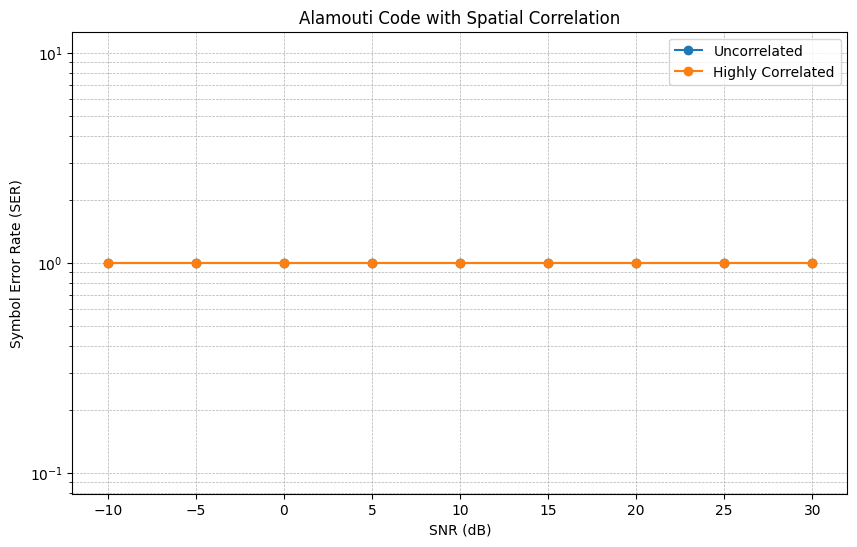

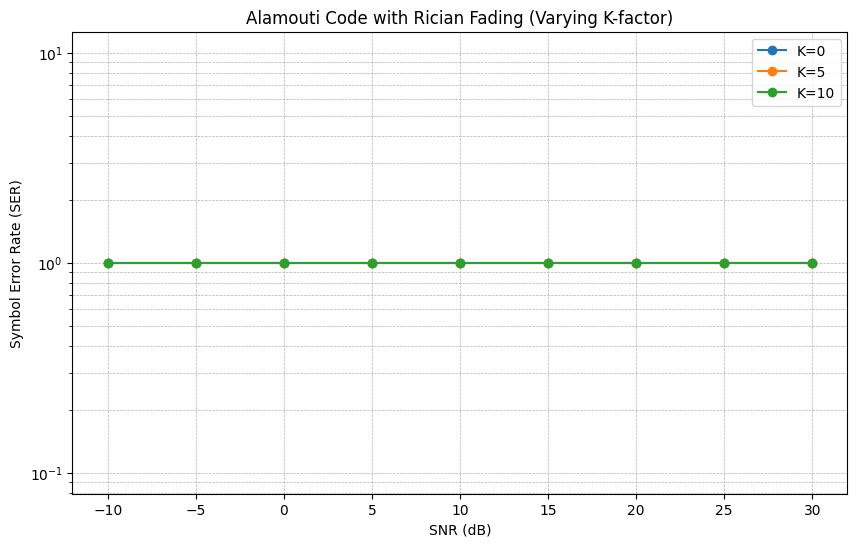

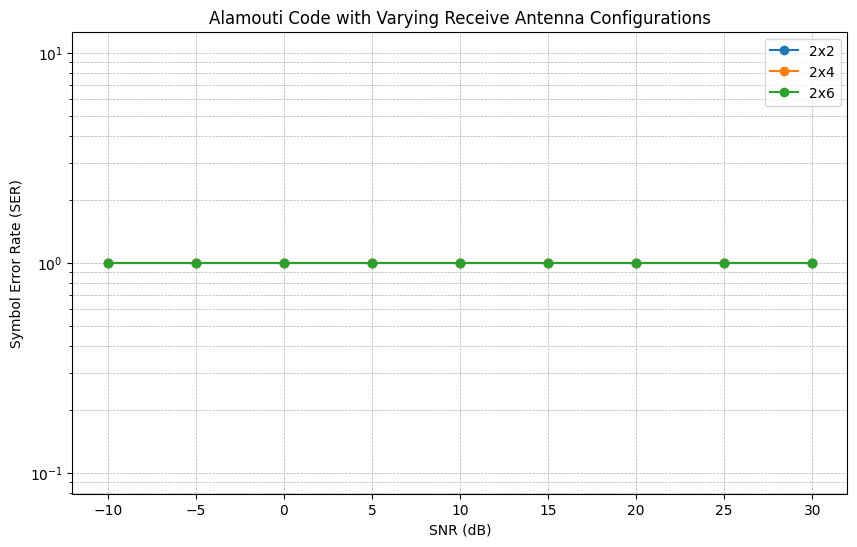

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm

# Helper functions
def generate_rician_channel(MT, MR, K, correlation_matrix=None):
    """Generates a Rician fading channel with given K-factor and spatial correlation."""
    H_los = np.ones((MR, MT))  # LOS component
    H_nlos = (np.random.randn(MR, MT) + 1j * np.random.randn(MR, MT)) / np.sqrt(2)  # NLOS component
    H = np.sqrt(K / (1 + K)) * H_los + np.sqrt(1 / (1 + K)) * H_nlos

    if correlation_matrix is not None:
        H = sqrtm(correlation_matrix) @ H

    return H

def simulate_alamouti(MT, MR, K, SNR_dB, num_trials, correlation_matrix=None):
    """Simulates the SER performance of the Alamouti code."""
    if MT != 2:
        raise ValueError("Alamouti coding requires MT=2 (2 transmit antennas).")

    SNR = 10**(SNR_dB / 10)
    errors = 0
    noise_power = 1 / SNR

    for _ in range(num_trials):
        H = generate_rician_channel(MT, MR, K, correlation_matrix)
        s = np.array([1 + 0j, -1 + 0j])  # QPSK symbols

        # Transmit using Alamouti code
        x = np.array([[s[0], -np.conj(s[1])], [s[1], np.conj(s[0])]])

        # Channel and noise
        y = H @ x + (np.random.randn(MR, 2) + 1j * np.random.randn(MR, 2)) * np.sqrt(noise_power / 2)

        # Decode and detect
        y_eq = np.zeros(2, dtype=complex)  # Equalized received signal
        h1 = H[:, 0]
        h2 = H[:, 1]

        # Alamouti decoding
        y_eq[0] = np.sum(np.conj(h1) * y[:, 0]) + np.sum(h2 * np.conj(y[:, 1]))
        y_eq[1] = np.sum(np.conj(h2) * y[:, 0]) - np.sum(h1 * np.conj(y[:, 1]))

        # Detect symbols
        detected_symbols = np.sign(np.real(y_eq)) + 1j * np.sign(np.imag(y_eq))

        # Count errors
        errors += np.sum(detected_symbols != s)

    SER = errors / (2 * num_trials)
    return SER

def plot_results(SNR_range, results, labels, title):
    """Plots SER results with enhancements."""
    plt.figure(figsize=(10, 6))
    for res, label in zip(results, labels):
        plt.semilogy(SNR_range, res, label=label, marker='o')

    plt.xlabel('SNR (dB)')
    plt.ylabel('Symbol Error Rate (SER)')
    plt.title(title)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()

# Parameters
MT, MR = 2, 2
SNR_range = np.arange(-10, 31, 5)  # SNR from -10 dB to 30 dB
K_factors = [0, 5, 10]  # Different Rician K-factors
num_trials = 10000  # Monte Carlo trials

# Simulation for varying spatial correlation
uncorrelated_R = np.eye(MR)
highly_correlated_R = np.array([[1, 0.9], [0.9, 1]])

# Simulate and collect results
results_uncorrelated = []
results_correlated = []
for SNR_dB in SNR_range:
    SER_uncorrelated = simulate_alamouti(MT, MR, K=5, SNR_dB=SNR_dB, num_trials=num_trials, correlation_matrix=uncorrelated_R)
    SER_correlated = simulate_alamouti(MT, MR, K=5, SNR_dB=SNR_dB, num_trials=num_trials, correlation_matrix=highly_correlated_R)
    results_uncorrelated.append(SER_uncorrelated)
    results_correlated.append(SER_correlated)

# Plot spatial correlation results
plot_results(SNR_range, [results_uncorrelated, results_correlated],
             ['Uncorrelated', 'Highly Correlated'],
             'Alamouti Code with Spatial Correlation')

# Simulation for varying Rician K-factors
results_kfactor = []
for K in K_factors:
    result = []
    for SNR_dB in SNR_range:
        SER = simulate_alamouti(MT, MR, K=K, SNR_dB=SNR_dB, num_trials=num_trials)
        result.append(SER)
    results_kfactor.append(result)

# Plot Rician fading results
plot_results(SNR_range, results_kfactor,
             [f'K={K}' for K in K_factors],
             'Alamouti Code with Rician Fading (Varying K-factor)')

# Additional extensions: multiple receive antenna configurations
antenna_configs = [(2, 2), (2, 4), (2, 6)]  # MT is fixed at 2 for Alamouti coding
results_antenna = []

for MT, MR in antenna_configs:
    result = []
    for SNR_dB in SNR_range:
        SER = simulate_alamouti(MT, MR, K=5, SNR_dB=SNR_dB, num_trials=num_trials)
        result.append(SER)
    results_antenna.append(result)

# Plot antenna configuration results
plot_results(SNR_range, results_antenna,
             [f'{MT}x{MR}' for MT, MR in antenna_configs],
             'Alamouti Code with Varying Receive Antenna Configurations')


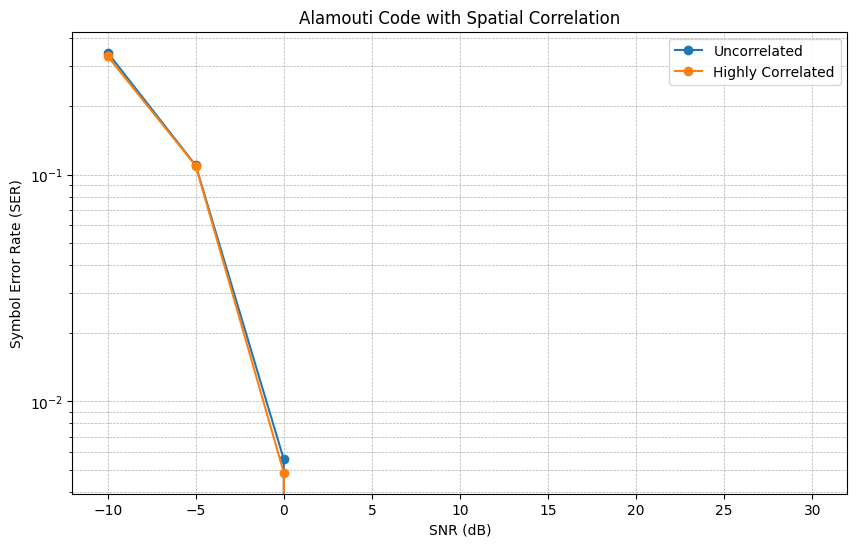

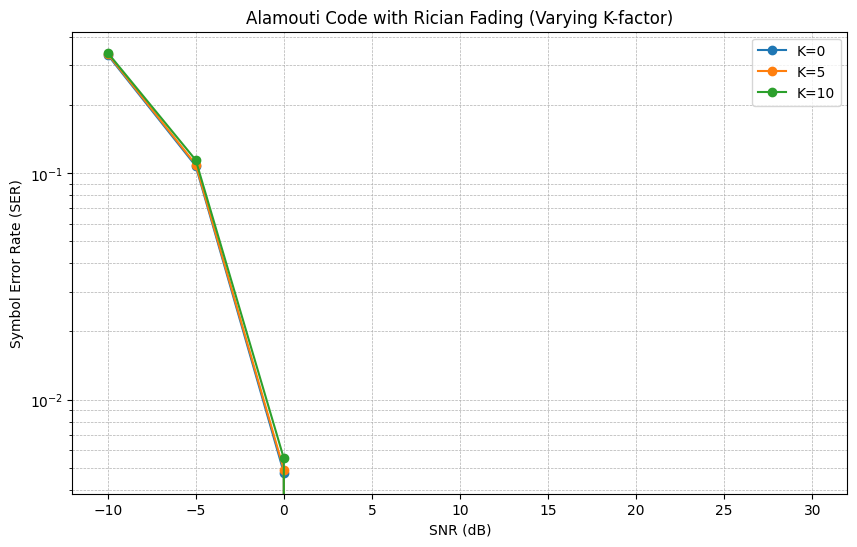

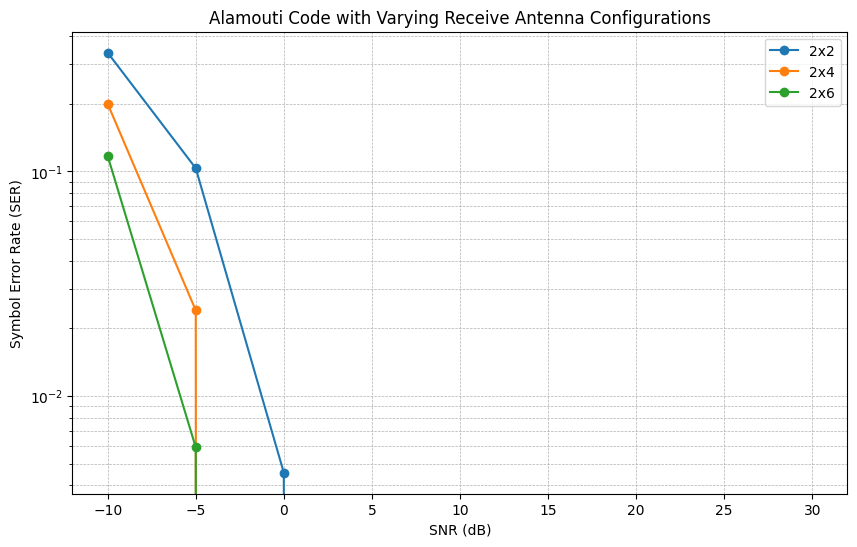

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm

# Helper functions
def generate_rician_channel(MT, MR, K, correlation_matrix=None):
    """Generates a Rician fading channel with proper normalization."""
    H_los = np.ones((MR, MT))  # LOS component
    H_nlos = (np.random.randn(MR, MT) + 1j * np.random.randn(MR, MT)) / np.sqrt(2)  # NLOS component
    H = np.sqrt(K / (1 + K)) * H_los + np.sqrt(1 / (1 + K)) * H_nlos

    if correlation_matrix is not None:
        H = sqrtm(correlation_matrix) @ H

    # Normalize channel to have unit average power
    H /= np.sqrt(np.mean(np.abs(H)**2))
    return H

def simulate_alamouti(MT, MR, K, SNR_dB, num_trials, correlation_matrix=None):
    """Simulates the SER performance of the Alamouti code with proper noise and detection."""
    if MT != 2:
        raise ValueError("Alamouti coding requires MT=2 (2 transmit antennas).")

    SNR = 10**(SNR_dB / 10)  # Linear SNR
    errors = 0
    noise_power = 1 / SNR  # Noise variance based on SNR

    for _ in range(num_trials):
        H = generate_rician_channel(MT, MR, K, correlation_matrix)
        s = np.array([1 + 1j, -1 - 1j])  # QPSK symbols

        # Transmit using Alamouti code
        x = np.array([[s[0], -np.conj(s[1])], [s[1], np.conj(s[0])]])

        # Generate channel and noise
        noise = (np.random.randn(MR, 2) + 1j * np.random.randn(MR, 2)) * np.sqrt(noise_power / 2)
        y = H @ x + noise

        # Decode received signal
        h1 = H[:, 0]
        h2 = H[:, 1]
        y_eq = np.zeros(2, dtype=complex)

        # Alamouti decoding
        y_eq[0] = np.sum(np.conj(h1) * y[:, 0]) + np.sum(h2 * np.conj(y[:, 1]))
        y_eq[1] = np.sum(np.conj(h2) * y[:, 0]) - np.sum(h1 * np.conj(y[:, 1]))

        # Symbol detection (nearest neighbor in QPSK constellation)
        qpsk_constellation = np.array([1+1j, 1-1j, -1+1j, -1-1j])
        detected_symbols = np.array([qpsk_constellation[np.argmin(np.abs(y_eq[i] - qpsk_constellation))] for i in range(2)])

        # Count errors
        errors += np.sum(detected_symbols != s)

    SER = errors / (2 * num_trials)  # Total symbol errors over all trials
    return SER



def plot_results(SNR_range, results, labels, title):
    """Plots SER results with enhancements."""
    plt.figure(figsize=(10, 6))
    for res, label in zip(results, labels):
        plt.semilogy(SNR_range, res, label=label, marker='o')

    plt.xlabel('SNR (dB)')
    plt.ylabel('Symbol Error Rate (SER)')
    plt.title(title)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()

# Parameters
MT, MR = 2, 2
SNR_range = np.arange(-10, 31, 5)  # SNR from -10 dB to 30 dB
K_factors = [0, 5, 10]  # Different Rician K-factors
num_trials = 10000  # Monte Carlo trials

# Simulation for varying spatial correlation
uncorrelated_R = np.eye(MR)
highly_correlated_R = np.array([[1, 0.9], [0.9, 1]])

# Simulate and collect results
results_uncorrelated = []
results_correlated = []
for SNR_dB in SNR_range:
    SER_uncorrelated = simulate_alamouti(MT, MR, K=5, SNR_dB=SNR_dB, num_trials=num_trials, correlation_matrix=uncorrelated_R)
    SER_correlated = simulate_alamouti(MT, MR, K=5, SNR_dB=SNR_dB, num_trials=num_trials, correlation_matrix=highly_correlated_R)
    results_uncorrelated.append(SER_uncorrelated)
    results_correlated.append(SER_correlated)

# Plot spatial correlation results
plot_results(SNR_range, [results_uncorrelated, results_correlated],
             ['Uncorrelated', 'Highly Correlated'],
             'Alamouti Code with Spatial Correlation')

# Simulation for varying Rician K-factors
results_kfactor = []
for K in K_factors:
    result = []
    for SNR_dB in SNR_range:
        SER = simulate_alamouti(MT, MR, K=K, SNR_dB=SNR_dB, num_trials=num_trials)
        result.append(SER)
    results_kfactor.append(result)

# Plot Rician fading results
plot_results(SNR_range, results_kfactor,
             [f'K={K}' for K in K_factors],
             'Alamouti Code with Rician Fading (Varying K-factor)')

# Additional extensions: multiple receive antenna configurations
antenna_configs = [(2, 2), (2, 4), (2, 6)]  # MT is fixed at 2 for Alamouti coding
results_antenna = []

for MT, MR in antenna_configs:
    result = []
    for SNR_dB in SNR_range:
        SER = simulate_alamouti(MT, MR, K=5, SNR_dB=SNR_dB, num_trials=num_trials)
        result.append(SER)
    results_antenna.append(result)

# Plot antenna configuration results
plot_results(SNR_range, results_antenna,
             [f'{MT}x{MR}' for MT, MR in antenna_configs],
             'Alamouti Code with Varying Receive Antenna Configurations')


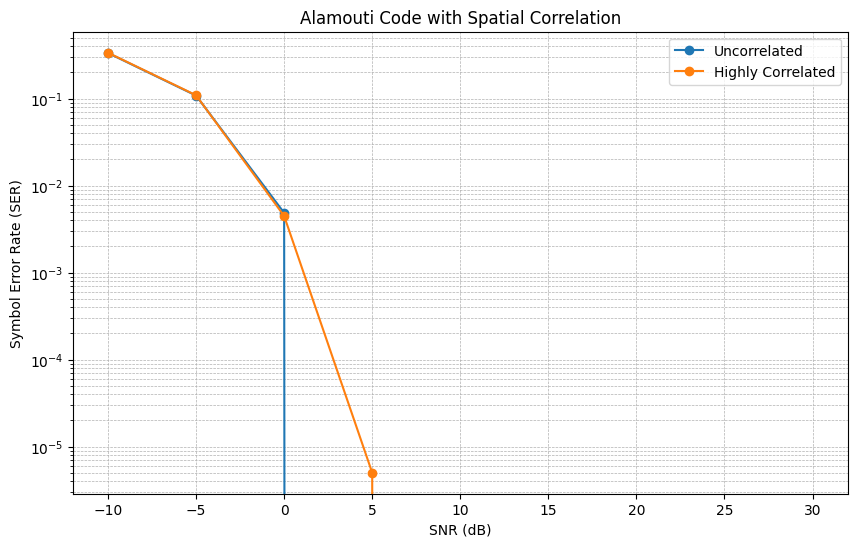

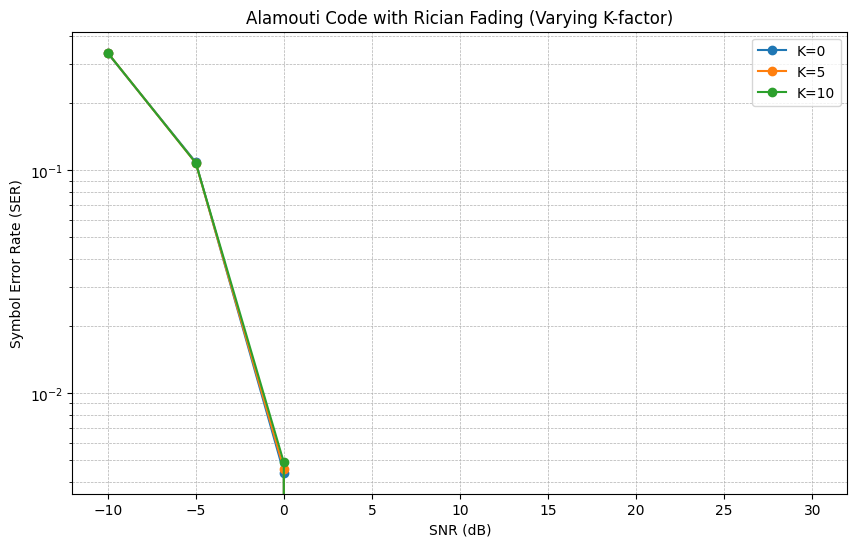

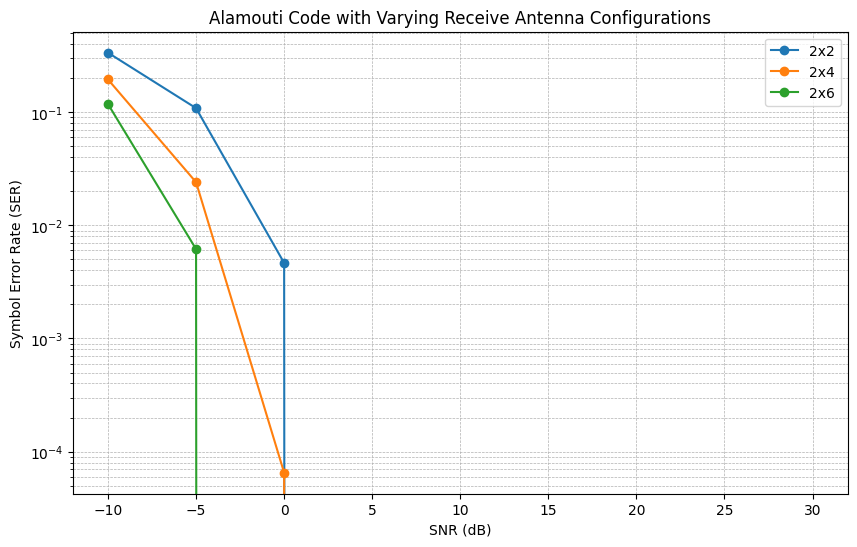

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm

# Helper functions
def generate_rician_channel(MT, MR, K, correlation_matrix=None):
    """Generates a Rician fading channel with proper normalization."""
    H_los = np.ones((MR, MT))  # LOS component
    H_nlos = (np.random.randn(MR, MT) + 1j * np.random.randn(MR, MT)) / np.sqrt(2)  # NLOS component
    H = np.sqrt(K / (1 + K)) * H_los + np.sqrt(1 / (1 + K)) * H_nlos

    if correlation_matrix is not None:
        H = sqrtm(correlation_matrix) @ H

    # Normalize channel to have unit average power
    H /= np.sqrt(np.mean(np.abs(H)**2))
    return H

def simulate_alamouti(MT, MR, K, SNR_dB, num_trials, correlation_matrix=None):
    """Simulates the SER performance of the Alamouti code with proper noise and detection."""
    if MT != 2:
        raise ValueError("Alamouti coding requires MT=2 (2 transmit antennas).")

    SNR = 10**(SNR_dB / 10)
    errors = 0
    noise_power = 1 / SNR  # Noise variance based on SNR

    for _ in range(num_trials):
        H = generate_rician_channel(MT, MR, K, correlation_matrix)
        s = np.array([1 + 1j, -1 - 1j])  # QPSK symbols

        # Transmit using Alamouti code
        x = np.array([[s[0], -np.conj(s[1])], [s[1], np.conj(s[0])]])

        # Channel and noise
        y = H @ x + (np.random.randn(MR, 2) + 1j * np.random.randn(MR, 2)) * np.sqrt(noise_power / 2)

        # Decode and detect
        y_eq = np.zeros(2, dtype=complex)  # Equalized received signal
        h1 = H[:, 0]
        h2 = H[:, 1]

        # Alamouti decoding
        y_eq[0] = np.sum(np.conj(h1) * y[:, 0]) + np.sum(h2 * np.conj(y[:, 1]))
        y_eq[1] = np.sum(np.conj(h2) * y[:, 0]) - np.sum(h1 * np.conj(y[:, 1]))

        # Symbol detection (nearest-neighbor QPSK)
        qpsk_constellation = np.array([1+1j, 1-1j, -1+1j, -1-1j])
        detected_symbols = np.array([qpsk_constellation[np.argmin(np.abs(y_eq[i] - qpsk_constellation))] for i in range(2)])

        # Count errors
        errors += np.sum(detected_symbols != s)

    SER = errors / (2 * num_trials)  # Total symbol errors over all trials
    return SER

def plot_results(SNR_range, results, labels, title):
    """Plots SER results with enhancements."""
    plt.figure(figsize=(10, 6))
    for res, label in zip(results, labels):
        plt.semilogy(SNR_range, res, label=label, marker='o')

    plt.xlabel('SNR (dB)')
    plt.ylabel('Symbol Error Rate (SER)')
    plt.title(title)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()

# Parameters
MT, MR = 2, 2
SNR_range = np.arange(-10, 31, 5)  # SNR from -10 dB to 30 dB
K_factors = [0, 5, 10]  # Different Rician K-factors
num_trials = 100000  # Monte Carlo trials

# Simulation for varying spatial correlation
uncorrelated_R = np.eye(MR)
highly_correlated_R = np.array([[1, 0.9], [0.9, 1]])

# Simulate and collect results
results_uncorrelated = []
results_correlated = []
for SNR_dB in SNR_range:
    SER_uncorrelated = simulate_alamouti(MT, MR, K=5, SNR_dB=SNR_dB, num_trials=num_trials, correlation_matrix=uncorrelated_R)
    SER_correlated = simulate_alamouti(MT, MR, K=5, SNR_dB=SNR_dB, num_trials=num_trials, correlation_matrix=highly_correlated_R)
    results_uncorrelated.append(SER_uncorrelated)
    results_correlated.append(SER_correlated)

# Plot spatial correlation results
plot_results(SNR_range, [results_uncorrelated, results_correlated],
             ['Uncorrelated', 'Highly Correlated'],
             'Alamouti Code with Spatial Correlation')

# Simulation for varying Rician K-factors
results_kfactor = []
for K in K_factors:
    result = []
    for SNR_dB in SNR_range:
        SER = simulate_alamouti(MT, MR, K=K, SNR_dB=SNR_dB, num_trials=num_trials)
        result.append(SER)
    results_kfactor.append(result)

# Plot Rician fading results
plot_results(SNR_range, results_kfactor,
             [f'K={K}' for K in K_factors],
             'Alamouti Code with Rician Fading (Varying K-factor)')

# Additional extensions: multiple receive antenna configurations
antenna_configs = [(2, 2), (2, 4), (2, 6)]  # MT is fixed at 2 for Alamouti coding
results_antenna = []

for MT, MR in antenna_configs:
    result = []
    for SNR_dB in SNR_range:
        SER = simulate_alamouti(MT, MR, K=5, SNR_dB=SNR_dB, num_trials=num_trials)
        result.append(SER)
    results_antenna.append(result)

# Plot antenna configuration results
plot_results(SNR_range, results_antenna,
             [f'{MT}x{MR}' for MT, MR in antenna_configs],
             'Alamouti Code with Varying Receive Antenna Configurations')


NameError: name 'num_symbols_reduced' is not defined